In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import requests
import numpy as np
import pandas as pd

import csv

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 24, 17.39
import numpy as np
import pandas as pd
fig = plt.figure()
from datetime import *

<Figure size 1728x1252.08 with 0 Axes>

In [2]:
def errors (country_code, req_type):
    results = requests.get('http://coronosis.live/api/corona/overlapping_curves/' + country_code + '/' + req_type)
    
    predictions = results.json()
#     date = [p['date'] for p in predictions]
#     m1=[]
#     d1=[]
#     y1=[]
#     for i in range(0,len(date)) :
# #         for x in date[i].split('/')
#         m1[i], d1[i], y1[i] = [int(x) for x in date[i].split('/') ] 
  
#     print(m1,d1,y1)
    dates = [pred['date'] for pred in predictions  if (pred['current'] > 0 and date(int(pred['date'].split('/')[2]),int(pred['date'].split('/')[0]),int(pred['date'].split('/')[1]))<= date(2020,8,13))]
    one_day = [pred['one_day'] for pred in predictions if (pred['current'] > 0 and date(int(pred['date'].split('/')[2]),int(pred['date'].split('/')[0]),int(pred['date'].split('/')[1]))<= date(2020,8,13))]
    two_day = [pred['two_day'] for pred in predictions if (pred['current'] > 0 and date(int(pred['date'].split('/')[2]),int(pred['date'].split('/')[0]),int(pred['date'].split('/')[1]))<= date(2020,8,13))]
    current = [pred['current'] for pred in predictions if (pred['current'] > 0 and date(int(pred['date'].split('/')[2]),int(pred['date'].split('/')[0]),int(pred['date'].split('/')[1]))<= date(2020,8,13))]
    
#     dates1 = [pred['date'] for pred in predictions]
#     one_day1 = [pred['one_day'] for pred in predictions]
#     two_day1 = [pred['two_day'] for pred in predictions]
#     current1 = [pred['current'] for pred in predictions]
    
    
    array1 = np.array(current)
    array2 = np.array(one_day)
    array3 = np.array(two_day)
    sub = np.array(np.zeros(len(array1)-1))
    for i in range(0,len(array1)-1,1):
        sub[i]=np.array(np.abs(np.subtract(array1[i+1],array1[i])))
        print(sub[i])
    print('The mean of differences is :')
    m = np.mean(sub)
    print(np.mean(sub))
    positions =[]
    
    def multi(mo):
        count = 0
        for i in range(0, len(array1)-1,1):
            if(np.abs(np.subtract(array1[i+1],array1[i]))>= mo ):
                positions.append(i+1)
                count = count +1
        print('counts:')
        print(count)
        print('length of values:')
        print(len(array1)-1)
        print('percentage:')
        print(((len(array1)-count-1)/(len(array1)-1))*100)
        return count, ((len(array1)-count-1)/(len(array1)-1))*100
        
#     multi(m)
#     multi(m*2)
    baad, nisi = multi(m*1.65)
#     multi(m*1.25)
#     multi(m*1.75)
    dates = np.delete(dates, positions)
    arraycurr = np.delete(array1, positions)
    arrayone = np.delete(array2, positions)
    arraytwo = np.delete(array3, positions)
    
    
    difference_arrayone = np.subtract(arraycurr, arrayone)
    
    
    absoluteone = np.abs(difference_arrayone)
 
    divideabsone = np.true_divide(absoluteone*100, arraycurr)
    
    difference_arraytwo = np.subtract(arraycurr, arraytwo)
    
    absolutetwo = np.abs(difference_arraytwo)
    divideabstwo = np.true_divide(absolutetwo*100, arraycurr)
    
    
    csv_err_filename = 'ErrorsAndexcludingOutliers' + req_type + '.csv'
    
    with open(csv_err_filename, 'a+', newline = '') as file2:
        writer = csv.writer(file2)
        writer.writerow([country_code, np.mean(divideabsone), np.mean(divideabstwo),m,len(array1)-1,baad,nisi]) 
        
    csv_file_name = 'avgprederror_' + req_type + '.csv'
    with open(csv_file_name, 'w', newline='') as file:
        writer = csv.writer(file)
        for i in range(len(dates)):
            writer.writerow([country_code, dates[i], divideabsone[i], divideabstwo[i]])
    df = pd.read_csv(csv_file_name)
    final_csv = 'final2_'+ country_code + req_type+'.csv'
    df2 = df.to_csv(final_csv, header=['Country', 'Date', 'One_day', 'Two_day'], index=False)
    return pd.read_csv(final_csv)

In [216]:
errors('BD','affected')


40.0
6.0
180.0
58.0
44.0
24.0
89.0
194.0
109.0
79.0
52.0
92.0
77.0
7.0
19.0
113.0
23.0
98.0
4.0
84.0
3.0
73.0
251.0
147.0
65.0
193.0
121.0
161.0
272.0
343.0
329.0
351.0
366.0
156.0
79.0
179.0
102.0
809.0
375.0
488.0
494.0
759.0
781.0
164.0
530.0
216.0
272.0
405.0
193.0
108.0
8.0
436.0
19.0
3.0
284.0
615.0
285.0
42.0
763.0
146.0
205.0
560.0
3.0
291.0
51.0
68.0
50.0
484.0
78.0
364.0
305.0
205.0
332.0
93.0
244.0
905.0
174.0
550.0
463.0
174.0
462.0
129.0
411.0
263.0
20.0
433.0
64.0
370.0
800.0
301.0
325.0
250.0
469.0
129.0
313.0
112.0
308.0
28.0
245.0
497.0
188.0
49.0
314.0
77.0
573.0
1313.0
470.0
562.0
736.0
323.0
126.0
240.0
124.0
420.0
89.0
1.0
378.0
The mean of differences is :
258.88034188034186
counts:
24
length of values:
117
percentage:
79.48717948717949


Country       Date    One_day    Two_day
0       BD  4/18/2020   2.287582  23.856209
1       BD  4/19/2020   0.320513   1.282051
2       BD  4/20/2020  38.414634  41.056911
3       BD  4/21/2020   6.682028  29.032258
4       BD  4/22/2020   8.205128   6.923077
..     ...        ...        ...        ...
88      BD   8/9/2020   9.167672   8.564536
89      BD  8/10/2020  21.087031  21.775026
90      BD  8/11/2020  14.586115  22.997330
91      BD  8/12/2020   6.811352  13.923205
92      BD  8/13/2020  13.068399   7.527703

[93 rows x 4 columns]

In [217]:
errors('BR','affected')

980.0
93.0
247.0
767.0
1176.0
272.0
1274.0
935.0
1443.0
661.0
1052.0
2487.0
117.0
172.0
2068.0
41.0
4321.0
1994.0
1959.0
1954.0
2529.0
257.0
5028.0
1105.0
4098.0
3906.0
5651.0
6719.0
2229.0
3177.0
1186.0
2295.0
4295.0
4821.0
4637.0
4275.0
5818.0
511.0
6346.0
16865.0
4811.0
17338.0
303.0
2292.0
3850.0
8163.0
3258.0
16437.0
822.0
2501.0
4430.0
4278.0
4594.0
3537.0
14271.0
2730.0
9423.0
32006.0
39009.0
7367.0
16307.0
3289.0
3242.0
7377.0
8167.0
8217.0
6424.0
9794.0
12866.0
1393.0
5882.0
4300.0
11872.0
5822.0
25076.0
734.0
1952.0
2429.0
6025.0
14192.0
4545.0
21571.0
1933.0
5479.0
11226.0
5645.0
5003.0
3272.0
20751.0
26852.0
7899.0
8814.0
26569.0
1294.0
17532.0
28258.0
11237.0
5454.0
6991.0
19592.0
9159.0
34962.0
5549.0
4013.0
2909.0
260.0
26960.0
962.0
33107.0
4936.0
The mean of differences is :
7357.045454545455
counts:
20
length of values:
110
percentage:
81.81818181818183


Country       Date    One_day     Two_day
0       BR  4/19/2020  41.583166   51.803607
1       BR  4/20/2020  13.834371   40.354236
2       BR  4/21/2020   1.412671    7.619863
3       BR  4/22/2020  29.842088   29.262005
4       BR  4/23/2020  38.560411   47.955130
..     ...        ...        ...         ...
85      BR   8/6/2020   8.169141   15.593067
86      BR   8/7/2020   6.422457    3.685049
87      BR   8/8/2020   7.862718    6.738043
88      BR  8/10/2020  87.626996  103.555878
89      BR  8/13/2020  26.617963   44.720507

[90 rows x 4 columns]

In [225]:
errors('IN','dead')

3.0
15.0
0.0
17.0
4.0
19.0
14.0
44.0
57.0
11.0
2.0
4.0
6.0
31.0
32.0
107.0
48.0
35.0
12.0
8.0
20.0
5.0
29.0
39.0
15.0
38.0
6.0
14.0
36.0
23.0
15.0
14.0
18.0
8.0
0.0
6.0
24.0
18.0
13.0
92.0
64.0
18.0
23.0
21.0
38.0
16.0
11.0
11.0
36.0
5.0
11.0
476.0
367.0
75.0
69.0
1623.0
1669.0
2.0
39.0
69.0
139.0
133.0
153.0
47.0
11.0
23.0
26.0
30.0
38.0
89.0
73.0
55.0
63.0
171.0
188.0
41.0
17.0
4.0
12.0
44.0
18.0
52.0
29.0
23.0
83.0
17.0
128.0
138.0
96.0
65.0
479.0
389.0
17.0
55.0
9.0
74.0
620.0
745.0
1.0
30.0
60.0
82.0
32.0
54.0
47.0
18.0
47.0
72.0
146.0
136.0
37.0
108.0
65.0
The mean of differences is :
96.23008849557522
counts:
10
length of values:
113
percentage:
91.1504424778761


Country       Date    One_day    Two_day
0        IN  4/19/2020   2.631579   2.631579
1        IN  4/20/2020  30.188679  30.188679
2        IN  4/21/2020  67.924528  32.075472
3        IN  4/22/2020  22.222222  19.444444
4        IN  4/23/2020   7.500000  10.000000
..      ...        ...        ...        ...
98       IN   8/9/2020   8.937438   8.341609
99       IN  8/10/2020   7.118255   6.773823
100      IN  8/11/2020  12.949640  13.549161
101      IN  8/12/2020   0.106157   1.273885
102      IN  8/13/2020   5.163853   5.461768

[103 rows x 4 columns]

In [219]:
errors('MX','affected')

128.0
44.0
653.0
764.0
1261.0
360.0
893.0
269.0
118.0
371.0
176.0
378.0
90.0
166.0
34.0
51.0
314.0
489.0
373.0
76.0
32.0
376.0
257.0
692.0
135.0
547.0
28.0
325.0
37.0
339.0
299.0
465.0
725.0
13.0
369.0
844.0
970.0
8.0
86.0
150.0
342.0
267.0
381.0
1120.0
21.0
530.0
96.0
753.0
109.0
485.0
1200.0
684.0
93.0
432.0
1728.0
653.0
720.0
1172.0
331.0
732.0
632.0
313.0
626.0
766.0
1711.0
851.0
667.0
663.0
1031.0
360.0
245.0
1627.0
249.0
1060.0
1.0
174.0
2231.0
219.0
1356.0
737.0
285.0
389.0
797.0
1612.0
203.0
2366.0
902.0
257.0
851.0
358.0
2304.0
139.0
1687.0
840.0
2419.0
865.0
822.0
1271.0
507.0
2235.0
1456.0
1978.0
728.0
1098.0
4703.0
86.0
1381.0
9.0
451.0
127.0
222.0
2119.0
1182.0
1128.0
828.0
1513.0
The mean of differences is :
699.9224137931035
counts:
22
length of values:
116
percentage:
81.03448275862068


Country       Date    One_day    Two_day
0       MX  4/18/2020  22.145329  19.204152
1       MX  4/19/2020  16.881029  27.652733
2       MX  4/20/2020  55.215686  58.823529
3       MX  4/21/2020  85.714286  17.025440
4       MX  4/23/2020  42.542214  68.245779
..     ...        ...        ...        ...
89      MX   8/6/2020   6.115326   8.528073
90      MX   8/7/2020   0.535954   9.334524
91      MX   8/8/2020   3.895304   2.170901
92      MX  8/11/2020  23.556686  20.714927
93      MX  8/12/2020   2.902014  15.056333

[94 rows x 4 columns]

In [220]:
errors('IR','affected')

125.0
31.0
49.0
3.0
103.0
164.0
138.0
34.0
19.0
177.0
136.0
39.0
90.0
23.0
204.0
174.0
247.0
100.0
357.0
195.0
71.0
27.0
146.0
300.0
202.0
477.0
150.0
294.0
345.0
49.0
488.0
183.0
235.0
46.0
81.0
442.0
154.0
236.0
293.0
178.0
561.0
537.0
234.0
463.0
138.0
17.0
440.0
688.0
617.0
95.0
321.0
52.0
84.0
207.0
151.0
61.0
42.0
23.0
114.0
49.0
16.0
19.0
293.0
46.0
205.0
128.0
86.0
64.0
33.0
172.0
33.0
47.0
79.0
92.0
103.0
86.0
117.0
111.0
53.0
24.0
54.0
612.0
183.0
135.0
211.0
163.0
172.0
133.0
112.0
121.0
213.0
16.0
232.0
211.0
39.0
35.0
132.0
173.0
17.0
101.0
233.0
31.0
15.0
53.0
126.0
137.0
87.0
153.0
54.0
63.0
184.0
325.0
105.0
112.0
213.0
165.0
115.0
The mean of differences is :
160.18803418803418
counts:
18
length of values:
117
percentage:
84.61538461538461


Country       Date    One_day    Two_day
0       IR  4/18/2020  13.318777  15.356623
1       IR  4/19/2020   6.999255  16.604617
2       IR  4/20/2020   6.491499  11.823802
3       IR  4/21/2020   1.464919   5.705474
4       IR  4/22/2020   9.798995  10.636516
..     ...        ...        ...        ...
94      IR   8/9/2020  26.287129  32.821782
95      IR  8/10/2020  14.446529  19.699812
96      IR  8/11/2020   0.255864   3.837953
97      IR  8/12/2020   7.051793   7.250996
98      IR  8/13/2020   9.371429  11.580952

[99 rows x 4 columns]

In [222]:
errors('RU','affected')

1275.0
418.0
0.0
406.0
462.0
1075.0
117.0
395.0
349.0
299.0
570.0
1258.0
834.0
1690.0
1010.0
52.0
479.0
457.0
672.0
532.0
118.0
195.0
644.0
757.0
871.0
54.0
624.0
1398.0
509.0
783.0
337.0
499.0
85.0
45.0
540.0
488.0
31.0
577.0
33.0
201.0
380.0
316.0
783.0
373.0
329.0
294.0
105.0
128.0
125.0
1.0
383.0
194.0
384.0
184.0
264.0
112.0
592.0
24.0
417.0
52.0
199.0
101.0
153.0
131.0
173.0
248.0
377.0
55.0
59.0
101.0
0.0
133.0
202.0
42.0
87.0
96.0
150.0
206.0
171.0
43.0
132.0
37.0
1.0
76.0
271.0
170.0
5.0
26.0
175.0
118.0
195.0
73.0
22.0
20.0
51.0
54.0
92.0
134.0
227.0
69.0
35.0
16.0
39.0
42.0
23.0
243.0
65.0
53.0
48.0
6.0
30.0
74.0
189.0
162.0
37.0
The mean of differences is :
281.0086956521739
counts:
23
length of values:
115
percentage:
80.0


Country       Date    One_day    Two_day
0       RU  4/20/2020  14.374335  21.269054
1       RU  4/21/2020  66.678483   3.757533
2       RU  4/22/2020   6.035141  40.145149
3       RU  4/23/2020   7.163804   8.273984
4       RU  4/25/2020   8.397586  15.437479
..     ...        ...        ...        ...
87      RU   8/9/2020   1.959263   2.327837
88      RU  8/10/2020   0.629797   1.456406
89      RU  8/11/2020   5.171709   3.822567
90      RU  8/12/2020   0.098932   1.147606
91      RU  8/13/2020   0.039864   0.079729

[92 rows x 4 columns]

In [223]:
errors('ZA','affected')

127.0
18.0
23.0
5.0
148.0
51.0
126.0
106.0
44.0
151.0
57.0
7.0
81.0
62.0
10.0
85.0
116.0
188.0
239.0
138.0
70.0
42.0
61.0
26.0
59.0
120.0
46.0
329.0
242.0
151.0
36.0
331.0
146.0
230.0
186.0
383.0
1024.0
207.0
371.0
110.0
11.0
42.0
219.0
258.0
1554.0
625.0
103.0
227.0
282.0
482.0
318.0
717.0
212.0
450.0
493.0
807.0
694.0
1277.0
600.0
347.0
1141.0
345.0
333.0
230.0
1170.0
891.0
364.0
995.0
876.0
204.0
815.0
1179.0
604.0
335.0
1790.0
2080.0
198.0
1163.0
1324.0
4864.0
1326.0
1149.0
1439.0
504.0
1058.0
2261.0
415.0
201.0
88.0
164.0
4149.0
1130.0
4980.0
46.0
840.0
1740.0
971.0
4137.0
136.0
4130.0
316.0
32.0
907.0
1912.0
2818.0
921.0
4103.0
252.0
1015.0
420.0
1041.0
2932.0
1228.0
299.0
1136.0
The mean of differences is :
754.4956521739131
counts:
18
length of values:
115
percentage:
84.34782608695653


Country       Date     One_day     Two_day
0       ZA  4/19/2020   45.161290   62.903226
1       ZA  4/20/2020   44.366197   50.704225
2       ZA  4/21/2020    6.060606   25.454545
3       ZA  4/22/2020   14.705882   11.176471
4       ZA  4/23/2020   50.943396   51.572327
..     ...        ...         ...         ...
92      ZA   8/8/2020    5.212656    4.434647
93      ZA   8/9/2020    4.572028    6.340878
94      ZA  8/11/2020  144.165671  160.573477
95      ZA  8/12/2020   98.505338  112.633452
96      ZA  8/13/2020   34.541308   37.607704

[97 rows x 4 columns]

In [224]:
errors('US','affected')

5602.0
12571.0
0.0
14252.0
15321.0
15339.0
550.0
32576.0
9200.0
34026.0
4383.0
3350.0
6727.0
32950.0
3577.0
3166.0
1641.0
276.0
4168.0
1514.0
1285.0
5911.0
1089.0
2874.0
465.0
6338.0
2318.0
54.0
6059.0
2614.0
1291.0
3025.0
2009.0
1504.0
2115.0
2619.0
445.0
348.0
4314.0
1689.0
120.0
4139.0
1181.0
387.0
1102.0
1441.0
3580.0
2039.0
379.0
5052.0
5448.0
15432.0
4351.0
2513.0
144.0
6008.0
436.0
3737.0
1854.0
2203.0
2147.0
2631.0
6369.0
4841.0
3708.0
381.0
5633.0
5283.0
2658.0
3752.0
2741.0
3180.0
5889.0
1636.0
187.0
6821.0
3916.0
4246.0
15068.0
1420.0
4646.0
3380.0
5275.0
2335.0
903.0
9303.0
1144.0
10982.0
5697.0
7860.0
1851.0
5097.0
7784.0
7161.0
3032.0
5052.0
8225.0
10537.0
1383.0
5324.0
9116.0
3157.0
596.0
8617.0
10895.0
2143.0
12172.0
4730.0
6882.0
1519.0
1999.0
9239.0
2601.0
2728.0
The mean of differences is :
5061.166666666667
counts:
18
length of values:
114
percentage:
84.21052631578947


Country       Date    One_day    Two_day
0       US  4/19/2020  19.026368  19.178846
1       US  4/21/2020  66.667511  21.459706
2       US  4/25/2020  22.820782  36.436603
3       US  4/29/2020  29.300687  42.349522
4       US  4/30/2020  30.983165  32.413519
..     ...        ...        ...        ...
91      US   8/6/2020   1.991892   5.478121
92      US   8/7/2020   2.250185   4.098121
93      US   8/8/2020   3.480258   5.354790
94      US  8/10/2020  11.668282  13.953488
95      US  8/11/2020  19.043753  17.582465

[96 rows x 4 columns]

In [201]:
def plotGraph(df, country_name, req_type,avg):
#     df2 = df.set_index(pd.to_datetime(df.Date), drop=True)
    X = df.iloc[0:,1:2]
    Y = df.iloc[:,2:3]
    print(np.mean(X))
    X = [x[0] for x in X.values.tolist()]
    Y =[y[0] for y in Y.values.tolist()]
    y_mean = [np.mean(Y)]*len(X)
    print(y_mean)
    fig,ax = plt.subplots()

# Plot the data
    data_line = ax.scatter(X,Y,s=150,label='Daily', marker='o',color ='#267631')

# Plot the average line
    mean_line = ax.plot(X,y_mean, label='Avg.', linestyle='--', color ='#B63018',linewidth=3)

#     plt.axhline(y=avg, color='r', linestyle='-')
#     plt.scatter(x=X, y=Y, label="Daily", color ='blue' )
    x2 = []
    for i in range(0,len(X),15):
        x2.append(X[i])
    plt.xticks(np.arange(0, len(X), step=15),x2,fontname='Times new roman',fontsize='46', rotation = 45)
    plt.yticks(fontname='Times new roman',fontsize='46')
    print(df.One_day)
   
    ax.legend(loc='best', prop={"size":52}, fancybox= True, framealpha=1)
    #plt.title('Current and Predicted One Day, Two Days Cases of ' + country_name)
    picFileName = country_name + req_type +'alleroors'+ '.pdf'
    ax.grid(b = True, which ='major', dashes=[8,15.5],color='black',linewidth=.75)
#     fig.savefig(picFileName,dpi=100, bbox_inches='tight')
#     plt.show()
    
#     fig1 = plt.gcf()
    plt.xlabel('Date', fontsize= 77)
# Set the y axis label of the current axis.
    plt.ylabel('Percentage error ', fontsize= 77)
    plt.rcParams["font.family"] = "times new roman"
    COLOR='black'
    plt.rcParams['text.color'] = COLOR
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams["axes.linewidth"]  = 1.75
    plt.rcParams["legend.edgecolor"] = 'black'
    plt.rcParams["axes.edgecolor"] = 'black'
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    plt.ylim(0,max(df.One_day)+(max(df.One_day))/50)
    
#     plt.rcParams['xtick.labelsize']= 50
#     plt.rcParams['ytick.labelsize']= 50
    plt.show()
    plt.draw()
    fig.savefig(picFileName, dpi=600, bbox_inches='tight')

40.0
6.0
180.0
58.0
44.0
24.0
89.0
194.0
109.0
79.0
52.0
92.0
77.0
7.0
19.0
113.0
23.0
98.0
4.0
84.0
3.0
73.0
251.0
147.0
65.0
193.0
121.0
161.0
272.0
343.0
329.0
351.0
366.0
156.0
79.0
179.0
102.0
809.0
375.0
488.0
494.0
759.0
781.0
164.0
530.0
216.0
272.0
405.0
193.0
108.0
8.0
436.0
19.0
3.0
284.0
615.0
285.0
42.0
763.0
146.0
205.0
560.0
3.0
291.0
51.0
68.0
50.0
484.0
78.0
364.0
305.0
205.0
332.0
93.0
244.0
905.0
174.0
550.0
463.0
174.0
462.0
129.0
411.0
263.0
20.0
433.0
64.0
370.0
800.0
301.0
325.0
250.0
469.0
129.0
313.0
112.0
308.0
28.0
245.0
497.0
188.0
49.0
314.0
77.0
573.0
1313.0
470.0
562.0
736.0
323.0
126.0
240.0
124.0
420.0
89.0
1.0
378.0
The mean of differences is :
258.88034188034186
counts:
24
length of values:
117
percentage:
79.48717948717949
Series([], dtype: float64)
[12.061275666502238, 12.061275666502238, 12.061275666502238, 12.061275666502238, 12.061275666502238, 12.061275666502238, 12.061275666502238, 12.061275666502238, 12.061275666502238, 12.061275666502238, 12.

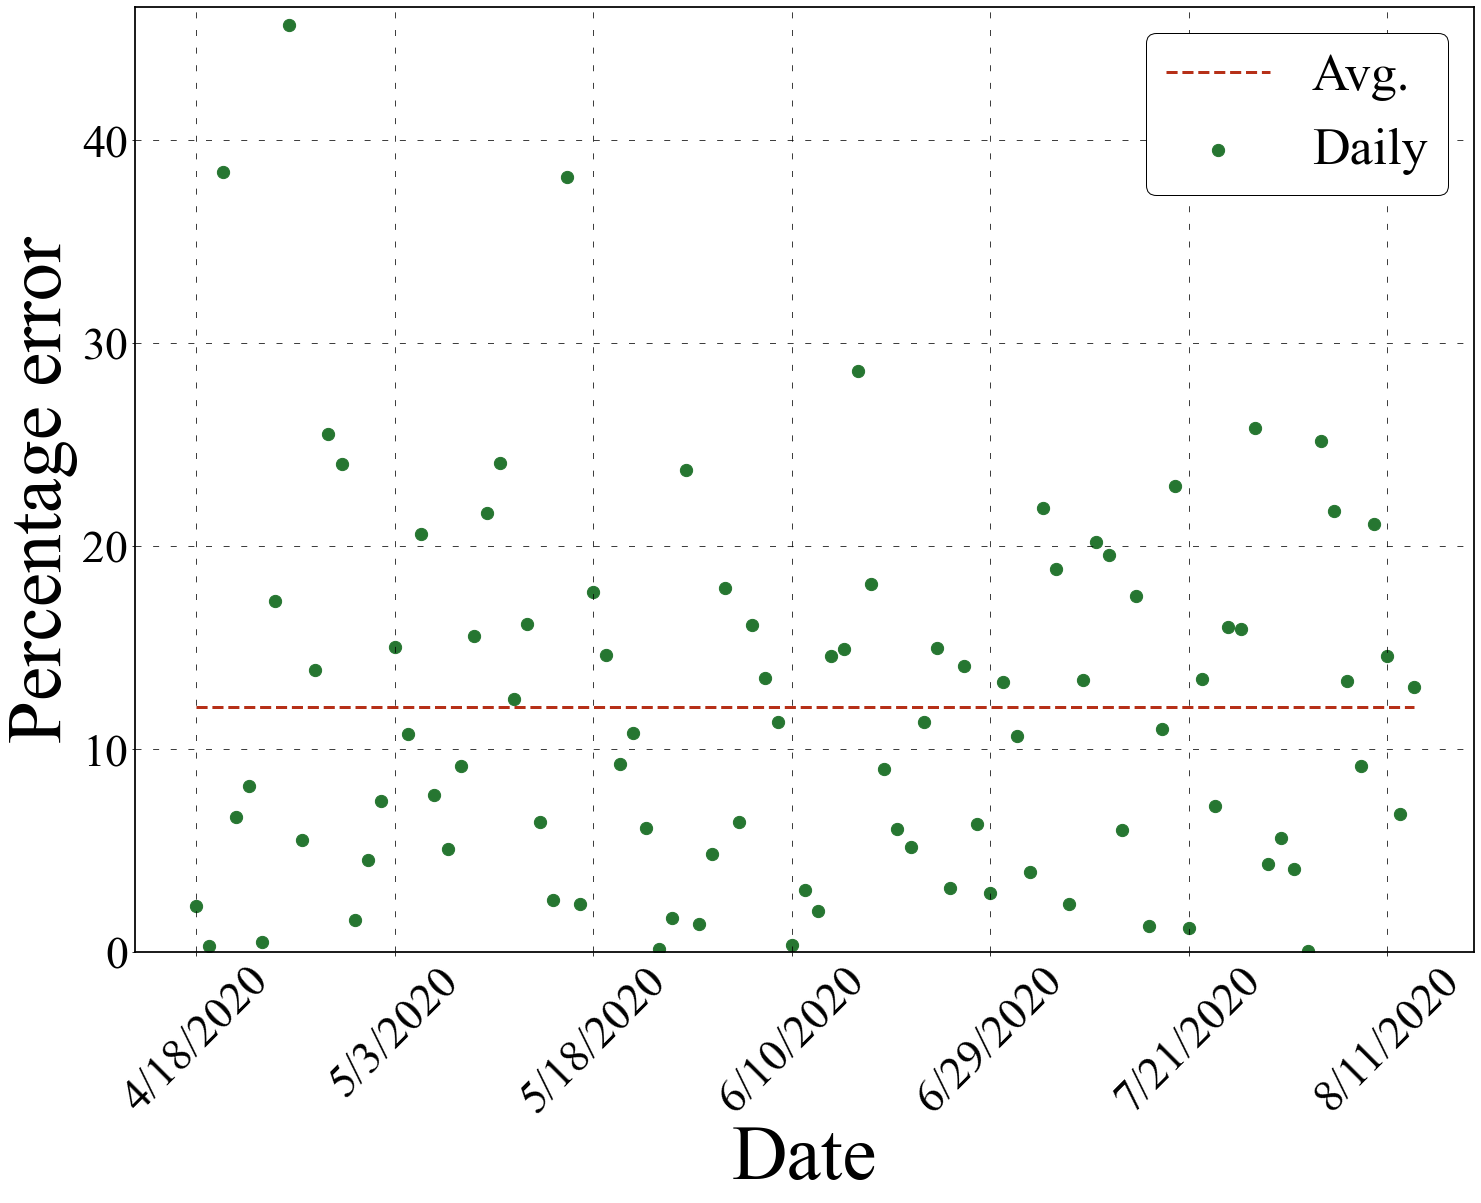

<Figure size 1728x1252.08 with 0 Axes>

In [176]:
plotGraph(errors('BD','affected'), 'BD', 'Affected','13.054')

980.0
93.0
247.0
767.0
1176.0
272.0
1274.0
935.0
1443.0
661.0
1052.0
2487.0
117.0
172.0
2068.0
41.0
4321.0
1994.0
1959.0
1954.0
2529.0
257.0
5028.0
1105.0
4098.0
3906.0
5651.0
6719.0
2229.0
3177.0
1186.0
2295.0
4295.0
4821.0
4637.0
4275.0
5818.0
511.0
6346.0
16865.0
4811.0
17338.0
303.0
2292.0
3850.0
8163.0
3258.0
16437.0
822.0
2501.0
4430.0
4278.0
4594.0
3537.0
14271.0
2730.0
9423.0
32006.0
39009.0
7367.0
16307.0
3289.0
3242.0
7377.0
8167.0
8217.0
6424.0
9794.0
12866.0
1393.0
5882.0
4300.0
11872.0
5822.0
25076.0
734.0
1952.0
2429.0
6025.0
14192.0
4545.0
21571.0
1933.0
5479.0
11226.0
5645.0
5003.0
3272.0
20751.0
26852.0
7899.0
8814.0
26569.0
1294.0
17532.0
28258.0
11237.0
5454.0
6991.0
19592.0
9159.0
34962.0
5549.0
4013.0
2909.0
260.0
26960.0
962.0
33107.0
4936.0
The mean of differences is :
7357.045454545455
counts:
20
length of values:
110
percentage:
81.81818181818183
Series([], dtype: float64)
[35.798748096729526, 35.798748096729526, 35.798748096729526, 35.798748096729526, 35.79874

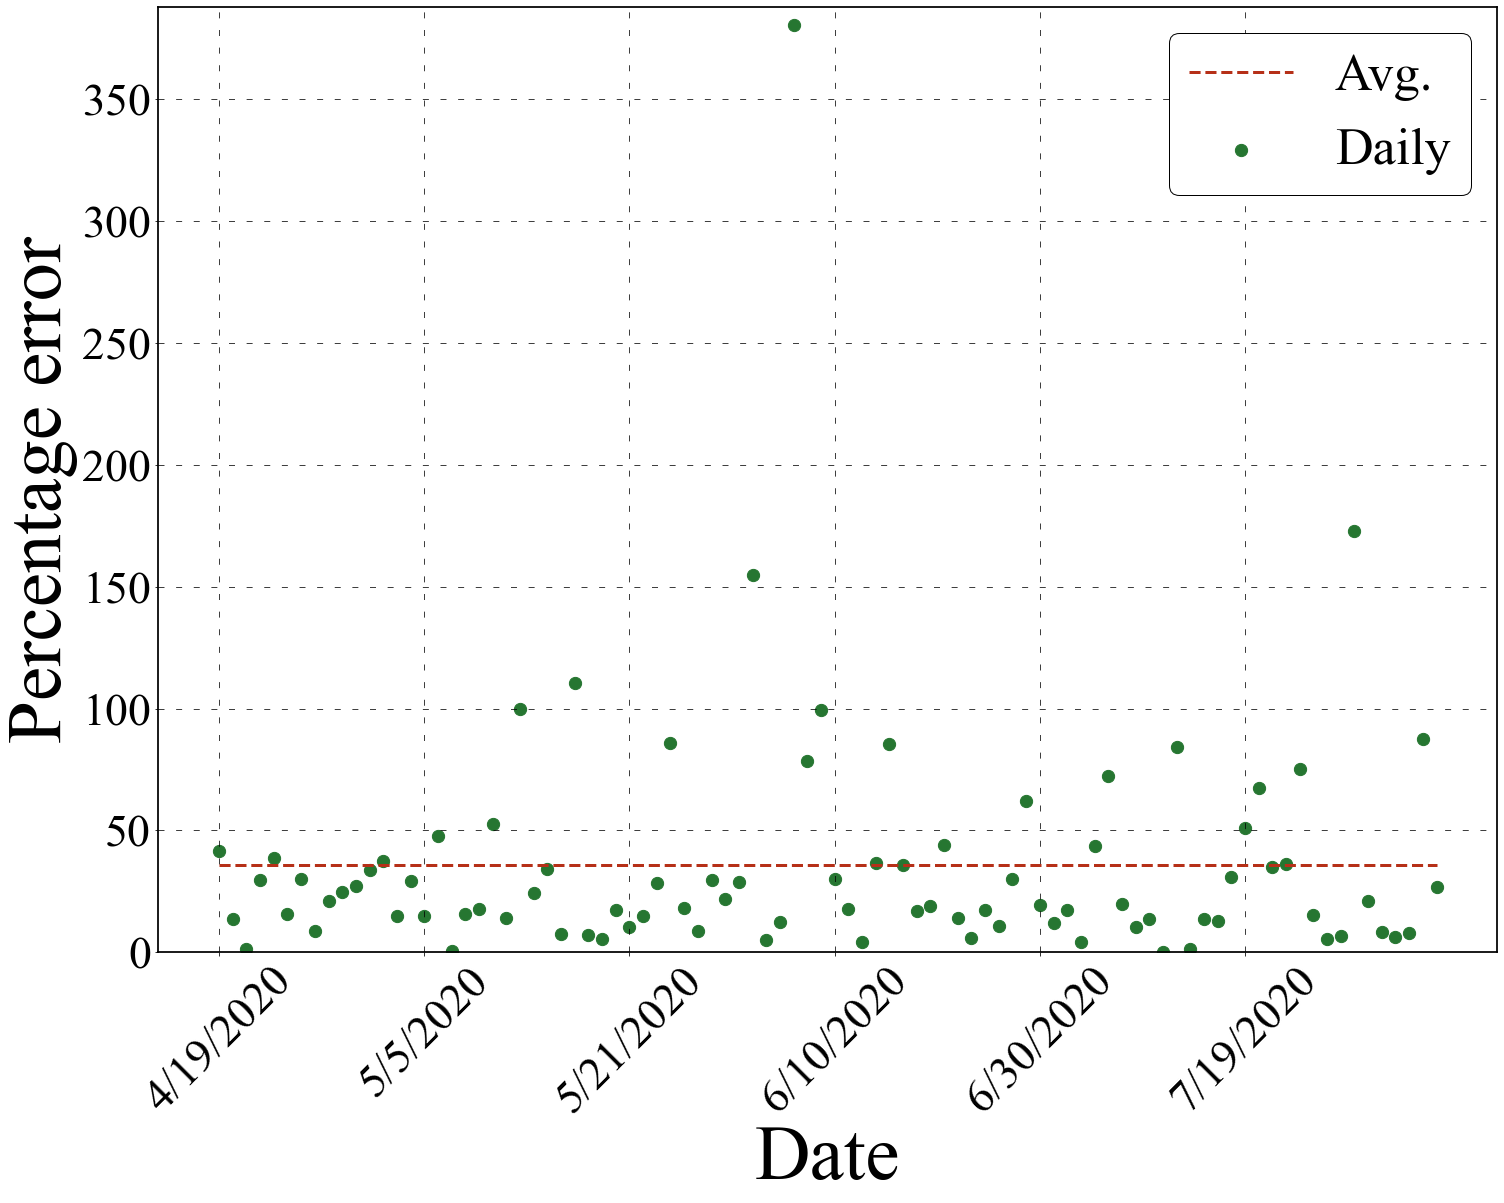

<Figure size 1728x1252.08 with 0 Axes>

In [177]:
plotGraph(errors('BR','affected'), 'BR', 'Affected','13.054')

523.0
352.0
0.0
251.0
379.0
299.0
383.0
1119.0
927.0
312.0
135.0
63.0
672.0
31.0
364.0
1126.0
969.0
624.0
223.0
20.0
231.0
1240.0
746.0
83.0
239.0
179.0
155.0
1077.0
186.0
420.0
1517.0
594.0
645.0
370.0
61.0
215.0
571.0
1450.0
7.0
805.0
231.0
446.0
1021.0
1060.0
812.0
256.0
418.0
967.0
426.0
2422.0
1776.0
9781.0
20515.0
9494.0
471.0
1262.0
307.0
1907.0
705.0
930.0
887.0
572.0
102.0
1035.0
954.0
374.0
1256.0
1354.0
447.0
937.0
119.0
519.0
1743.0
1868.0
2079.0
602.0
1997.0
502.0
2126.0
1627.0
608.0
1618.0
234.0
931.0
3247.0
2299.0
277.0
3445.0
1728.0
3293.0
608.0
7980.0
3590.0
394.0
305.0
1370.0
5524.0
41374.0
47211.0
2489.0
8459.0
6507.0
1763.0
922.0
459.0
3773.0
6256.0
1001.0
2862.0
2335.0
8463.0
7362.0
6036.0
2446.0
The mean of differences is :
2482.7982456140353
counts:
13
length of values:
114
percentage:
88.59649122807018
Series([], dtype: float64)
[11.764745127217944, 11.764745127217944, 11.764745127217944, 11.764745127217944, 11.764745127217944, 11.764745127217944, 11.76474512721

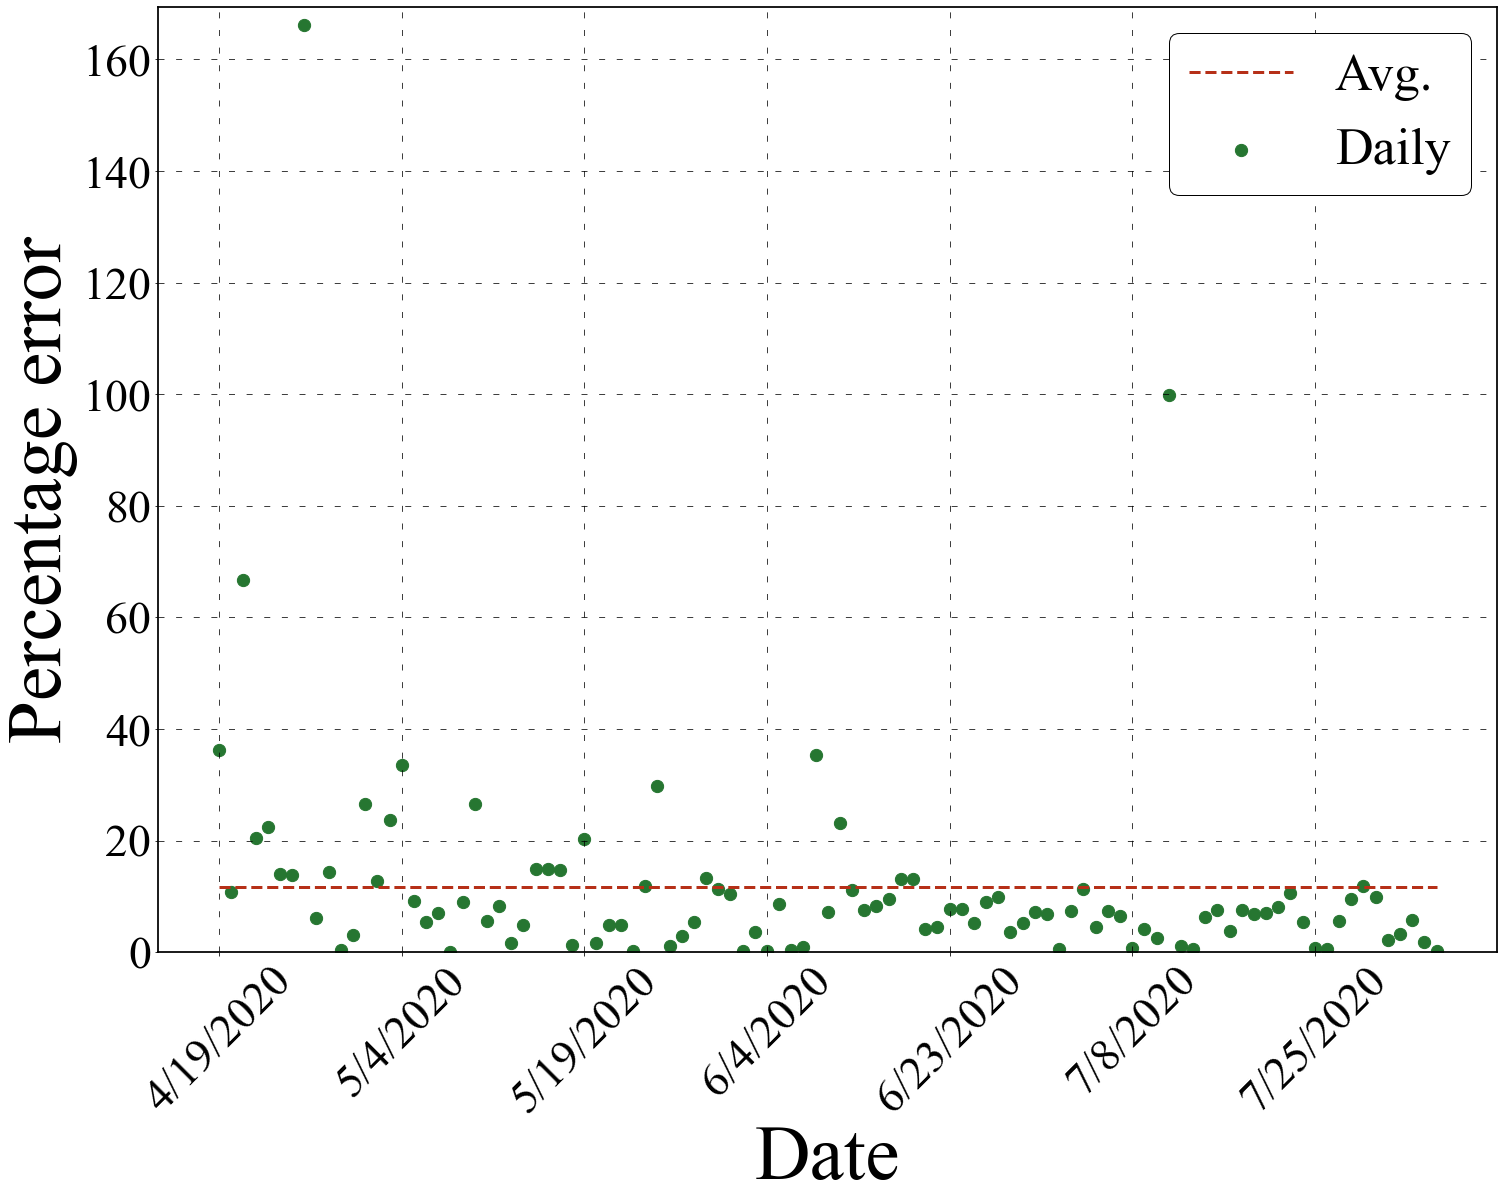

<Figure size 1728x1252.08 with 0 Axes>

In [178]:
plotGraph(errors('IN','affected'), 'IN', 'Affected','13.054')

125.0
31.0
49.0
3.0
103.0
164.0
138.0
34.0
19.0
177.0
136.0
39.0
90.0
23.0
204.0
174.0
247.0
100.0
357.0
195.0
71.0
27.0
146.0
300.0
202.0
477.0
150.0
294.0
345.0
49.0
488.0
183.0
235.0
46.0
81.0
442.0
154.0
236.0
293.0
178.0
561.0
537.0
234.0
463.0
138.0
17.0
440.0
688.0
617.0
95.0
321.0
52.0
84.0
207.0
151.0
61.0
42.0
23.0
114.0
49.0
16.0
19.0
293.0
46.0
205.0
128.0
86.0
64.0
33.0
172.0
33.0
47.0
79.0
92.0
103.0
86.0
117.0
111.0
53.0
24.0
54.0
612.0
183.0
135.0
211.0
163.0
172.0
133.0
112.0
121.0
213.0
16.0
232.0
211.0
39.0
35.0
132.0
173.0
17.0
101.0
233.0
31.0
15.0
53.0
126.0
137.0
87.0
153.0
54.0
63.0
184.0
325.0
105.0
112.0
213.0
165.0
115.0
The mean of differences is :
160.18803418803418
counts:
18
length of values:
117
percentage:
84.61538461538461
Series([], dtype: float64)
[7.49129230830809, 7.49129230830809, 7.49129230830809, 7.49129230830809, 7.49129230830809, 7.49129230830809, 7.49129230830809, 7.49129230830809, 7.49129230830809, 7.49129230830809, 7.49129230830809, 7.49129

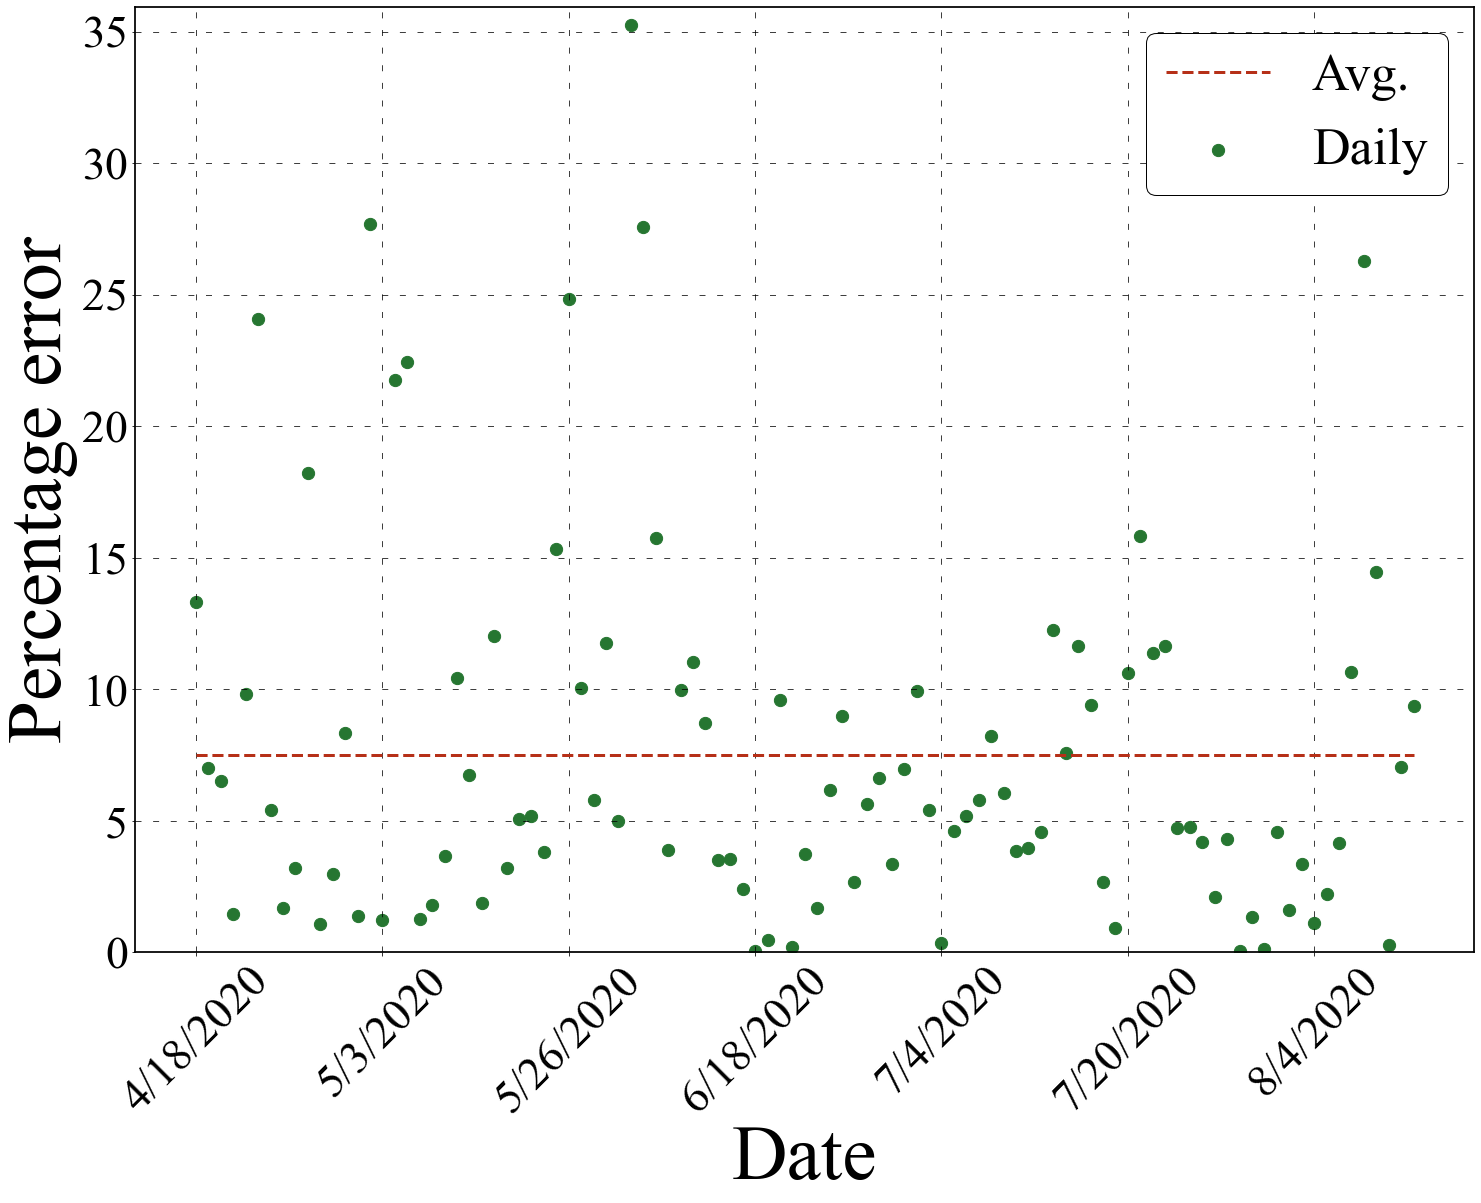

<Figure size 1728x1252.08 with 0 Axes>

In [179]:
plotGraph(errors('IR','affected'), 'IR', 'Affected','13.054')

128.0
44.0
653.0
764.0
1261.0
360.0
893.0
269.0
118.0
371.0
176.0
378.0
90.0
166.0
34.0
51.0
314.0
489.0
373.0
76.0
32.0
376.0
257.0
692.0
135.0
547.0
28.0
325.0
37.0
339.0
299.0
465.0
725.0
13.0
369.0
844.0
970.0
8.0
86.0
150.0
342.0
267.0
381.0
1120.0
21.0
530.0
96.0
753.0
109.0
485.0
1200.0
684.0
93.0
432.0
1728.0
653.0
720.0
1172.0
331.0
732.0
632.0
313.0
626.0
766.0
1711.0
851.0
667.0
663.0
1031.0
360.0
245.0
1627.0
249.0
1060.0
1.0
174.0
2231.0
219.0
1356.0
737.0
285.0
389.0
797.0
1612.0
203.0
2366.0
902.0
257.0
851.0
358.0
2304.0
139.0
1687.0
840.0
2419.0
865.0
822.0
1271.0
507.0
2235.0
1456.0
1978.0
728.0
1098.0
4703.0
86.0
1381.0
9.0
451.0
127.0
222.0
2119.0
1182.0
1128.0
828.0
1513.0
The mean of differences is :
699.9224137931035
counts:
22
length of values:
116
percentage:
81.03448275862068
Series([], dtype: float64)
[23.737194305282255, 23.737194305282255, 23.737194305282255, 23.737194305282255, 23.737194305282255, 23.737194305282255, 23.737194305282255, 23.737194305282255,

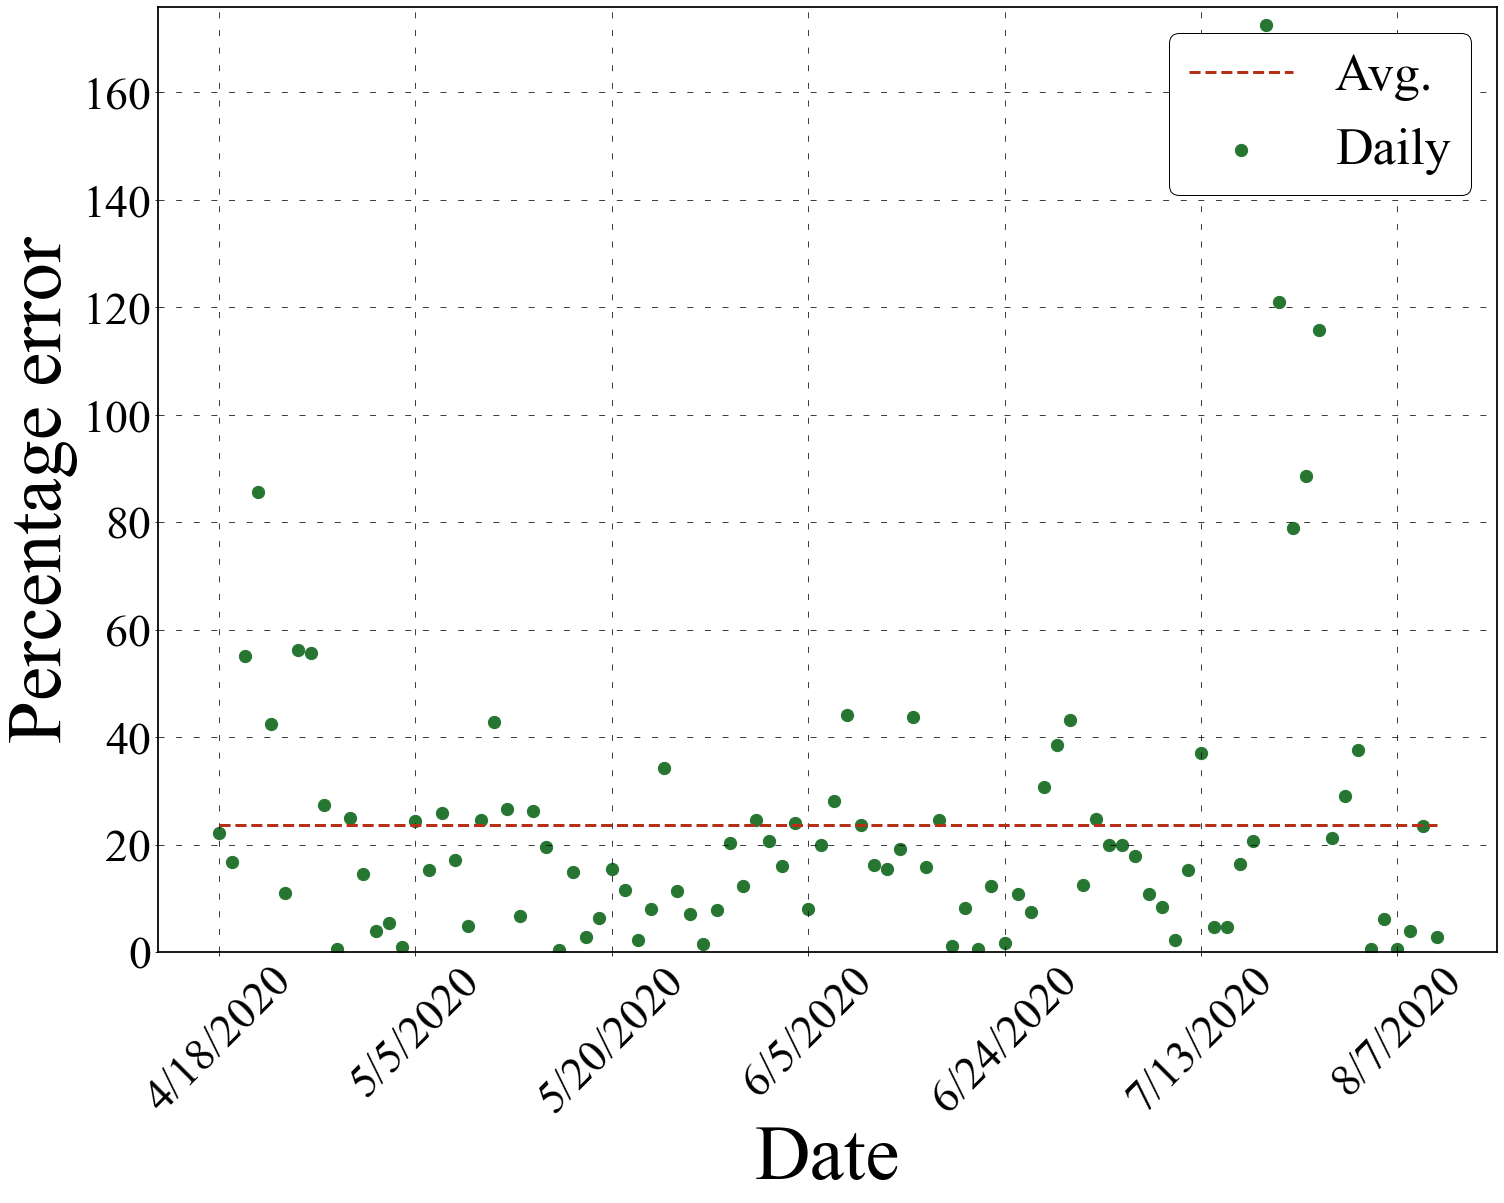

<Figure size 1728x1252.08 with 0 Axes>

In [180]:
plotGraph(errors('MX','affected'), 'MX', 'Affected','13.054')

1275.0
418.0
0.0
406.0
462.0
1075.0
117.0
395.0
349.0
299.0
570.0
1258.0
834.0
1690.0
1010.0
52.0
479.0
457.0
672.0
532.0
118.0
195.0
644.0
757.0
871.0
54.0
624.0
1398.0
509.0
783.0
337.0
499.0
85.0
45.0
540.0
488.0
31.0
577.0
33.0
201.0
380.0
316.0
783.0
373.0
329.0
294.0
105.0
128.0
125.0
1.0
383.0
194.0
384.0
184.0
264.0
112.0
592.0
24.0
417.0
52.0
199.0
101.0
153.0
131.0
173.0
248.0
377.0
55.0
59.0
101.0
0.0
133.0
202.0
42.0
87.0
96.0
150.0
206.0
171.0
43.0
132.0
37.0
1.0
76.0
271.0
170.0
5.0
26.0
175.0
118.0
195.0
73.0
22.0
20.0
51.0
54.0
92.0
134.0
227.0
69.0
35.0
16.0
39.0
42.0
23.0
243.0
65.0
53.0
48.0
6.0
30.0
74.0
189.0
162.0
37.0
The mean of differences is :
281.0086956521739
counts:
23
length of values:
115
percentage:
80.0
Series([], dtype: float64)
[5.54689607539472, 5.54689607539472, 5.54689607539472, 5.54689607539472, 5.54689607539472, 5.54689607539472, 5.54689607539472, 5.54689607539472, 5.54689607539472, 5.54689607539472, 5.54689607539472, 5.54689607539472, 5.54689607

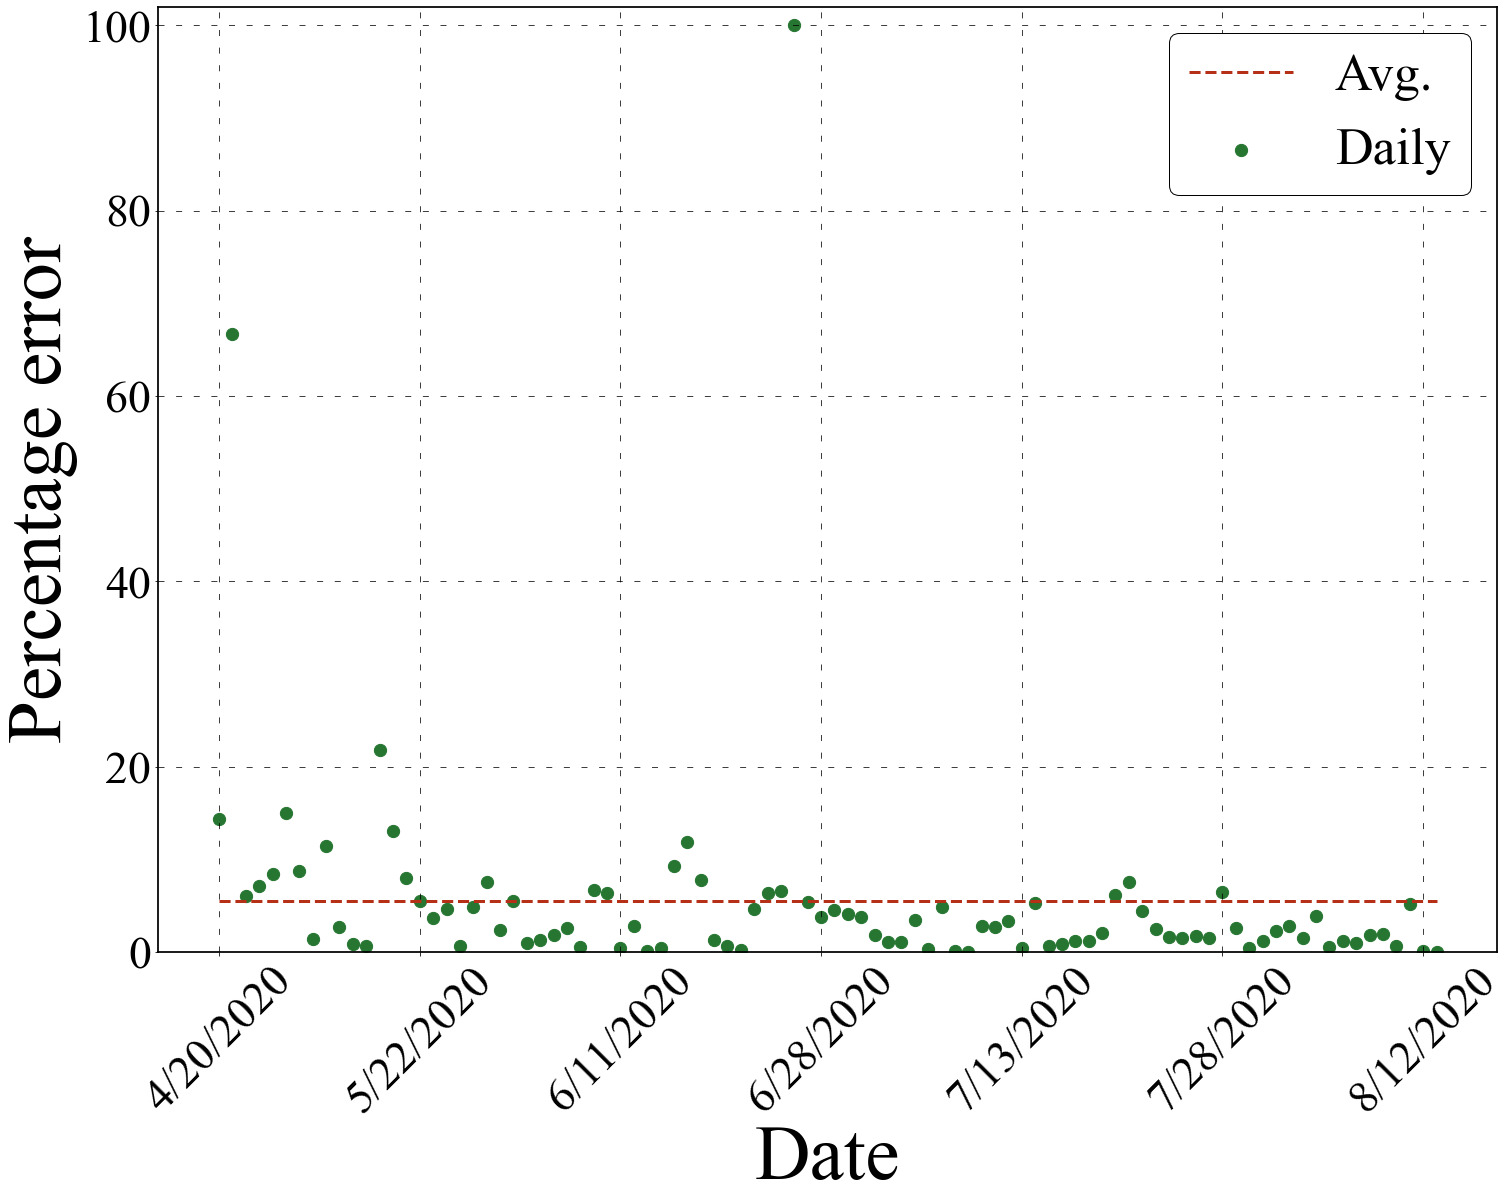

<Figure size 1728x1252.08 with 0 Axes>

In [181]:
plotGraph(errors('RU','affected'), 'RU', 'Affected','13.054')

127.0
18.0
23.0
5.0
148.0
51.0
126.0
106.0
44.0
151.0
57.0
7.0
81.0
62.0
10.0
85.0
116.0
188.0
239.0
138.0
70.0
42.0
61.0
26.0
59.0
120.0
46.0
329.0
242.0
151.0
36.0
331.0
146.0
230.0
186.0
383.0
1024.0
207.0
371.0
110.0
11.0
42.0
219.0
258.0
1554.0
625.0
103.0
227.0
282.0
482.0
318.0
717.0
212.0
450.0
493.0
807.0
694.0
1277.0
600.0
347.0
1141.0
345.0
333.0
230.0
1170.0
891.0
364.0
995.0
876.0
204.0
815.0
1179.0
604.0
335.0
1790.0
2080.0
198.0
1163.0
1324.0
4864.0
1326.0
1149.0
1439.0
504.0
1058.0
2261.0
415.0
201.0
88.0
164.0
4149.0
1130.0
4980.0
46.0
840.0
1740.0
971.0
4137.0
136.0
4130.0
316.0
32.0
907.0
1912.0
2818.0
921.0
4103.0
252.0
1015.0
420.0
1041.0
2932.0
1228.0
299.0
1136.0
The mean of differences is :
754.4956521739131
counts:
18
length of values:
115
percentage:
84.34782608695653
Series([], dtype: float64)
[22.15770480517304, 22.15770480517304, 22.15770480517304, 22.15770480517304, 22.15770480517304, 22.15770480517304, 22.15770480517304, 22.15770480517304, 22.157704805173

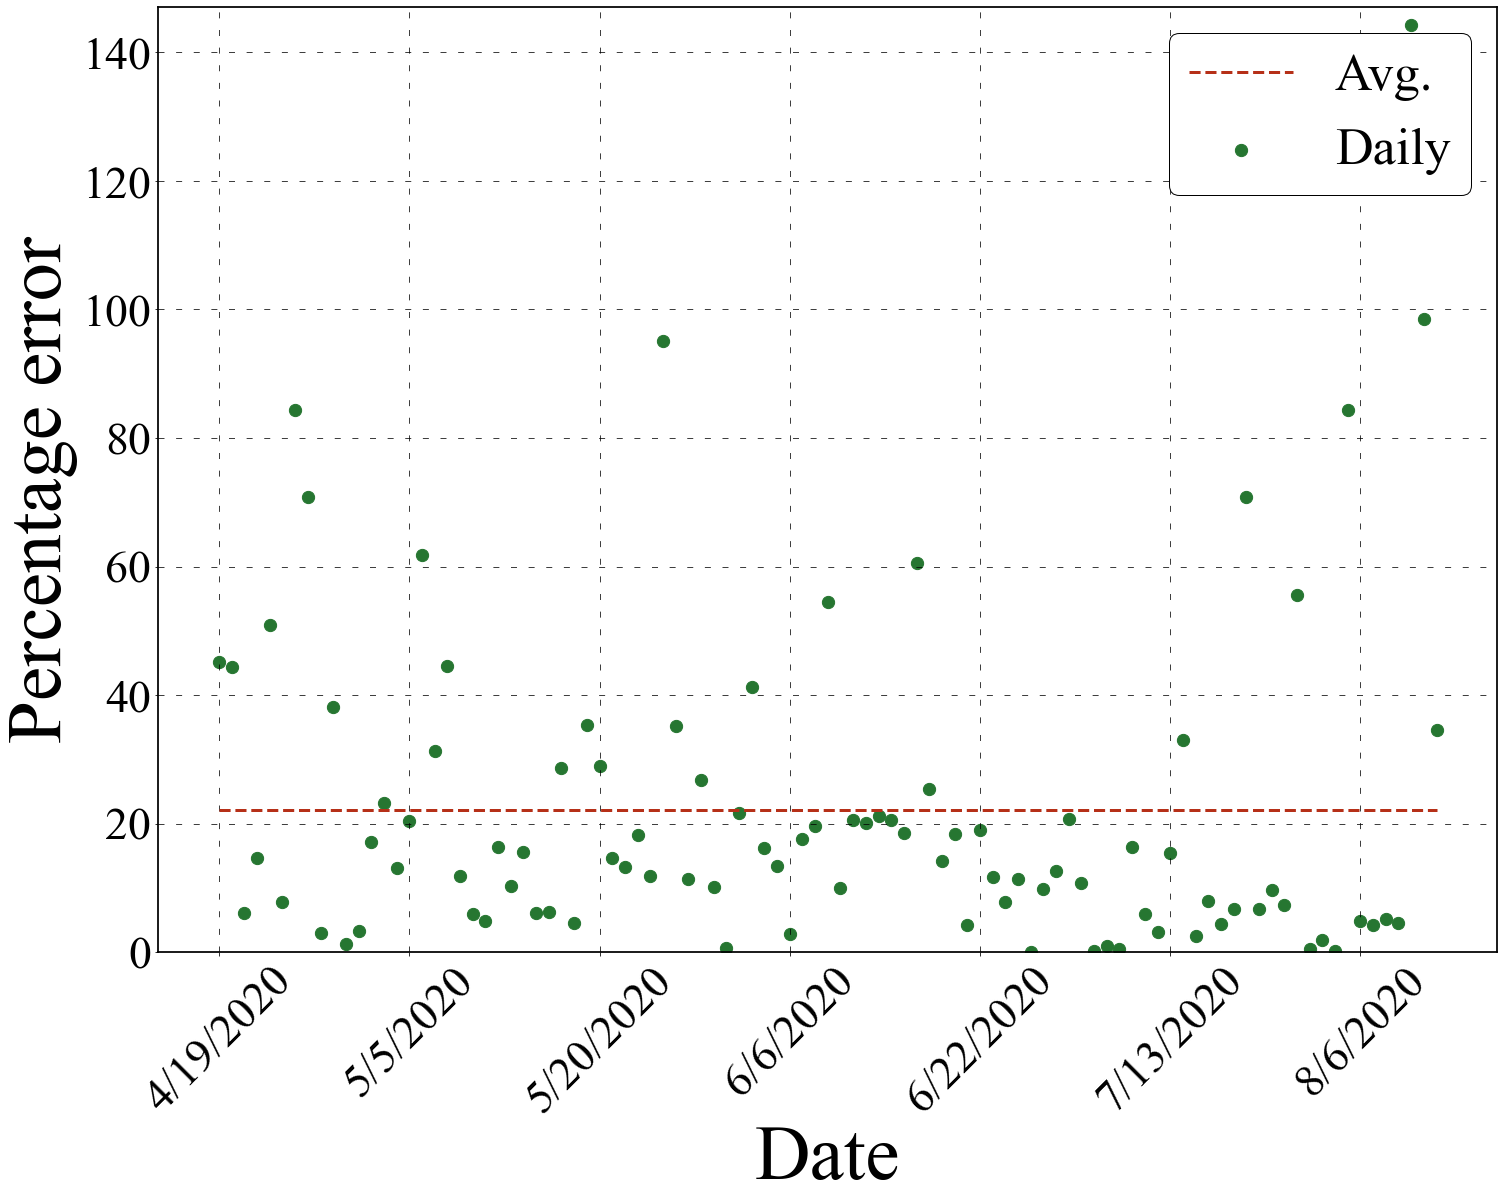

<Figure size 1728x1252.08 with 0 Axes>

In [182]:
plotGraph(errors('ZA','affected'), 'ZA', 'Affected','13.054')

5602.0
12571.0
0.0
14252.0
15321.0
15339.0
550.0
32576.0
9200.0
34026.0
4383.0
3350.0
6727.0
32950.0
3577.0
3166.0
1641.0
276.0
4168.0
1514.0
1285.0
5911.0
1089.0
2874.0
465.0
6338.0
2318.0
54.0
6059.0
2614.0
1291.0
3025.0
2009.0
1504.0
2115.0
2619.0
445.0
348.0
4314.0
1689.0
120.0
4139.0
1181.0
387.0
1102.0
1441.0
3580.0
2039.0
379.0
5052.0
5448.0
15432.0
4351.0
2513.0
144.0
6008.0
436.0
3737.0
1854.0
2203.0
2147.0
2631.0
6369.0
4841.0
3708.0
381.0
5633.0
5283.0
2658.0
3752.0
2741.0
3180.0
5889.0
1636.0
187.0
6821.0
3916.0
4246.0
15068.0
1420.0
4646.0
3380.0
5275.0
2335.0
903.0
9303.0
1144.0
10982.0
5697.0
7860.0
1851.0
5097.0
7784.0
7161.0
3032.0
5052.0
8225.0
10537.0
1383.0
5324.0
9116.0
3157.0
596.0
8617.0
10895.0
2143.0
12172.0
4730.0
6882.0
1519.0
1999.0
9239.0
2601.0
2728.0
The mean of differences is :
5061.166666666667
counts:
18
length of values:
114
percentage:
84.21052631578947
Series([], dtype: float64)
[14.079512108925035, 14.079512108925035, 14.079512108925035, 14.0795121

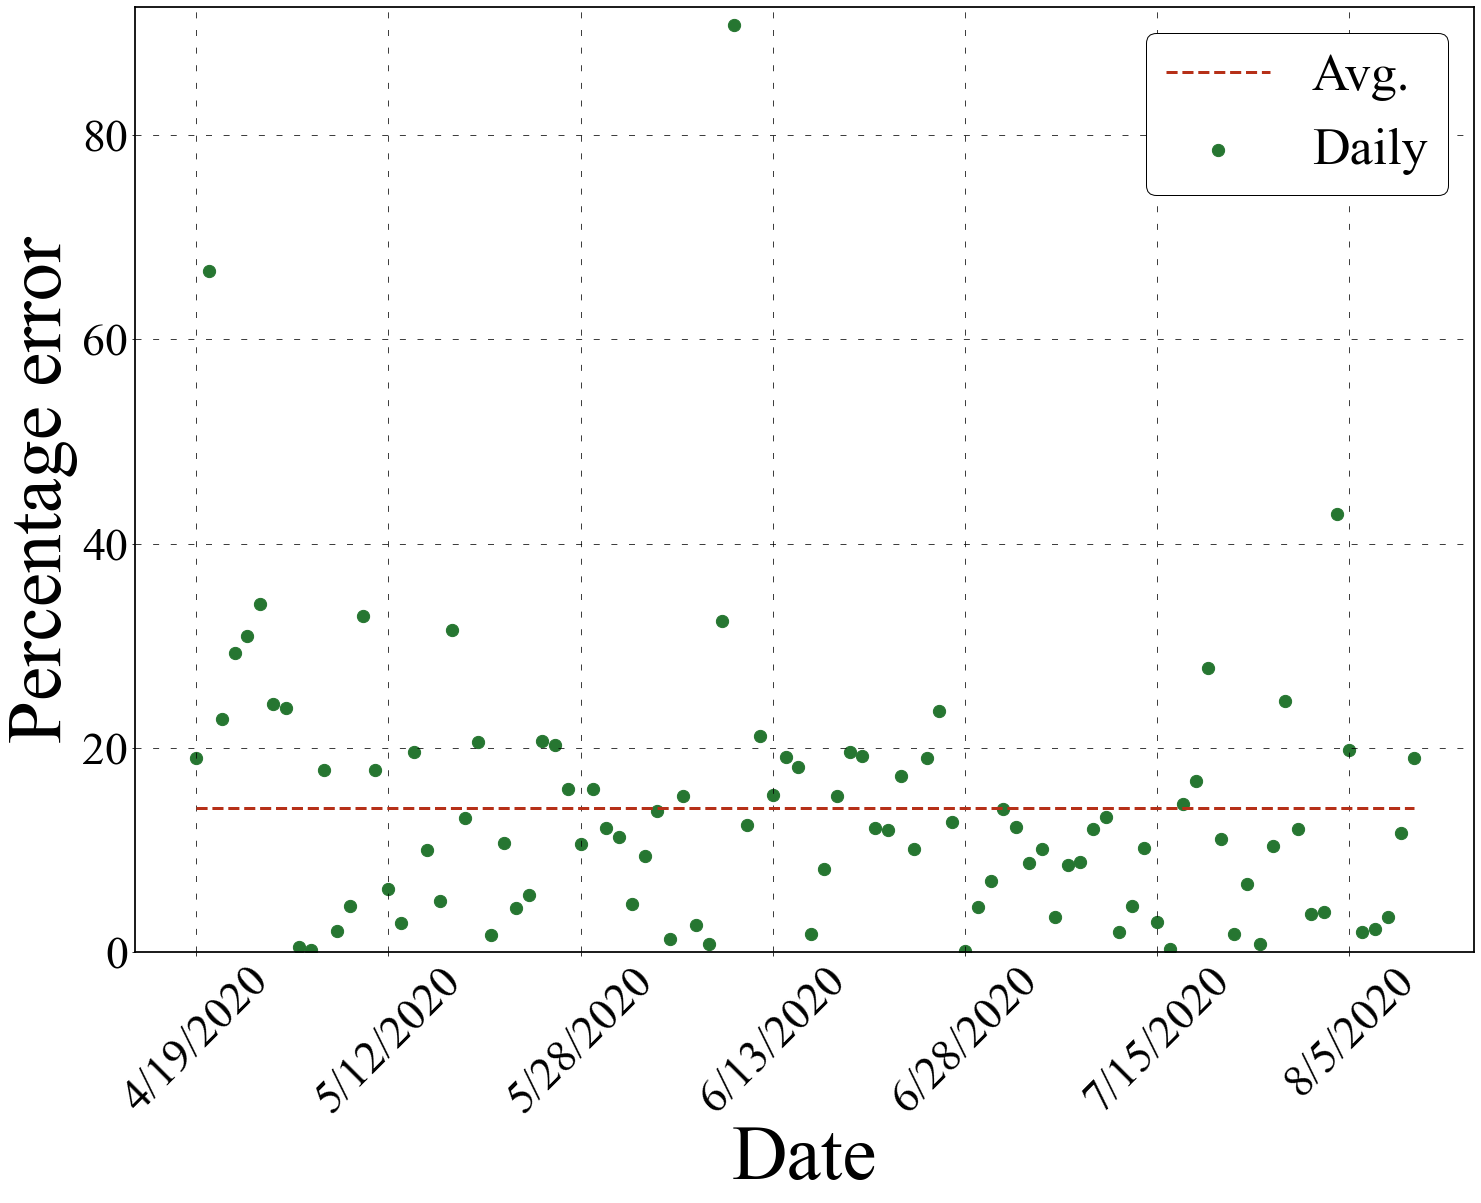

<Figure size 1728x1252.08 with 0 Axes>

In [183]:
plotGraph(errors('US','affected'), 'US', 'Affected','13.054')

6.0
2.0
3.0
1.0
1.0
3.0
3.0
5.0
4.0
2.0
4.0
5.0
3.0
3.0
3.0
3.0
3.0
4.0
2.0
10.0
6.0
1.0
6.0
3.0
0.0
8.0
5.0
1.0
1.0
2.0
7.0
0.0
5.0
6.0
2.0
4.0
1.0
0.0
1.0
7.0
8.0
5.0
12.0
18.0
15.0
0.0
2.0
5.0
5.0
7.0
0.0
3.0
8.0
0.0
9.0
2.0
12.0
6.0
15.0
10.0
5.0
7.0
8.0
2.0
1.0
5.0
6.0
2.0
1.0
6.0
9.0
2.0
19.0
23.0
3.0
4.0
13.0
26.0
11.0
11.0
9.0
5.0
4.0
7.0
17.0
8.0
6.0
0.0
6.0
12.0
17.0
3.0
13.0
9.0
1.0
8.0
15.0
3.0
16.0
17.0
2.0
0.0
13.0
20.0
7.0
1.0
8.0
20.0
17.0
6.0
12.0
5.0
2.0
5.0
6.0
9.0
2.0
The mean of differences is :
6.435897435897436
counts:
23
length of values:
117
percentage:
80.34188034188034
Series([], dtype: float64)
[26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819711820647, 26.311819

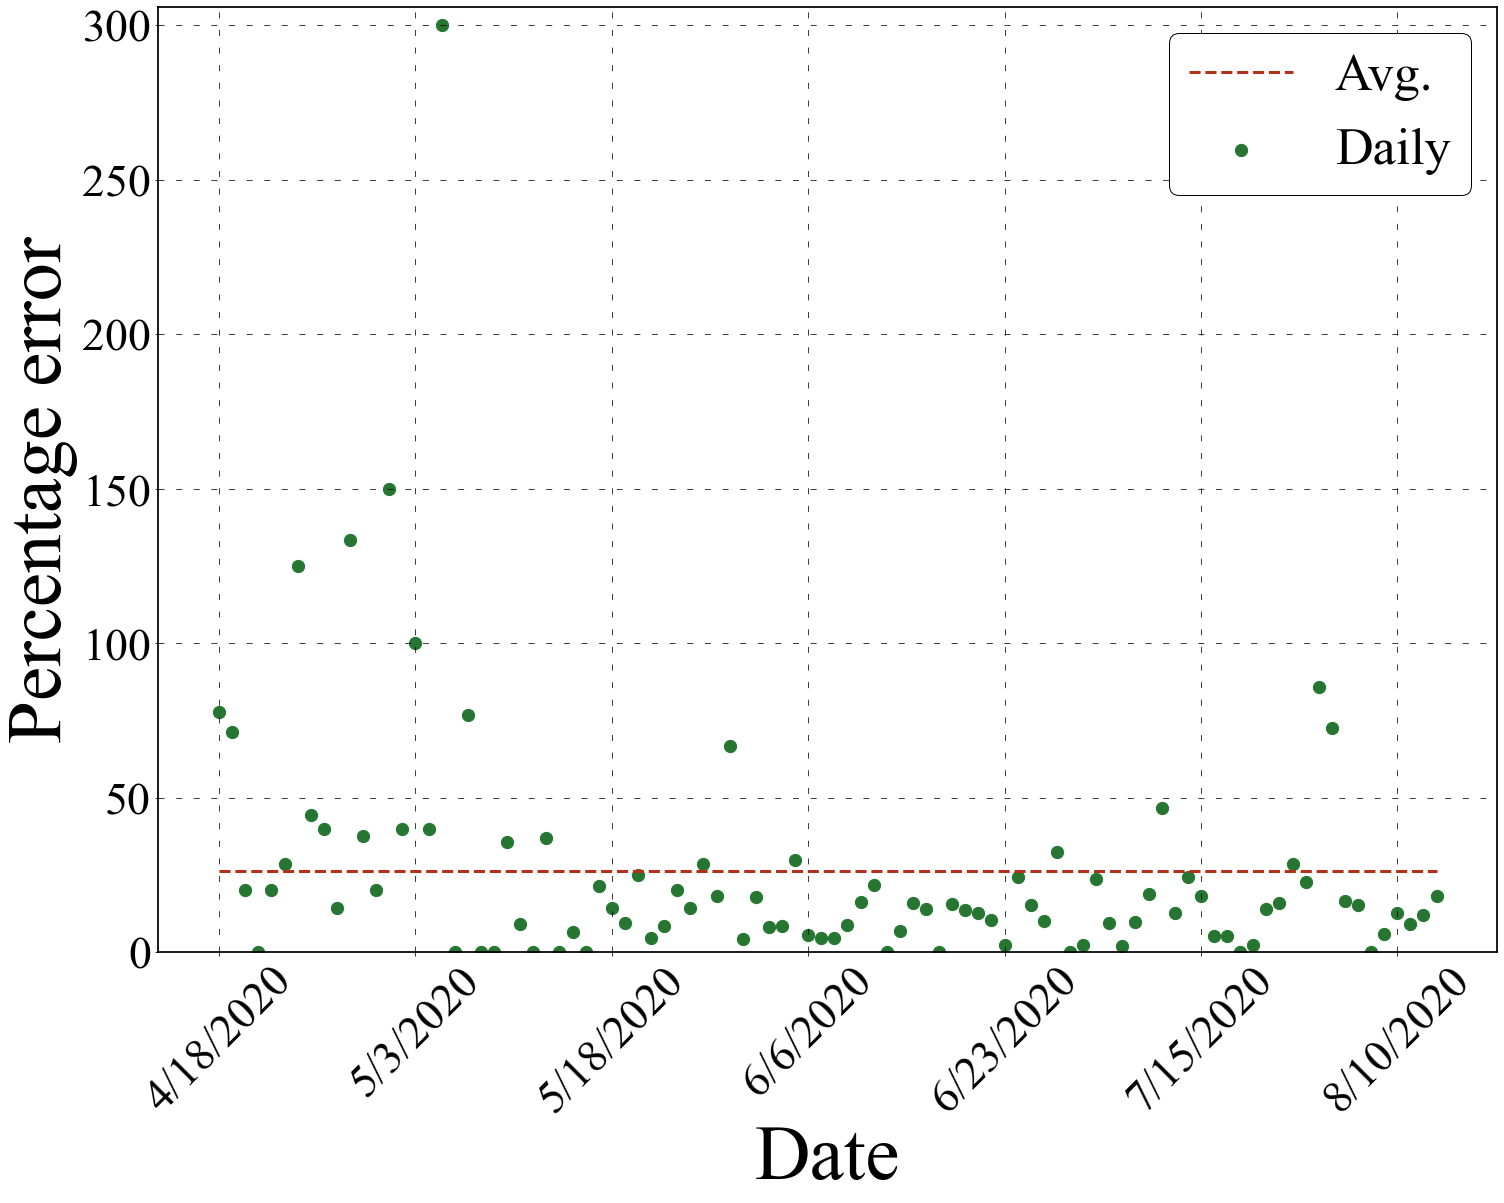

<Figure size 1728x1252.08 with 0 Axes>

In [203]:
plotGraph(errors('BD','dead'), 'BD', 'deaths','13.054')

105.0
17.0
29.0
29.0
242.0
52.0
20.0
36.0
163.0
50.0
63.0
87.0
57.0
59.0
26.0
255.0
79.0
48.0
225.0
188.0
172.0
63.0
249.0
20.0
204.0
263.0
244.0
279.0
395.0
254.0
312.0
187.0
36.0
158.0
232.0
47.0
70.0
32.0
168.0
476.0
143.0
639.0
87.0
124.0
569.0
379.0
154.0
593.0
2.0
35.0
330.0
17.0
280.0
15.0
655.0
13.0
31.0
32.0
184.0
407.0
65.0
694.0
189.0
44.0
151.0
119.0
557.0
140.0
588.0
242.0
214.0
161.0
489.0
18.0
634.0
31.0
3.0
6.0
143.0
440.0
102.0
567.0
67.0
89.0
159.0
242.0
205.0
84.0
735.0
83.0
27.0
155.0
55.0
656.0
59.0
307.0
674.0
466.0
83.0
124.0
547.0
20.0
593.0
283.0
200.0
158.0
174.0
333.0
131.0
472.0
87.0
The mean of differences is :
209.4144144144144
counts:
22
length of values:
111
percentage:
80.18018018018019
Series([], dtype: float64)
[28.95383003326297, 28.95383003326297, 28.95383003326297, 28.95383003326297, 28.95383003326297, 28.95383003326297, 28.95383003326297, 28.95383003326297, 28.95383003326297, 28.95383003326297, 28.95383003326297, 28.95383003326297, 28.953830033262

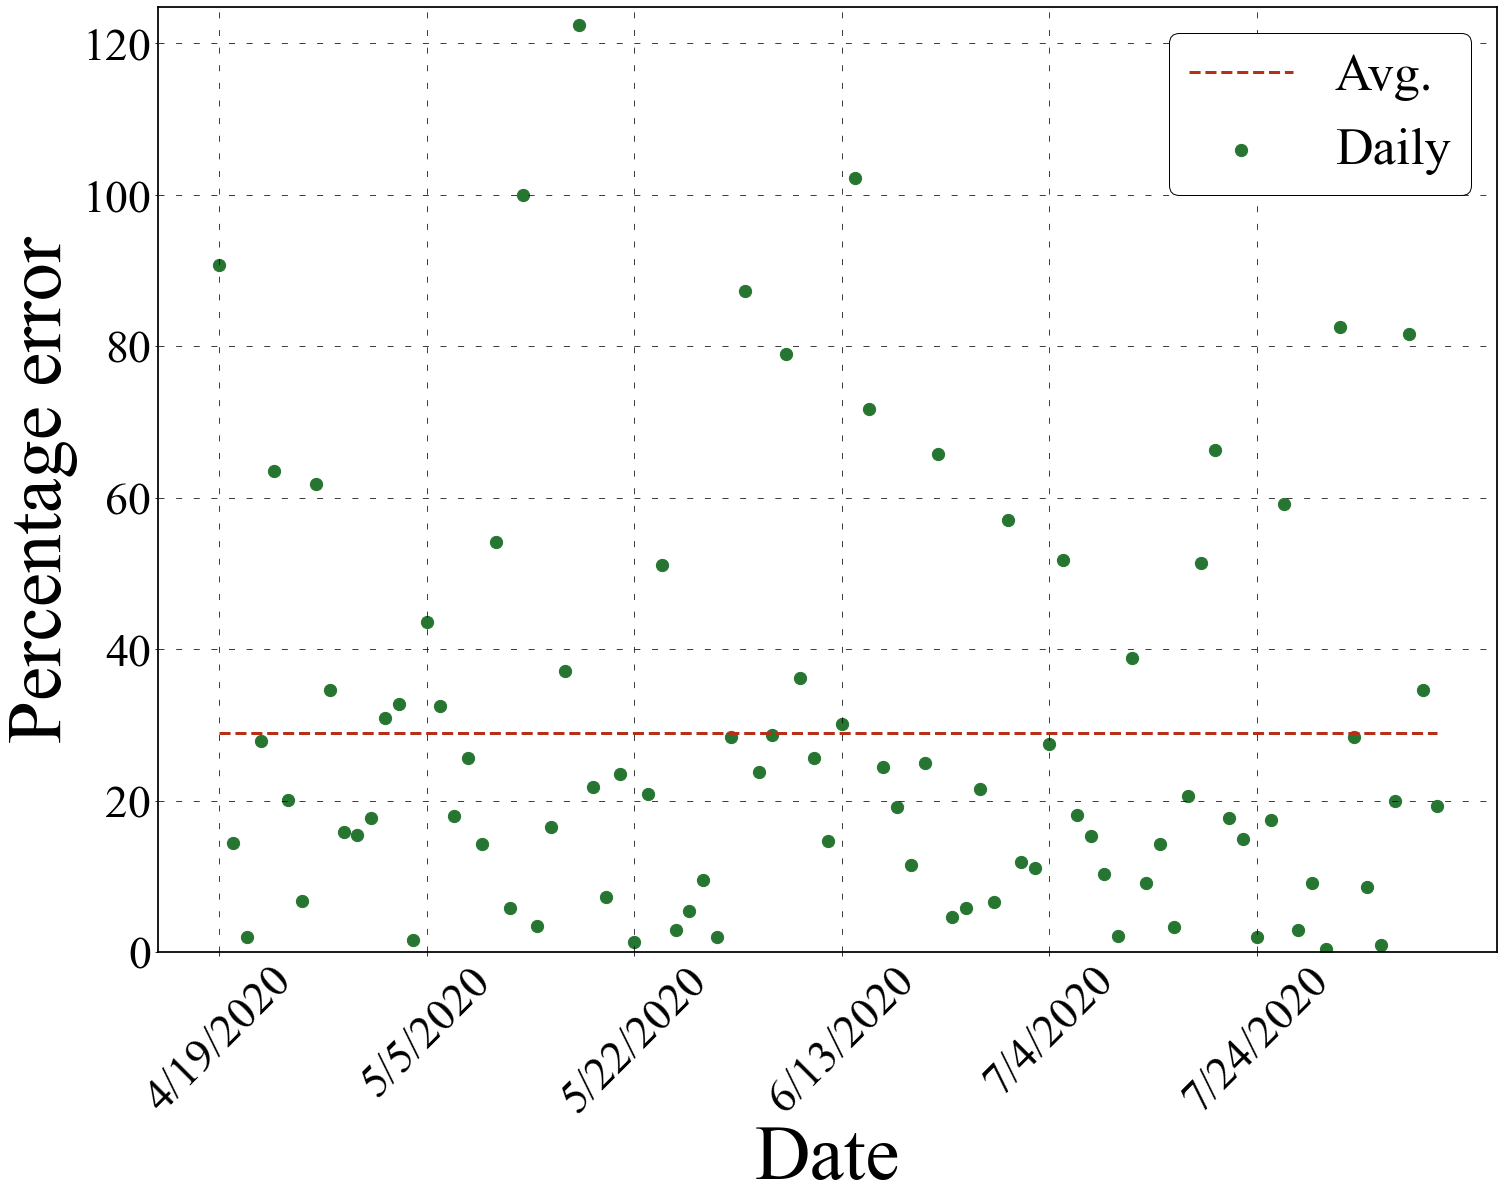

<Figure size 1728x1252.08 with 0 Axes>

In [202]:
plotGraph(errors('BR','dead'), 'BR', 'deaths','13.054')

In [211]:
IN = pd.read_csv('final2_INdead.csv')

Series([], dtype: float64)
[18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982079125, 18.943707982

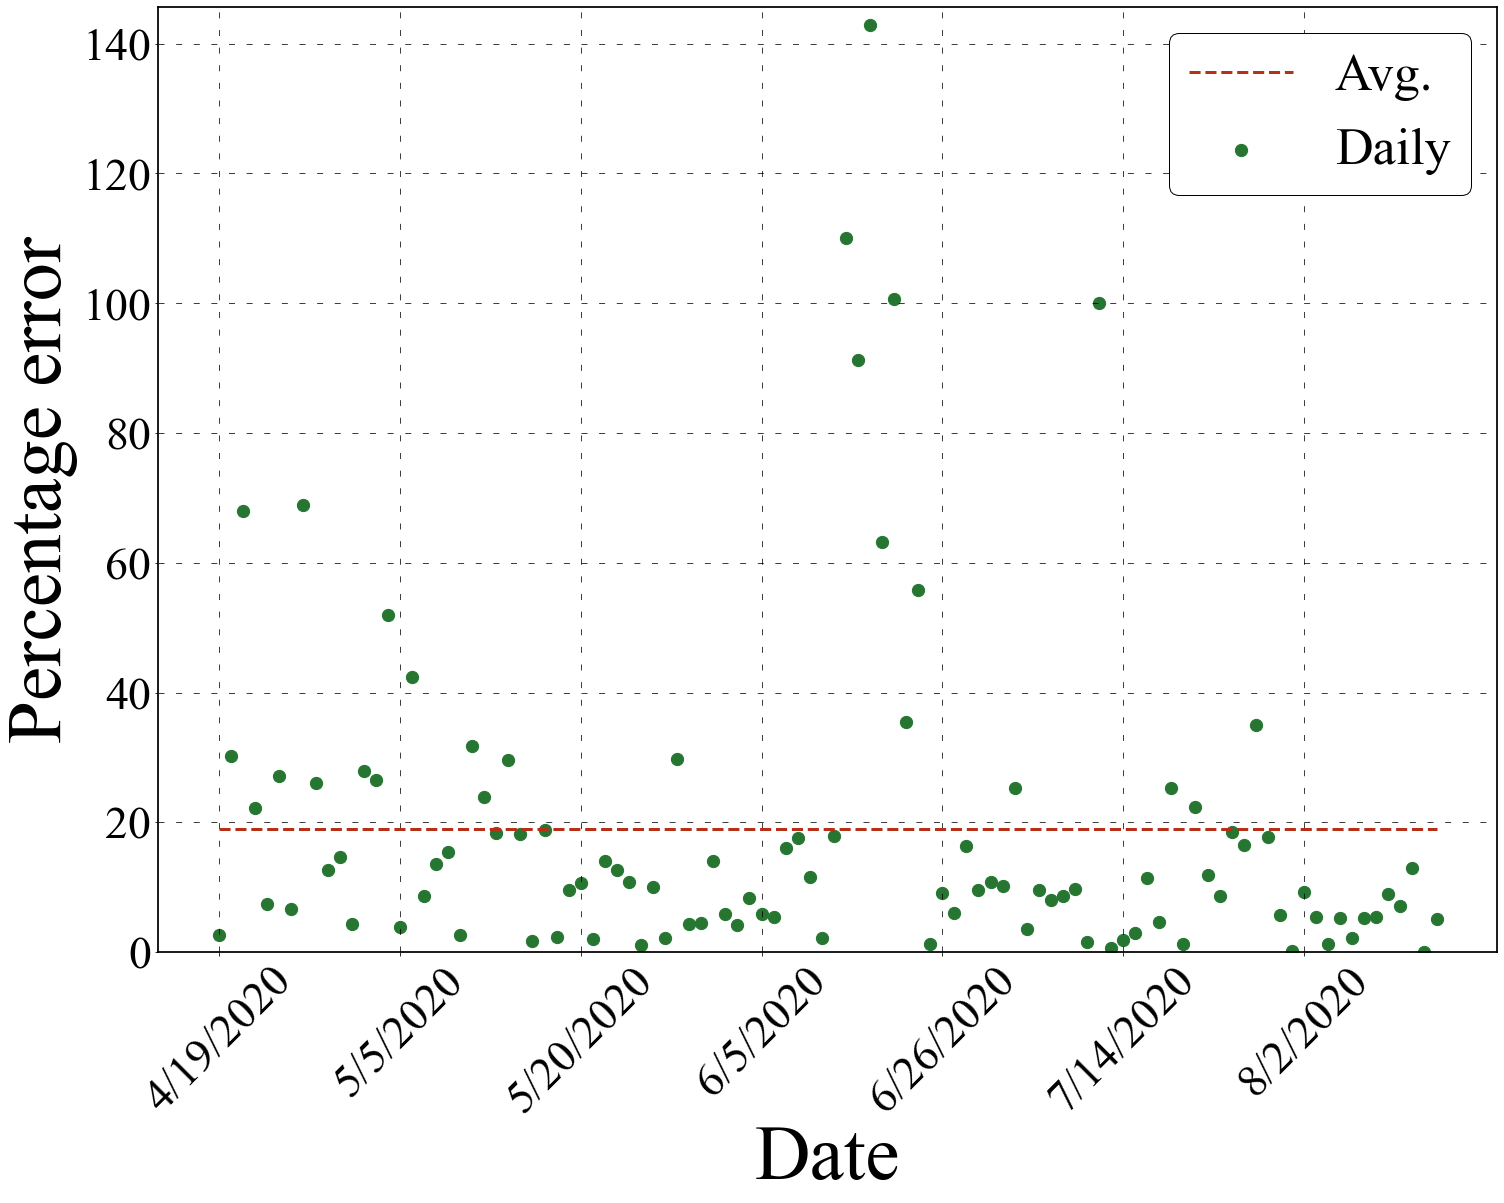

<Figure size 1728x1252.08 with 0 Axes>

In [212]:
plotGraph(IN, 'IN', 'deaths','13.054')

16.0
14.0
4.0
3.0
6.0
4.0
3.0
17.0
16.0
3.0
8.0
9.0
9.0
8.0
2.0
18.0
27.0
11.0
15.0
10.0
13.0
7.0
3.0
6.0
3.0
2.0
21.0
23.0
13.0
16.0
18.0
7.0
2.0
2.0
15.0
8.0
25.0
23.0
1.0
7.0
13.0
7.0
6.0
18.0
17.0
6.0
11.0
4.0
12.0
3.0
2.0
4.0
7.0
3.0
3.0
4.0
36.0
6.0
2.0
5.0
33.0
33.0
5.0
1.0
3.0
2.0
12.0
1.0
25.0
16.0
19.0
18.0
15.0
6.0
7.0
6.0
6.0
15.0
3.0
40.0
47.0
68.0
79.0
46.0
6.0
9.0
24.0
20.0
1.0
15.0
5.0
21.0
8.0
12.0
10.0
2.0
6.0
20.0
21.0
4.0
23.0
39.0
30.0
29.0
19.0
8.0
7.0
3.0
27.0
11.0
18.0
24.0
31.0
26.0
5.0
4.0
14.0
The mean of differences is :
13.632478632478632
counts:
22
length of values:
117
percentage:
81.19658119658119
Series([], dtype: float64)
[12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552969, 12.606152490552

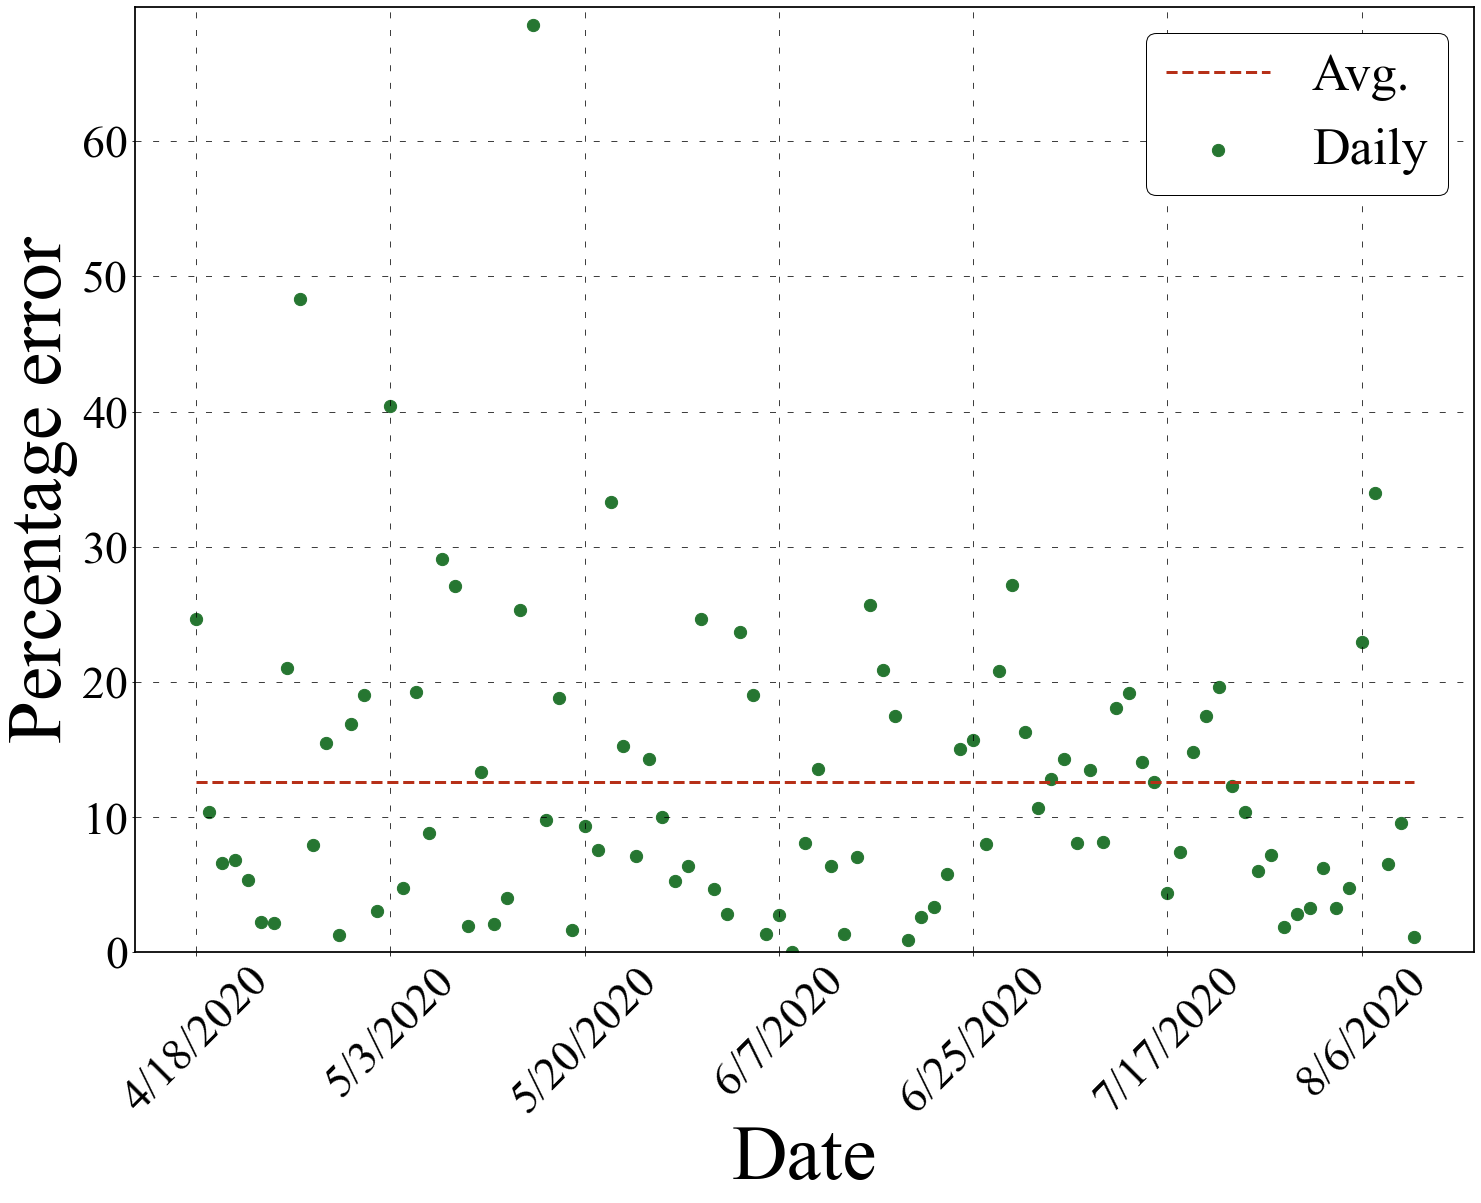

<Figure size 1728x1252.08 with 0 Axes>

In [206]:
plotGraph(errors('IR','dead'), 'IR', 'deaths','13.054')

23.0
44.0
42.0
36.0
232.0
46.0
60.0
68.0
1.0
52.0
28.0
36.0
14.0
24.0
4.0
24.0
119.0
39.0
60.0
58.0
6.0
81.0
4.0
245.0
59.0
37.0
33.0
12.0
146.0
23.0
179.0
90.0
4.0
59.0
289.0
49.0
262.0
38.0
16.0
76.0
7.0
213.0
86.0
233.0
622.0
276.0
191.0
284.0
153.0
166.0
242.0
112.0
121.0
83.0
80.0
155.0
170.0
291.0
40.0
103.0
20.0
260.0
657.0
285.0
34.0
154.0
211.0
17.0
117.0
335.0
206.0
175.0
93.0
62.0
25.0
131.0
250.0
207.0
415.0
113.0
52.0
65.0
126.0
263.0
209.0
351.0
257.0
89.0
68.0
158.0
282.0
5.0
614.0
125.0
72.0
19.0
298.0
693.0
512.0
369.0
154.0
49.0
96.0
510.0
8.0
591.0
28.0
10.0
25.0
99.0
403.0
413.0
221.0
189.0
110.0
The mean of differences is :
153.44347826086957
counts:
24
length of values:
115
percentage:
79.13043478260869
Series([], dtype: float64)
[40.70335861778849, 40.70335861778849, 40.70335861778849, 40.70335861778849, 40.70335861778849, 40.70335861778849, 40.70335861778849, 40.70335861778849, 40.70335861778849, 40.70335861778849, 40.70335861778849, 40.70335861778849, 40.703358

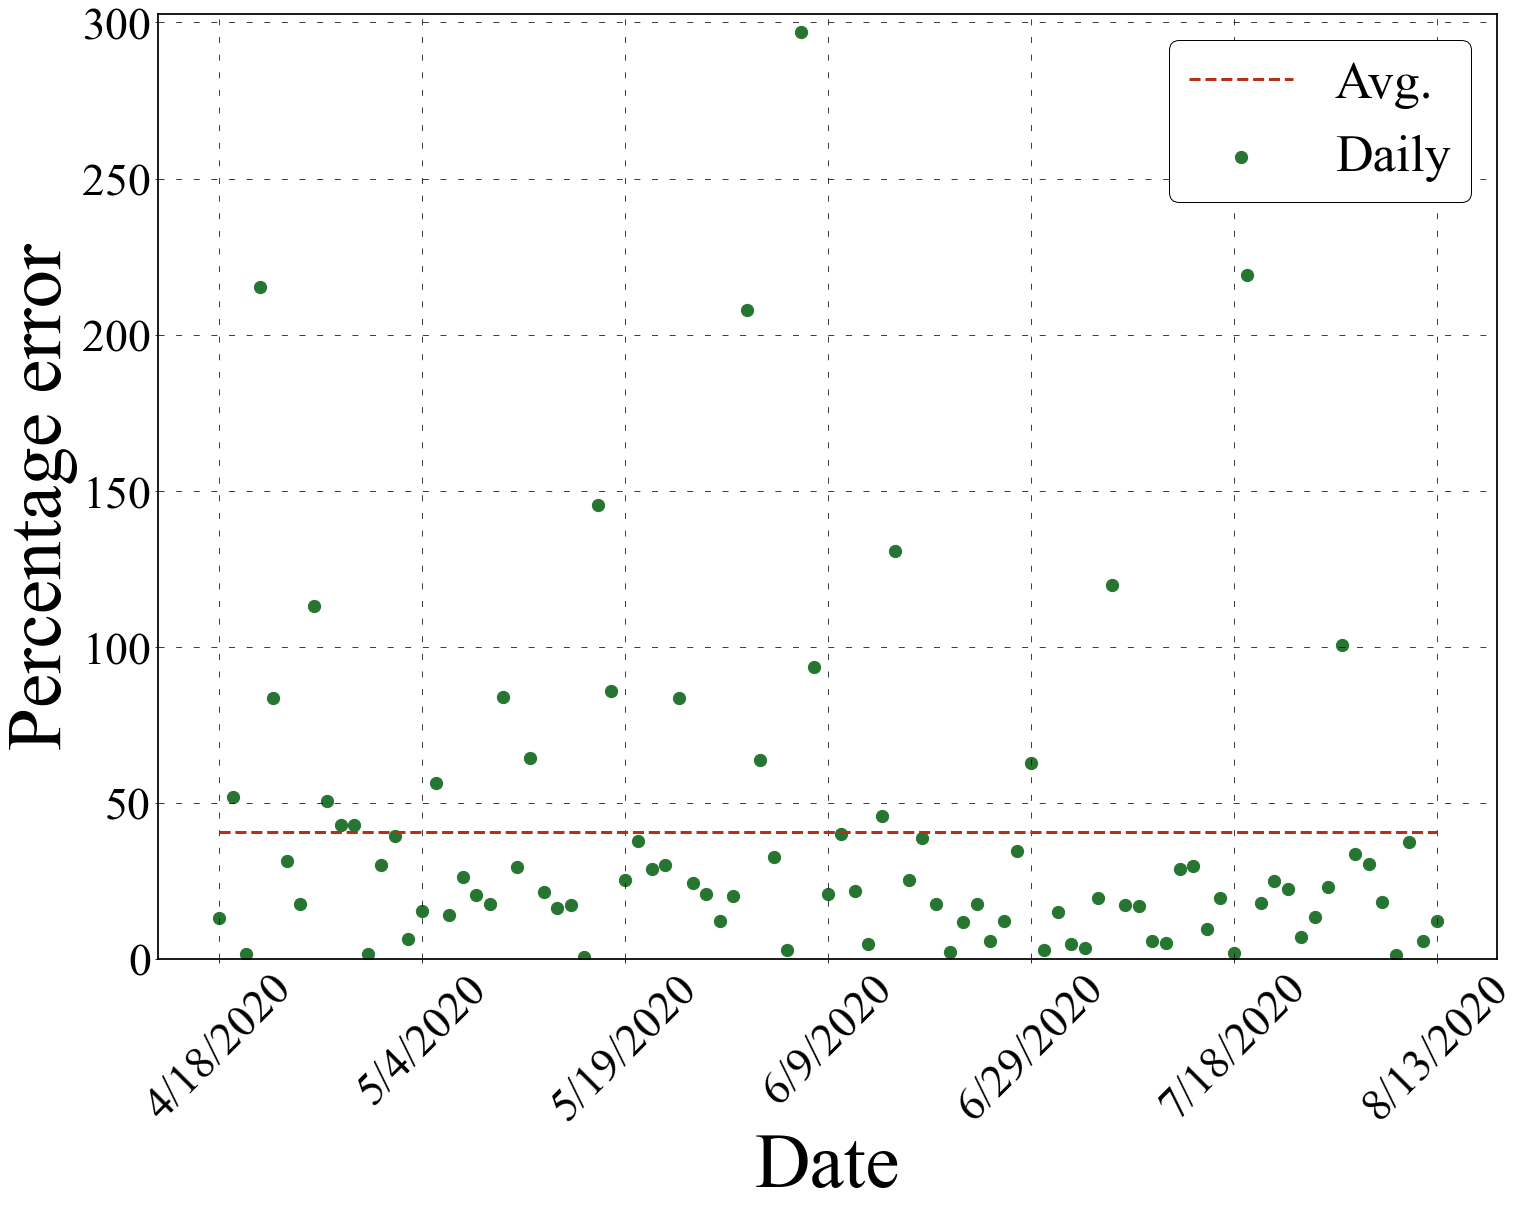

<Figure size 1728x1252.08 with 0 Axes>

In [207]:
plotGraph(errors('MX','dead'), 'MX', 'deaths','13.054')

8.0
3.0
0.0
6.0
15.0
18.0
6.0
0.0
13.0
20.0
32.0
4.0
5.0
43.0
5.0
18.0
19.0
9.0
2.0
10.0
6.0
16.0
6.0
13.0
11.0
3.0
20.0
6.0
25.0
3.0
24.0
20.0
8.0
23.0
11.0
47.0
82.0
13.0
13.0
58.0
51.0
43.0
18.0
26.0
5.0
9.0
24.0
53.0
63.0
22.0
59.0
45.0
44.0
11.0
69.0
5.0
24.0
50.0
1.0
12.0
1.0
20.0
52.0
14.0
58.0
1.0
22.0
12.0
86.0
10.0
62.0
61.0
68.0
29.0
9.0
33.0
1.0
63.0
26.0
4.0
2.0
14.0
58.0
26.0
71.0
19.0
11.0
19.0
64.0
27.0
10.0
68.0
12.0
18.0
6.0
7.0
69.0
8.0
64.0
18.0
39.0
33.0
66.0
25.0
9.0
65.0
6.0
24.0
5.0
10.0
53.0
6.0
60.0
2.0
6.0
The mean of differences is :
25.304347826086957
counts:
30
length of values:
115
percentage:
73.91304347826086
Series([], dtype: float64)
[19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438, 19.50627183832438,

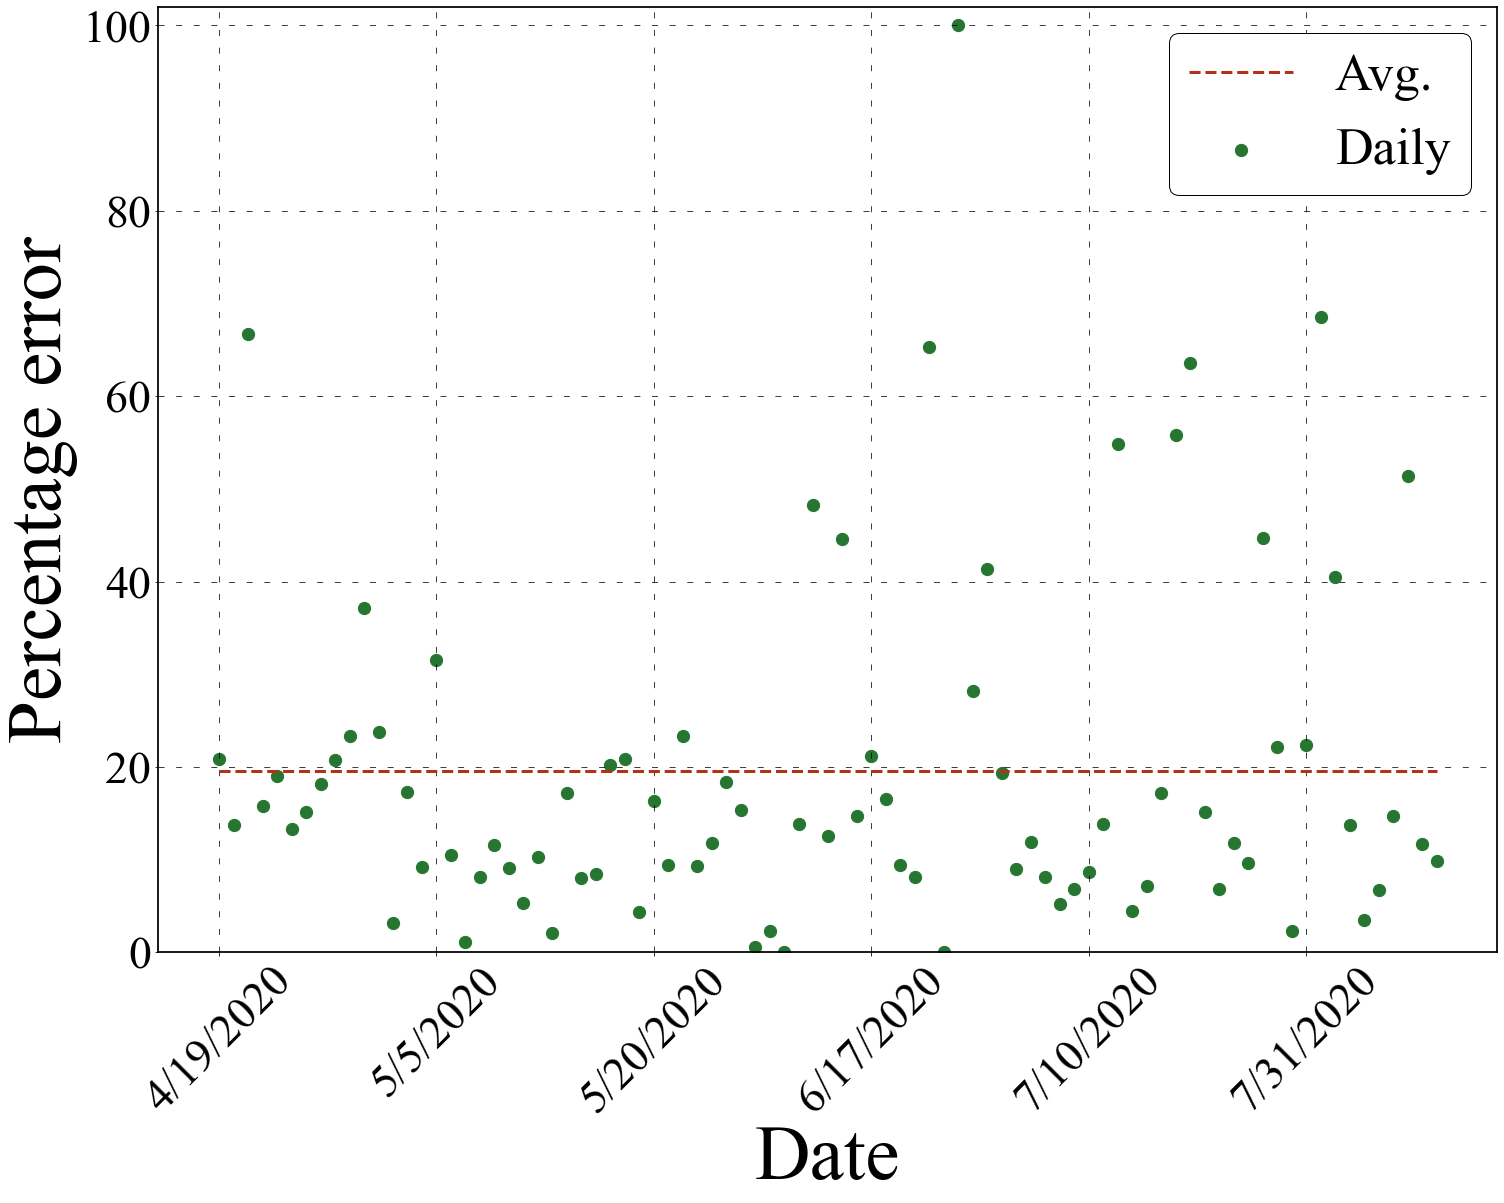

<Figure size 1728x1252.08 with 0 Axes>

In [208]:
plotGraph(errors('RU','dead'), 'RU', 'deaths','13.054')

0.0
2.0
3.0
3.0
6.0
3.0
4.0
0.0
7.0
3.0
6.0
1.0
1.0
3.0
5.0
3.0
9.0
9.0
0.0
4.0
1.0
6.0
10.0
5.0
11.0
19.0
4.0
1.0
3.0
2.0
18.0
42.0
9.0
15.0
3.0
9.0
2.0
8.0
18.0
28.0
13.0
19.0
4.0
16.0
2.0
36.0
0.0
34.0
26.0
4.0
1.0
12.0
31.0
31.0
8.0
14.0
31.0
48.0
7.0
8.0
50.0
8.0
16.0
39.0
25.0
30.0
30.0
55.0
36.0
3.0
13.0
34.0
99.0
62.0
81.0
92.0
18.0
22.0
29.0
3.0
15.0
81.0
67.0
109.0
81.0
9.0
59.0
55.0
55.0
377.0
419.0
97.0
62.0
198.0
184.0
108.0
50.0
75.0
122.0
45.0
65.0
40.0
172.0
69.0
108.0
1.0
4.0
103.0
15.0
83.0
129.0
1.0
The mean of differences is :
39.589285714285715
counts:
21
length of values:
112
percentage:
81.25
Series([], dtype: float64)
[38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.11448374601131, 38.1144

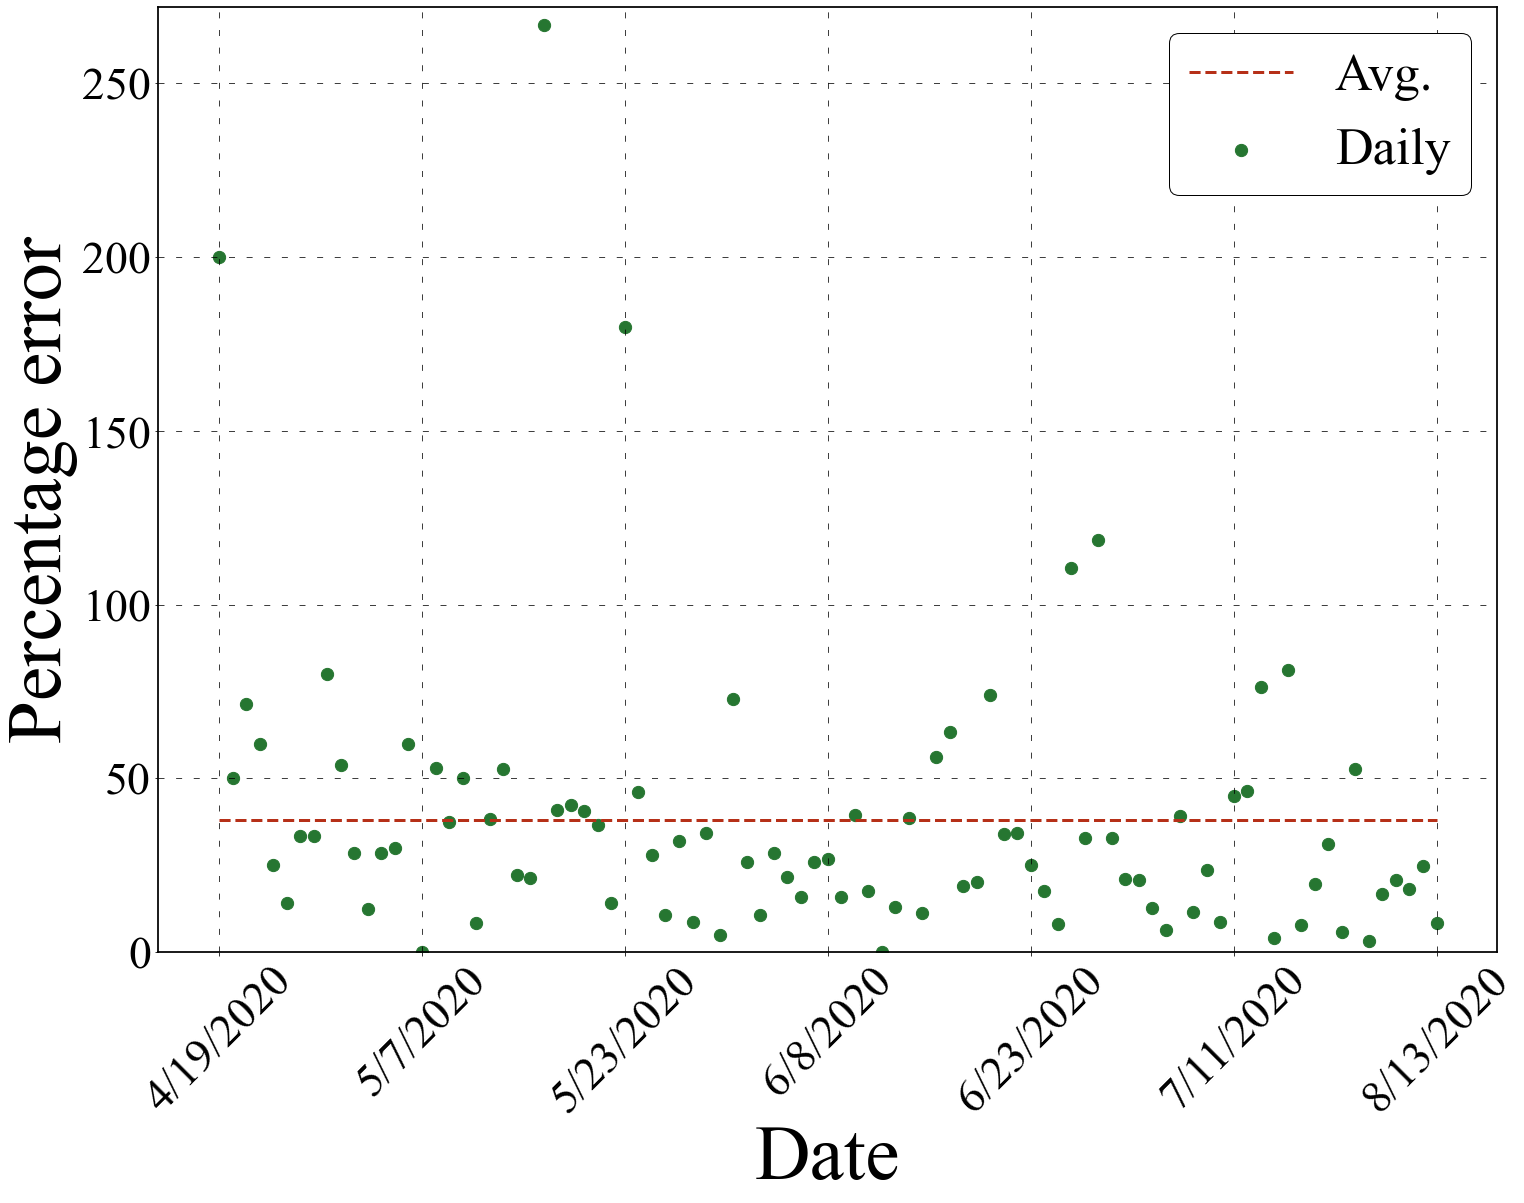

<Figure size 1728x1252.08 with 0 Axes>

In [209]:
plotGraph(errors('ZA','dead'), 'ZA', 'deaths','13.054')

106.0
754.0
0.0
80.0
431.0
1031.0
76.0
1797.0
543.0
1954.0
306.0
419.0
114.0
1354.0
113.0
73.0
902.0
225.0
136.0
713.0
97.0
884.0
425.0
518.0
89.0
16.0
147.0
408.0
416.0
23.0
789.0
56.0
255.0
14.0
169.0
608.0
193.0
812.0
306.0
6.0
226.0
362.0
179.0
247.0
36.0
41.0
115.0
251.0
42.0
230.0
201.0
252.0
39.0
50.0
79.0
471.0
99.0
441.0
82.0
37.0
39.0
83.0
337.0
167.0
401.0
75.0
1674.0
1796.0
129.0
236.0
74.0
939.0
632.0
10.0
4.0
389.0
29.0
54.0
870.0
375.0
170.0
188.0
117.0
257.0
28.0
500.0
41.0
2.0
35.0
55.0
438.0
43.0
710.0
113.0
81.0
16.0
230.0
430.0
606.0
168.0
159.0
170.0
26.0
126.0
720.0
127.0
859.0
11.0
138.0
7.0
167.0
561.0
10.0
549.0
The mean of differences is :
324.640350877193
counts:
23
length of values:
114
percentage:
79.82456140350878
Series([], dtype: float64)
[39.877900964281714, 39.877900964281714, 39.877900964281714, 39.877900964281714, 39.877900964281714, 39.877900964281714, 39.877900964281714, 39.877900964281714, 39.877900964281714, 39.877900964281714, 39.877900964281714

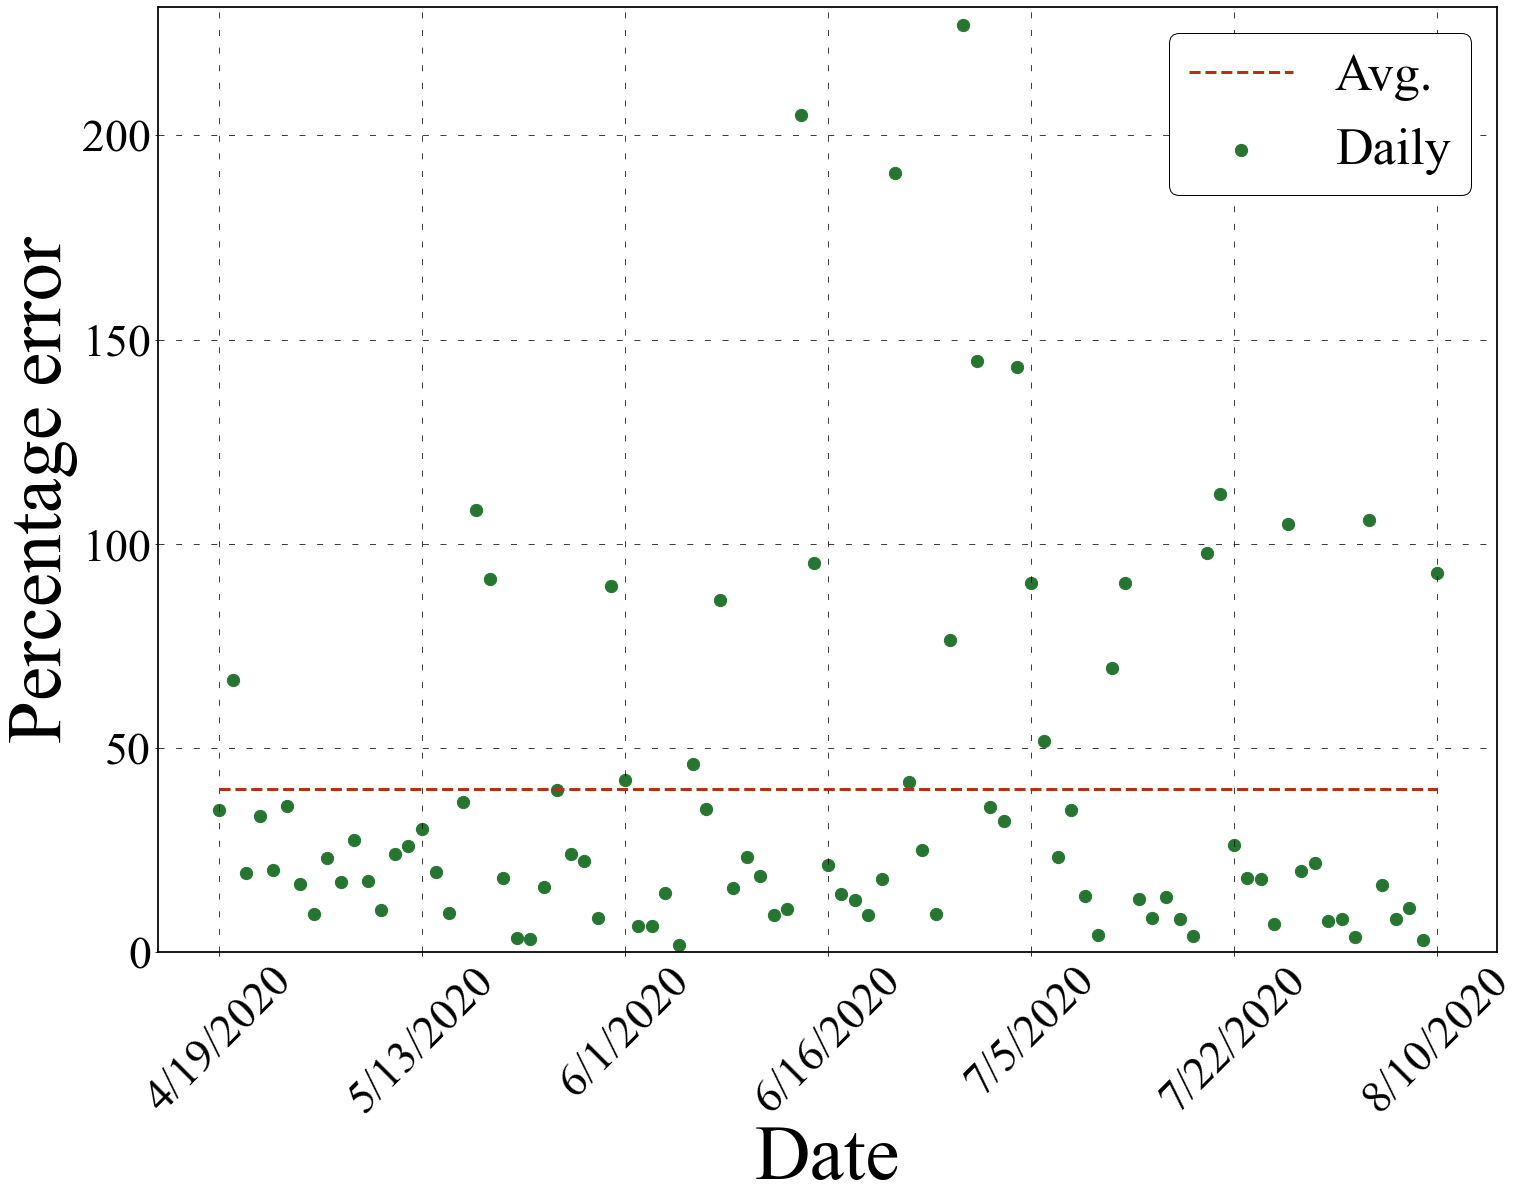

<Figure size 1728x1252.08 with 0 Axes>

In [210]:
plotGraph(errors('US','dead'), 'US', 'deaths','13.054')

In [12]:
def plotGraph2(df, country_name, req_type,avg):
#     df2 = df.set_index(pd.to_datetime(df.Date), drop=True)
    X = df.iloc[0:,1:2]
    Y = df.iloc[:,3:4]
    print(np.mean(X))
    X = [x[0] for x in X.values.tolist()]
    Y =[y[0] for y in Y.values.tolist()]
    y_mean = [np.mean(Y)]*len(X)
    print(y_mean)
    fig,ax = plt.subplots()

# Plot the data
    data_line = ax.scatter(X,Y,s=150,label='Daily', marker='o',color ='#267631')

# Plot the average line
    mean_line = ax.plot(X,y_mean, label='Avg.', linestyle='--', color ='#B63018',linewidth=3)

#     plt.axhline(y=avg, color='r', linestyle='-')
#     plt.scatter(x=X, y=Y, label="Daily", color ='blue' )
    x2 = []
    for i in range(0,len(X),15):
        x2.append(X[i])
    plt.xticks(np.arange(0, len(X), step=15),x2,fontname='Times new roman',fontsize='46', rotation = 45)
    plt.yticks(fontname='Times new roman',fontsize='46')
    print(df.One_day)
   
    ax.legend(loc='upper right', prop={"size":52}, fancybox= True, framealpha=1)
    #plt.title('Current and Predicted One Day, Two Days Cases of ' + country_name)
    picFileName = country_name + req_type +'2alleroors'+ '.pdf'
    ax.grid(b = True, which ='major', dashes=[8,15.5],color='black',linewidth=.75)
#     fig.savefig(picFileName,dpi=100, bbox_inches='tight')
#     plt.show()
    
#     fig1 = plt.gcf()
    plt.xlabel('Date', fontsize= 77)
# Set the y axis label of the current axis.
    plt.ylabel('Percentage error ', fontsize= 77)
    plt.rcParams["font.family"] = "times new roman"
    COLOR='black'
    plt.rcParams['text.color'] = COLOR
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams["axes.linewidth"]  = 1.75
    plt.rcParams["legend.edgecolor"] = 'black'
    plt.rcParams["axes.edgecolor"] = 'black'
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    plt.ylim(0,max(df.One_day)+(max(df.One_day))/50)
    
#     plt.rcParams['xtick.labelsize']= 50
#     plt.rcParams['ytick.labelsize']= 50
    plt.show()
    plt.draw()
    fig.savefig(picFileName, dpi=600, bbox_inches='tight')

40.0
6.0
180.0
58.0
44.0
24.0
89.0
194.0
109.0
79.0
52.0
92.0
77.0
7.0
19.0
113.0
23.0
98.0
4.0
84.0
3.0
73.0
251.0
147.0
65.0
193.0
121.0
161.0
272.0
343.0
329.0
351.0
366.0
156.0
79.0
179.0
102.0
809.0
375.0
488.0
494.0
759.0
781.0
164.0
530.0
216.0
272.0
405.0
193.0
108.0
8.0
436.0
19.0
3.0
284.0
615.0
285.0
42.0
763.0
146.0
205.0
560.0
3.0
291.0
51.0
68.0
50.0
484.0
78.0
364.0
305.0
205.0
332.0
93.0
244.0
905.0
174.0
550.0
463.0
174.0
462.0
129.0
411.0
263.0
20.0
433.0
64.0
370.0
800.0
301.0
325.0
250.0
469.0
129.0
313.0
112.0
308.0
28.0
245.0
497.0
188.0
49.0
314.0
77.0
573.0
1313.0
470.0
562.0
736.0
323.0
126.0
240.0
124.0
420.0
89.0
1.0
378.0
The mean of differences is :
258.88034188034186
counts:
24
length of values:
117
percentage:
79.48717948717949
Series([], dtype: float64)
[14.00666338845616, 14.00666338845616, 14.00666338845616, 14.00666338845616, 14.00666338845616, 14.00666338845616, 14.00666338845616, 14.00666338845616, 14.00666338845616, 14.00666338845616, 14.0066633884

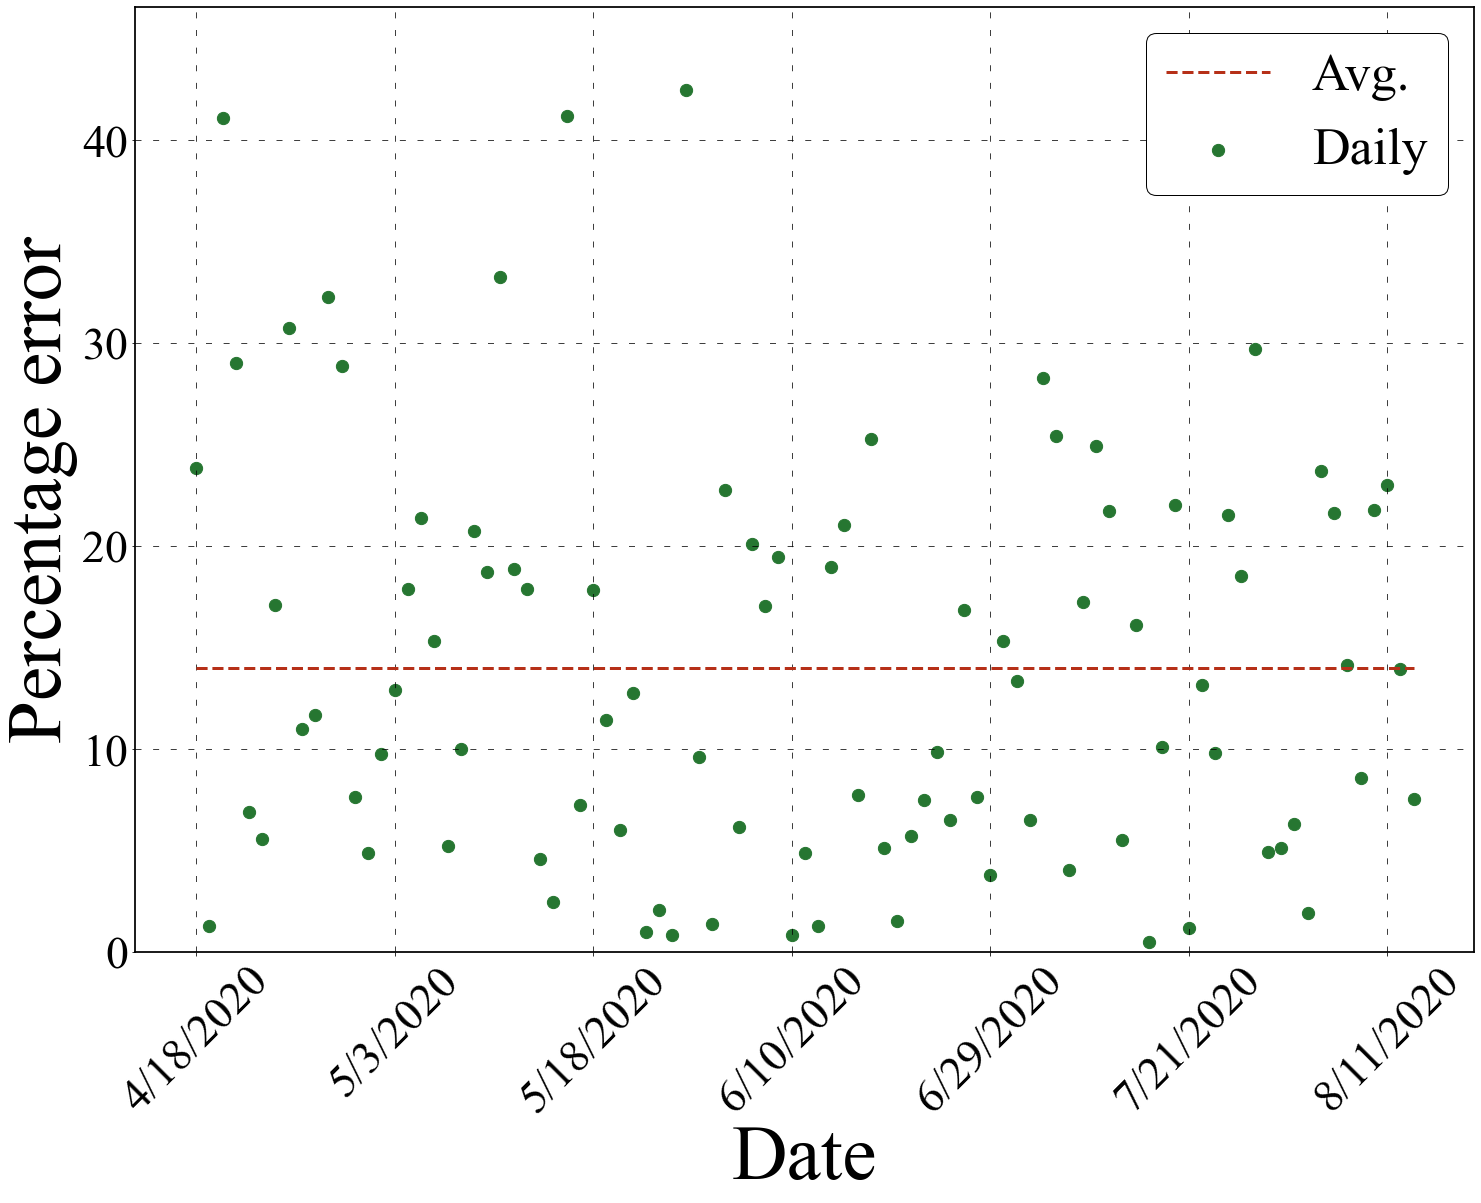

<Figure size 1728x1252.08 with 0 Axes>

In [186]:
plotGraph2(errors('BD','affected'), 'BD', 'Affected','13.054')

980.0
93.0
247.0
767.0
1176.0
272.0
1274.0
935.0
1443.0
661.0
1052.0
2487.0
117.0
172.0
2068.0
41.0
4321.0
1994.0
1959.0
1954.0
2529.0
257.0
5028.0
1105.0
4098.0
3906.0
5651.0
6719.0
2229.0
3177.0
1186.0
2295.0
4295.0
4821.0
4637.0
4275.0
5818.0
511.0
6346.0
16865.0
4811.0
17338.0
303.0
2292.0
3850.0
8163.0
3258.0
16437.0
822.0
2501.0
4430.0
4278.0
4594.0
3537.0
14271.0
2730.0
9423.0
32006.0
39009.0
7367.0
16307.0
3289.0
3242.0
7377.0
8167.0
8217.0
6424.0
9794.0
12866.0
1393.0
5882.0
4300.0
11872.0
5822.0
25076.0
734.0
1952.0
2429.0
6025.0
14192.0
4545.0
21571.0
1933.0
5479.0
11226.0
5645.0
5003.0
3272.0
20751.0
26852.0
7899.0
8814.0
26569.0
1294.0
17532.0
28258.0
11237.0
5454.0
6991.0
19592.0
9159.0
34962.0
5549.0
4013.0
2909.0
260.0
26960.0
962.0
33107.0
4936.0
The mean of differences is :
7357.045454545455
counts:
20
length of values:
110
percentage:
81.81818181818183
Series([], dtype: float64)
[42.468124654583484, 42.468124654583484, 42.468124654583484, 42.468124654583484, 42.46812

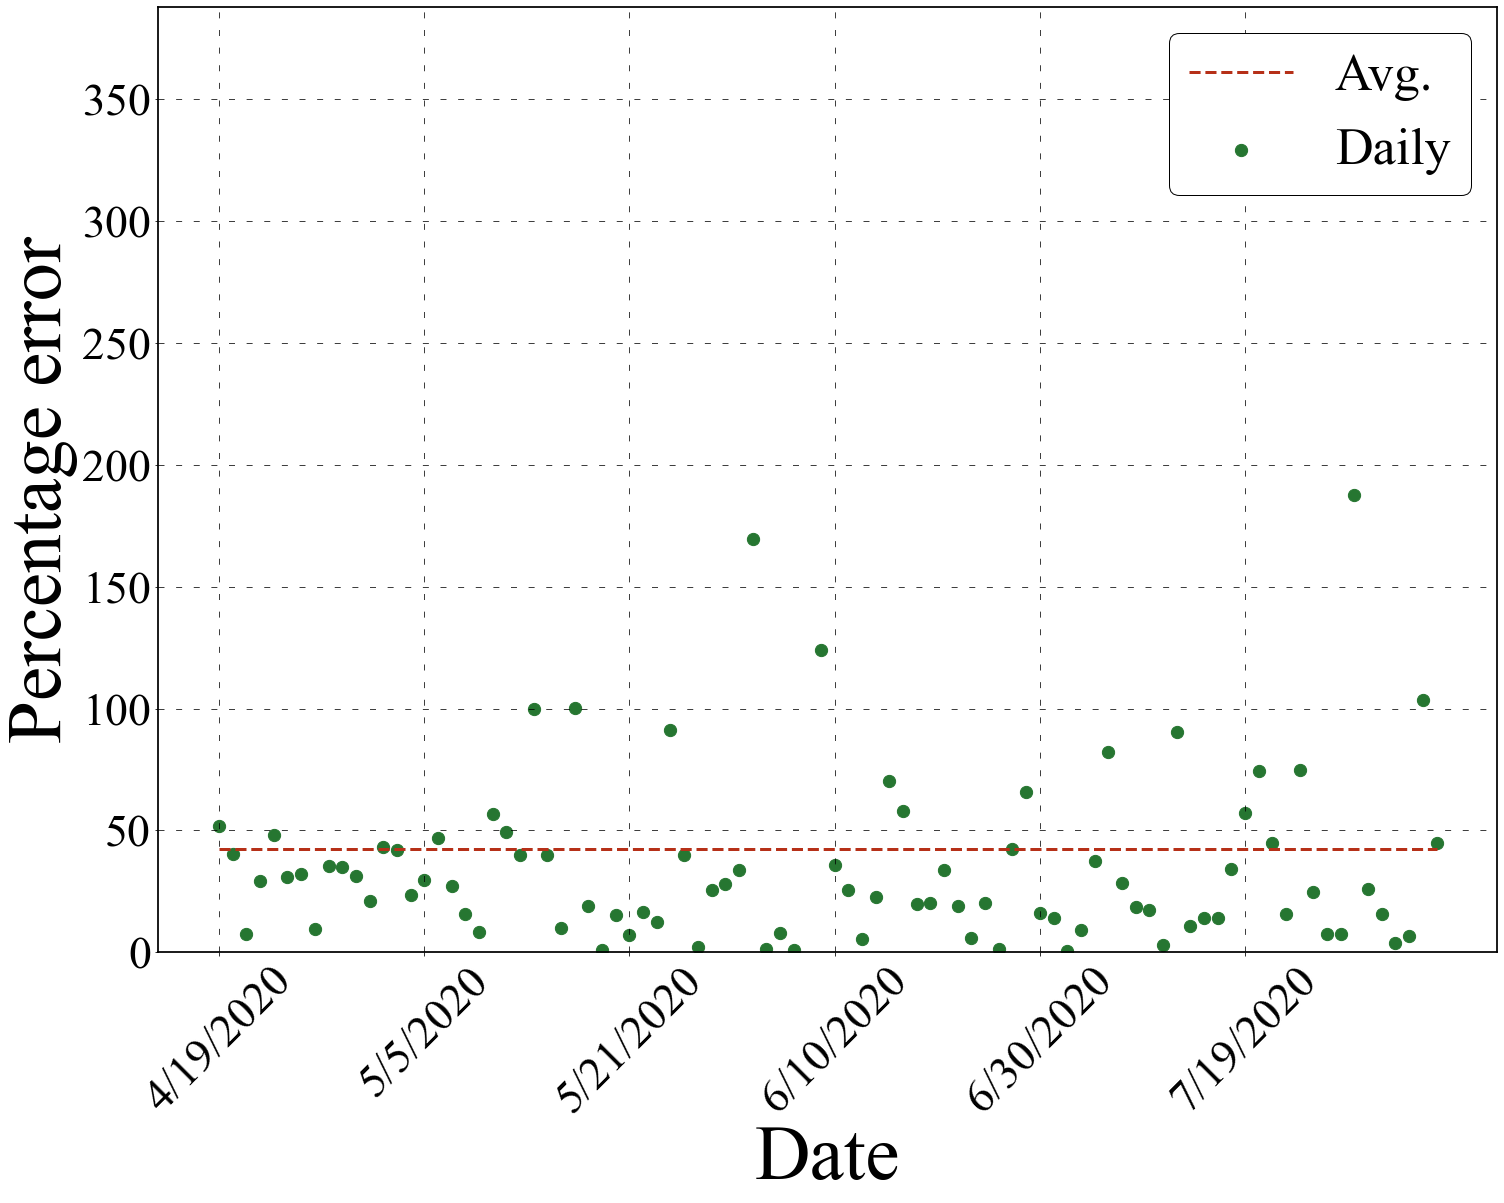

<Figure size 1728x1252.08 with 0 Axes>

In [187]:
plotGraph2(errors('BR','affected'), 'BR', 'Affected','13.054')

523.0
352.0
0.0
251.0
379.0
299.0
383.0
1119.0
927.0
312.0
135.0
63.0
672.0
31.0
364.0
1126.0
969.0
624.0
223.0
20.0
231.0
1240.0
746.0
83.0
239.0
179.0
155.0
1077.0
186.0
420.0
1517.0
594.0
645.0
370.0
61.0
215.0
571.0
1450.0
7.0
805.0
231.0
446.0
1021.0
1060.0
812.0
256.0
418.0
967.0
426.0
2422.0
1776.0
9781.0
20515.0
9494.0
471.0
1262.0
307.0
1907.0
705.0
930.0
887.0
572.0
102.0
1035.0
954.0
374.0
1256.0
1354.0
447.0
937.0
119.0
519.0
1743.0
1868.0
2079.0
602.0
1997.0
502.0
2126.0
1627.0
608.0
1618.0
234.0
931.0
3247.0
2299.0
277.0
3445.0
1728.0
3293.0
608.0
7980.0
3590.0
394.0
305.0
1370.0
5524.0
41374.0
47211.0
2489.0
8459.0
6507.0
1763.0
922.0
459.0
3773.0
6256.0
1001.0
2862.0
2335.0
8463.0
7362.0
6036.0
2446.0
The mean of differences is :
2482.7982456140353
counts:
13
length of values:
114
percentage:
88.59649122807018
Series([], dtype: float64)
[12.438759124466559, 12.438759124466559, 12.438759124466559, 12.438759124466559, 12.438759124466559, 12.438759124466559, 12.43875912446

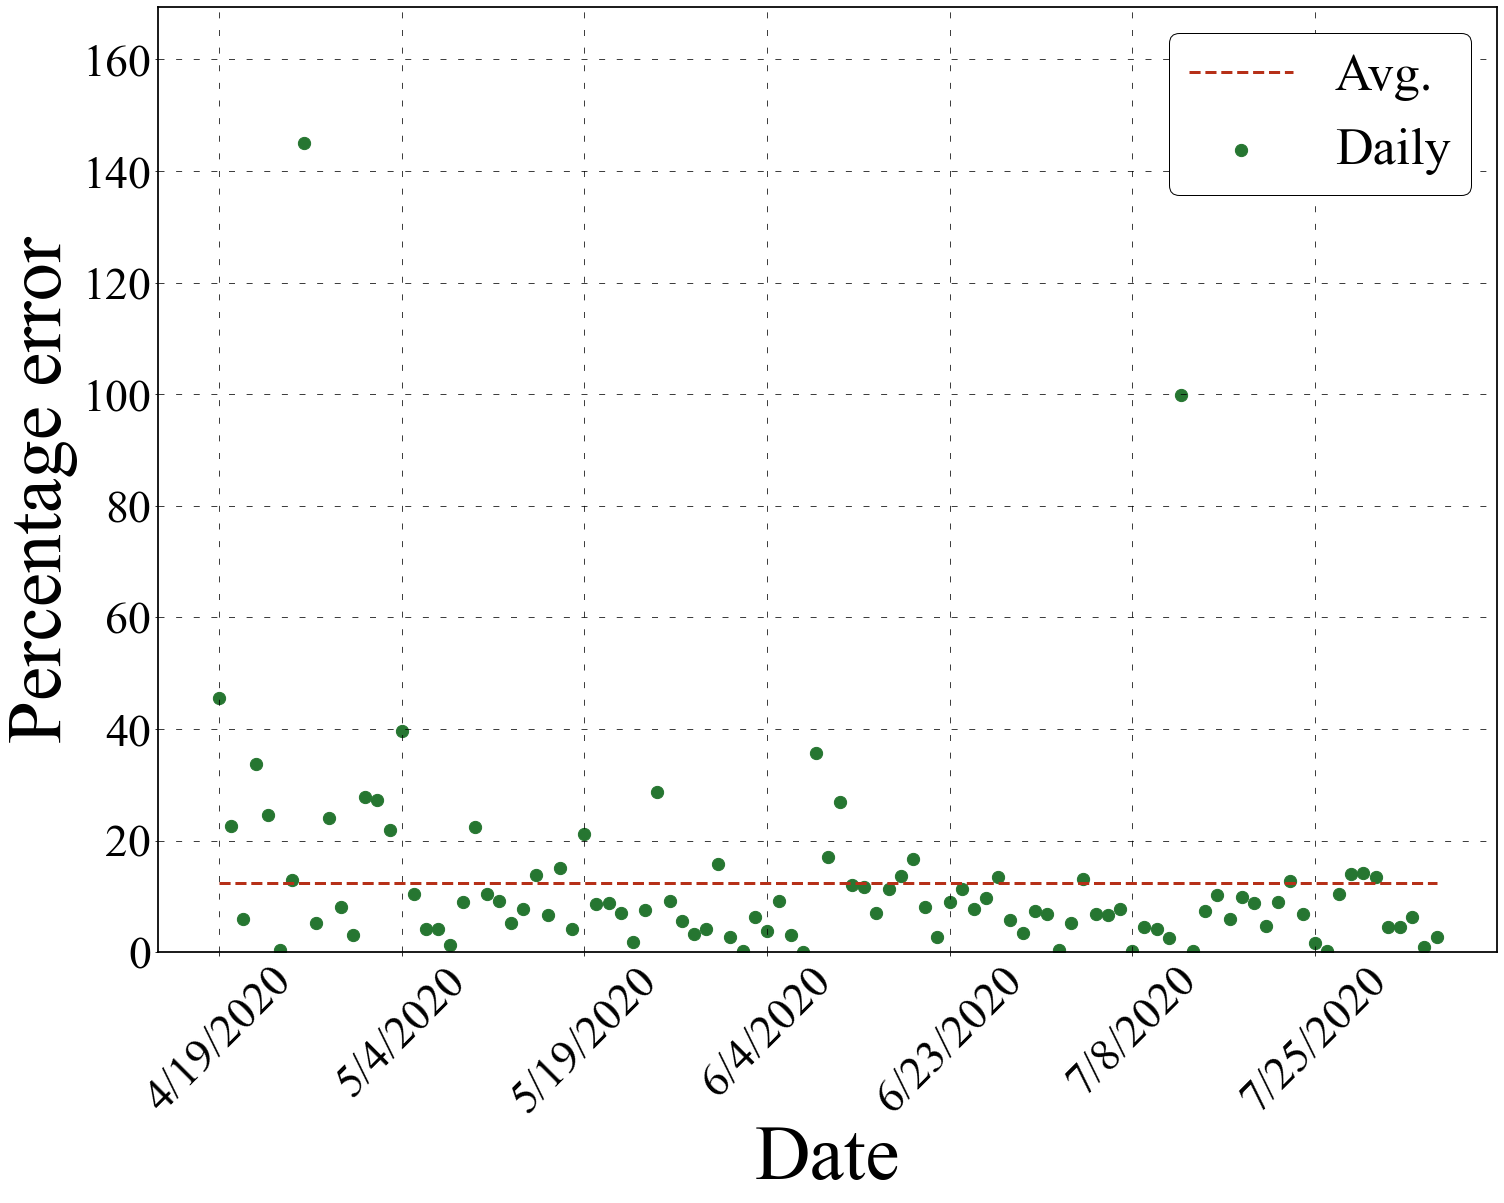

<Figure size 1728x1252.08 with 0 Axes>

In [188]:
plotGraph2(errors('IN','affected'), 'IN', 'Affected','13.054')

125.0
31.0
49.0
3.0
103.0
164.0
138.0
34.0
19.0
177.0
136.0
39.0
90.0
23.0
204.0
174.0
247.0
100.0
357.0
195.0
71.0
27.0
146.0
300.0
202.0
477.0
150.0
294.0
345.0
49.0
488.0
183.0
235.0
46.0
81.0
442.0
154.0
236.0
293.0
178.0
561.0
537.0
234.0
463.0
138.0
17.0
440.0
688.0
617.0
95.0
321.0
52.0
84.0
207.0
151.0
61.0
42.0
23.0
114.0
49.0
16.0
19.0
293.0
46.0
205.0
128.0
86.0
64.0
33.0
172.0
33.0
47.0
79.0
92.0
103.0
86.0
117.0
111.0
53.0
24.0
54.0
612.0
183.0
135.0
211.0
163.0
172.0
133.0
112.0
121.0
213.0
16.0
232.0
211.0
39.0
35.0
132.0
173.0
17.0
101.0
233.0
31.0
15.0
53.0
126.0
137.0
87.0
153.0
54.0
63.0
184.0
325.0
105.0
112.0
213.0
165.0
115.0
The mean of differences is :
160.18803418803418
counts:
18
length of values:
117
percentage:
84.61538461538461
Series([], dtype: float64)
[9.67356592534621, 9.67356592534621, 9.67356592534621, 9.67356592534621, 9.67356592534621, 9.67356592534621, 9.67356592534621, 9.67356592534621, 9.67356592534621, 9.67356592534621, 9.67356592534621, 9.67356

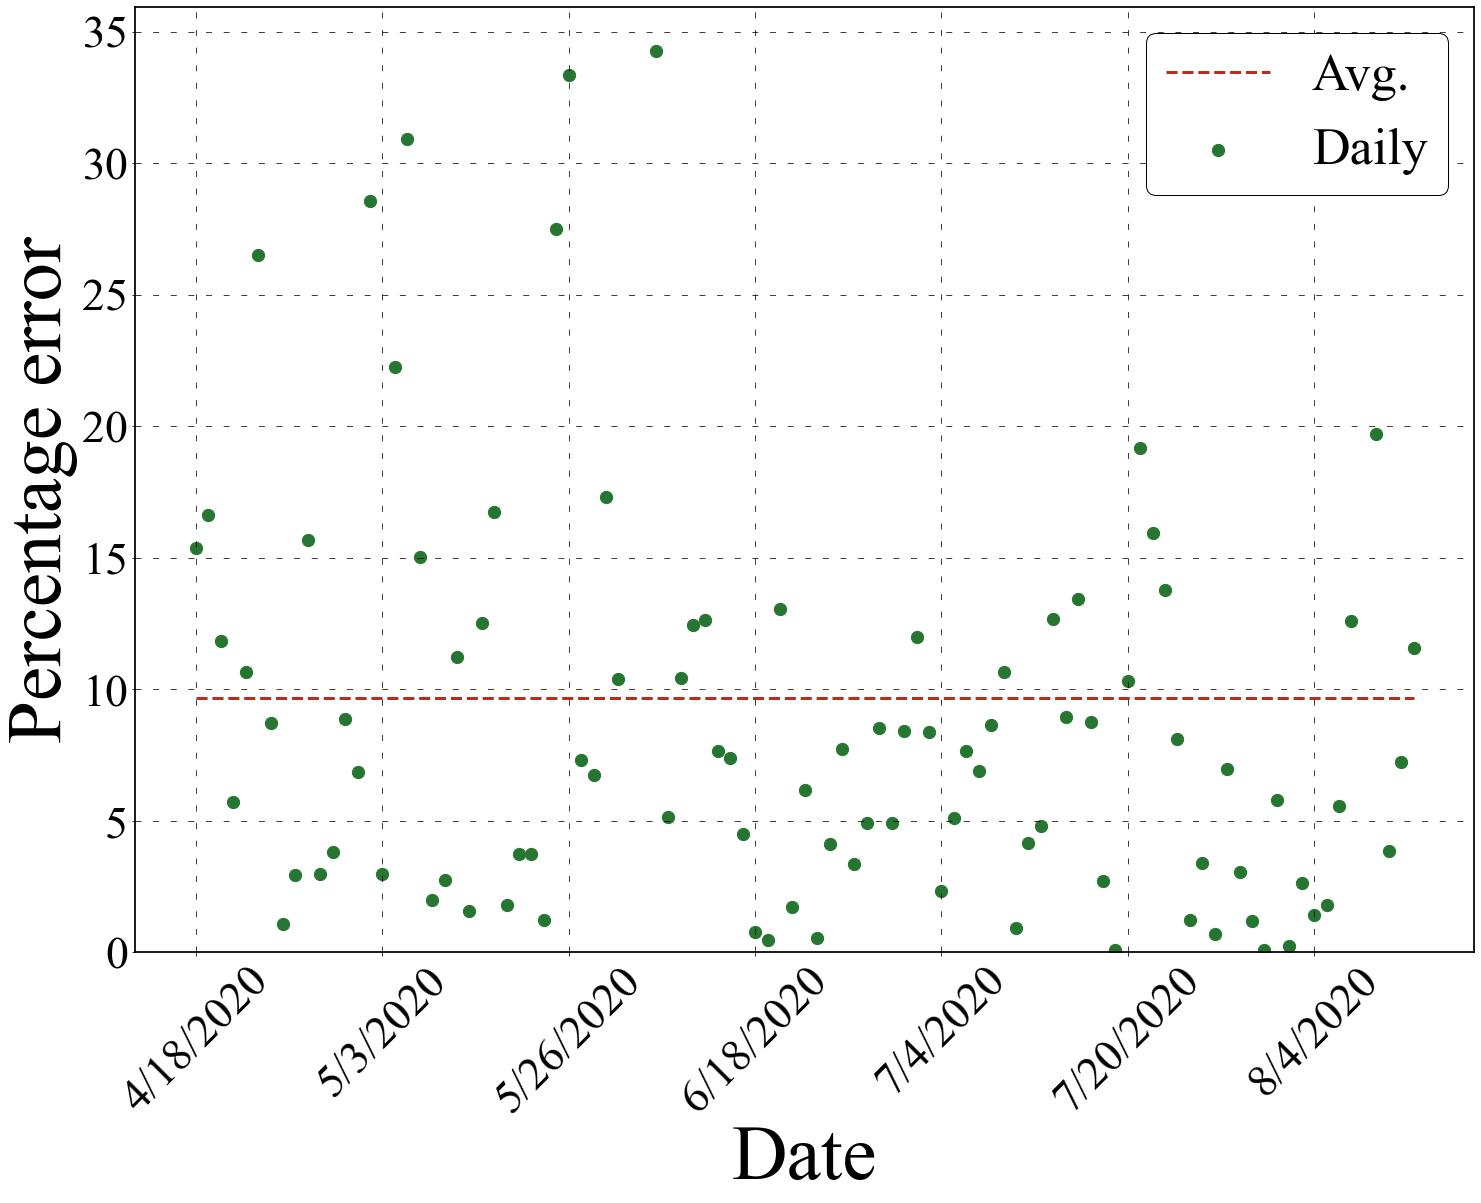

<Figure size 1728x1252.08 with 0 Axes>

In [13]:
plotGraph2(errors('IR','affected'), 'IR', 'Affected','13.054')

128.0
44.0
653.0
764.0
1261.0
360.0
893.0
269.0
118.0
371.0
176.0
378.0
90.0
166.0
34.0
51.0
314.0
489.0
373.0
76.0
32.0
376.0
257.0
692.0
135.0
547.0
28.0
325.0
37.0
339.0
299.0
465.0
725.0
13.0
369.0
844.0
970.0
8.0
86.0
150.0
342.0
267.0
381.0
1120.0
21.0
530.0
96.0
753.0
109.0
485.0
1200.0
684.0
93.0
432.0
1728.0
653.0
720.0
1172.0
331.0
732.0
632.0
313.0
626.0
766.0
1711.0
851.0
667.0
663.0
1031.0
360.0
245.0
1627.0
249.0
1060.0
1.0
174.0
2231.0
219.0
1356.0
737.0
285.0
389.0
797.0
1612.0
203.0
2366.0
902.0
257.0
851.0
358.0
2304.0
139.0
1687.0
840.0
2419.0
865.0
822.0
1271.0
507.0
2235.0
1456.0
1978.0
728.0
1098.0
4703.0
86.0
1381.0
9.0
451.0
127.0
222.0
2119.0
1182.0
1128.0
828.0
1513.0
The mean of differences is :
699.9224137931035
counts:
22
length of values:
116
percentage:
81.03448275862068
Series([], dtype: float64)
[24.913446188770386, 24.913446188770386, 24.913446188770386, 24.913446188770386, 24.913446188770386, 24.913446188770386, 24.913446188770386, 24.913446188770386,

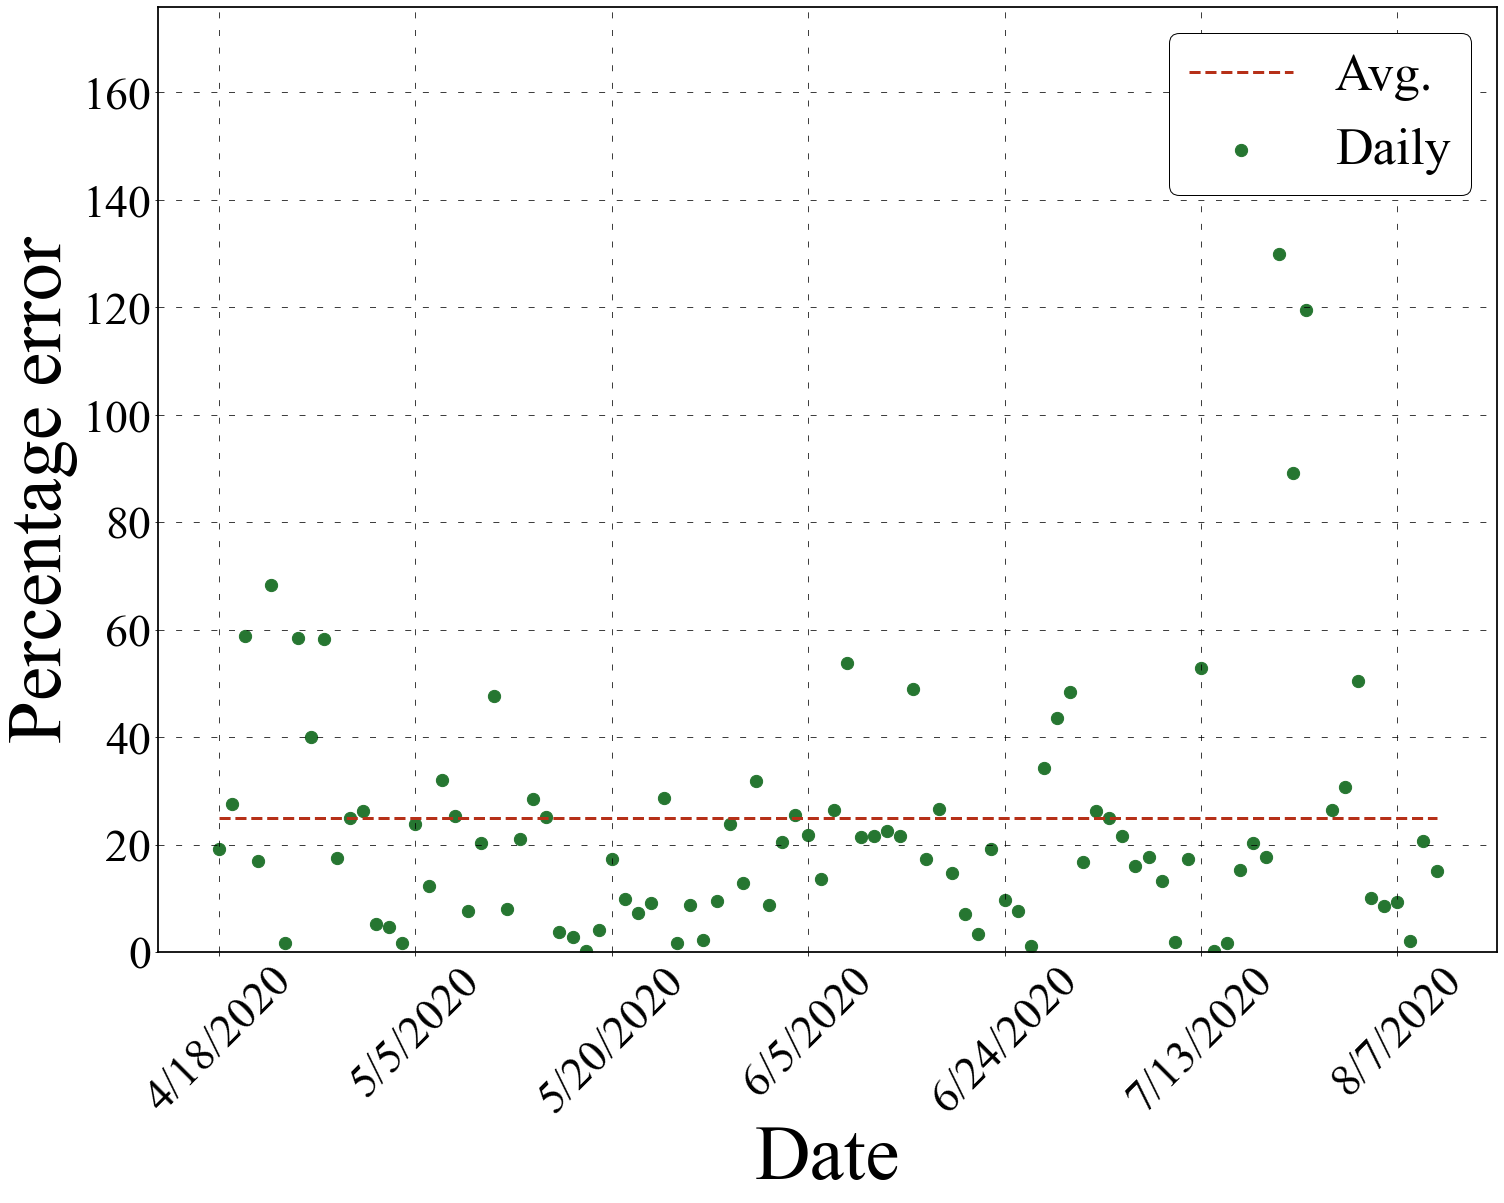

<Figure size 1728x1252.08 with 0 Axes>

In [14]:
plotGraph2(errors('MX','affected'), 'MX', 'Affected','13.054')

1275.0
418.0
0.0
406.0
462.0
1075.0
117.0
395.0
349.0
299.0
570.0
1258.0
834.0
1690.0
1010.0
52.0
479.0
457.0
672.0
532.0
118.0
195.0
644.0
757.0
871.0
54.0
624.0
1398.0
509.0
783.0
337.0
499.0
85.0
45.0
540.0
488.0
31.0
577.0
33.0
201.0
380.0
316.0
783.0
373.0
329.0
294.0
105.0
128.0
125.0
1.0
383.0
194.0
384.0
184.0
264.0
112.0
592.0
24.0
417.0
52.0
199.0
101.0
153.0
131.0
173.0
248.0
377.0
55.0
59.0
101.0
0.0
133.0
202.0
42.0
87.0
96.0
150.0
206.0
171.0
43.0
132.0
37.0
1.0
76.0
271.0
170.0
5.0
26.0
175.0
118.0
195.0
73.0
22.0
20.0
51.0
54.0
92.0
134.0
227.0
69.0
35.0
16.0
39.0
42.0
23.0
243.0
65.0
53.0
48.0
6.0
30.0
74.0
189.0
162.0
37.0
The mean of differences is :
281.0086956521739
counts:
23
length of values:
115
percentage:
80.0
Series([], dtype: float64)
[5.965354333749496, 5.965354333749496, 5.965354333749496, 5.965354333749496, 5.965354333749496, 5.965354333749496, 5.965354333749496, 5.965354333749496, 5.965354333749496, 5.965354333749496, 5.965354333749496, 5.965354333749496

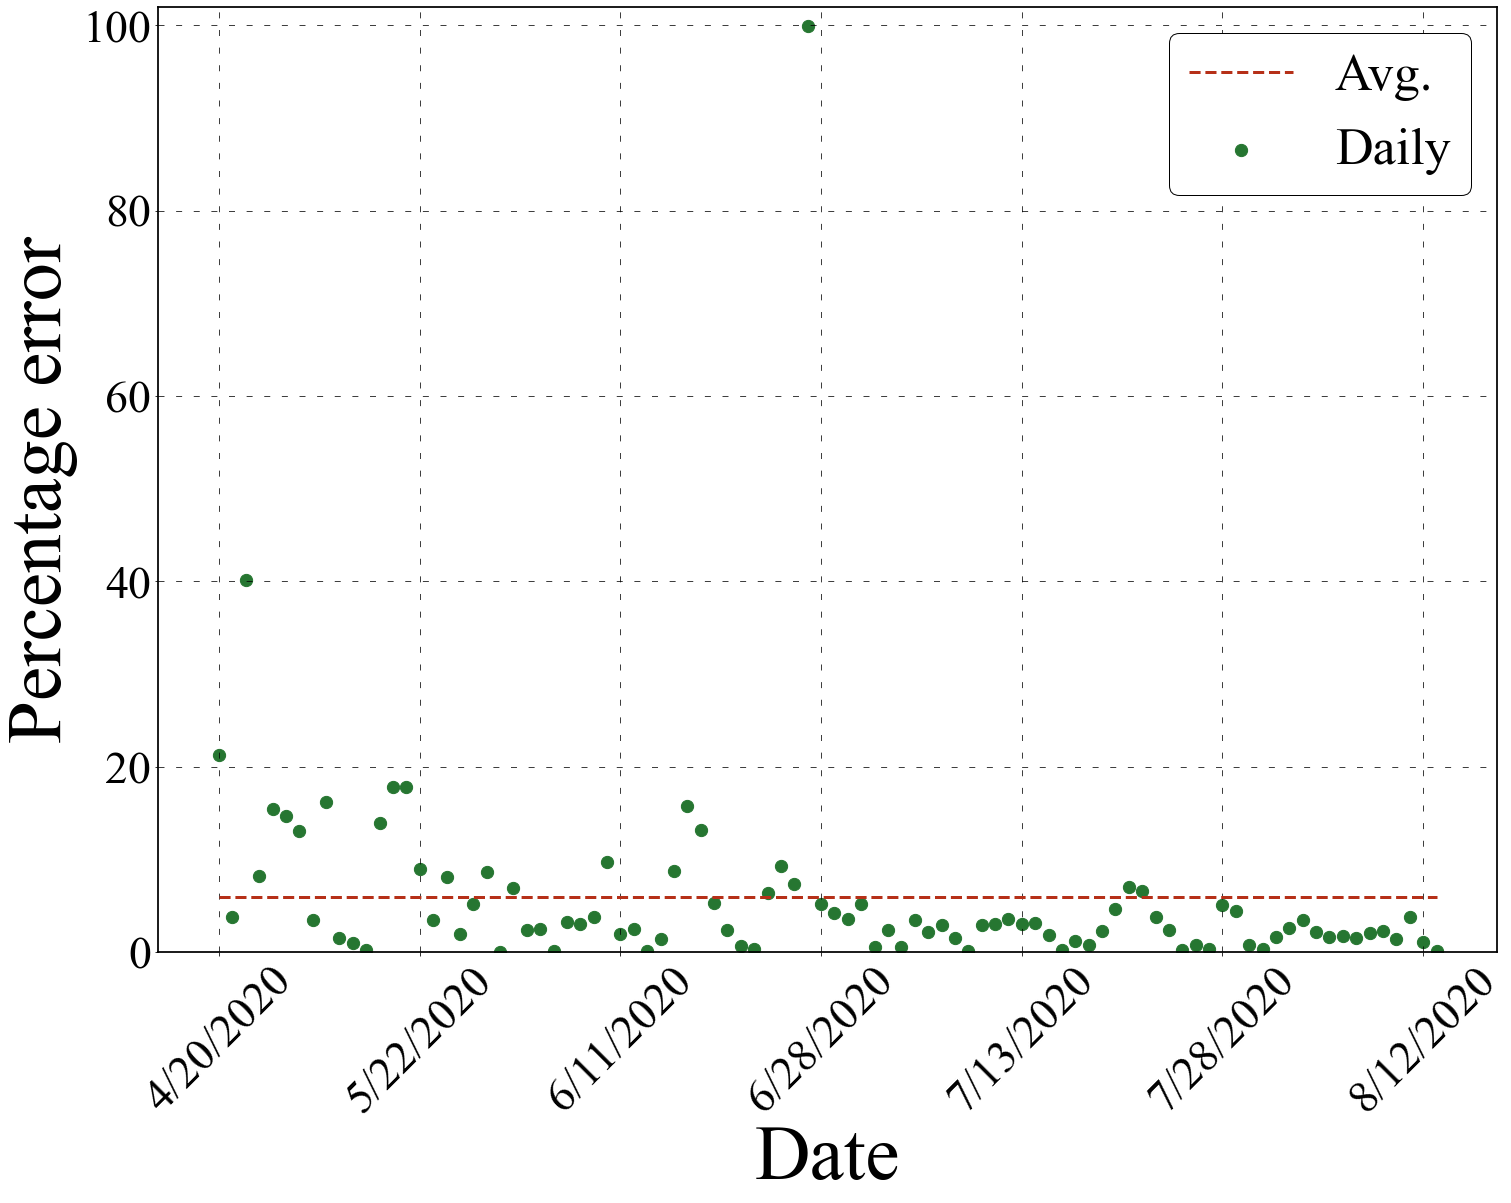

<Figure size 1728x1252.08 with 0 Axes>

In [191]:
plotGraph2(errors('RU','affected'), 'RU', 'Affected','13.054')

127.0
18.0
23.0
5.0
148.0
51.0
126.0
106.0
44.0
151.0
57.0
7.0
81.0
62.0
10.0
85.0
116.0
188.0
239.0
138.0
70.0
42.0
61.0
26.0
59.0
120.0
46.0
329.0
242.0
151.0
36.0
331.0
146.0
230.0
186.0
383.0
1024.0
207.0
371.0
110.0
11.0
42.0
219.0
258.0
1554.0
625.0
103.0
227.0
282.0
482.0
318.0
717.0
212.0
450.0
493.0
807.0
694.0
1277.0
600.0
347.0
1141.0
345.0
333.0
230.0
1170.0
891.0
364.0
995.0
876.0
204.0
815.0
1179.0
604.0
335.0
1790.0
2080.0
198.0
1163.0
1324.0
4864.0
1326.0
1149.0
1439.0
504.0
1058.0
2261.0
415.0
201.0
88.0
164.0
4149.0
1130.0
4980.0
46.0
840.0
1740.0
971.0
4137.0
136.0
4130.0
316.0
32.0
907.0
1912.0
2818.0
921.0
4103.0
252.0
1015.0
420.0
1041.0
2932.0
1228.0
299.0
1136.0
The mean of differences is :
754.4956521739131
counts:
18
length of values:
115
percentage:
84.34782608695653
Series([], dtype: float64)
[24.34682407224884, 24.34682407224884, 24.34682407224884, 24.34682407224884, 24.34682407224884, 24.34682407224884, 24.34682407224884, 24.34682407224884, 24.346824072248

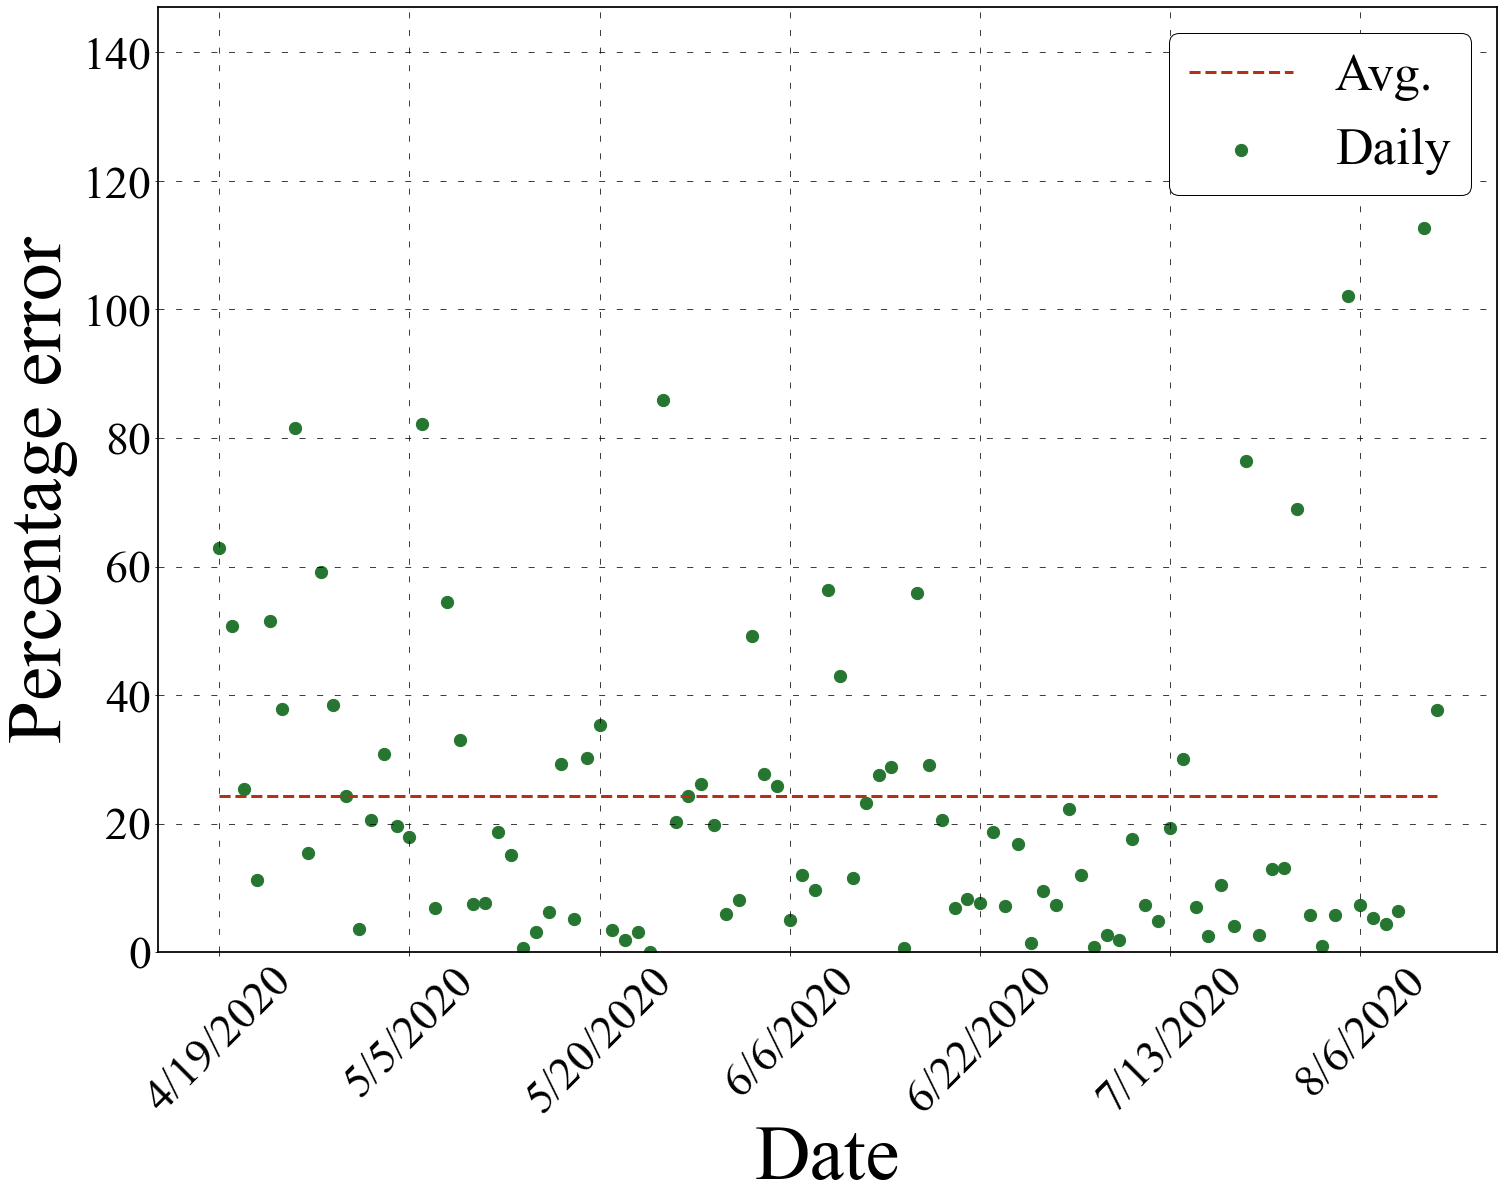

<Figure size 1728x1252.08 with 0 Axes>

In [192]:
plotGraph2(errors('ZA','affected'), 'ZA', 'Affected','13.054')

5602.0
12571.0
0.0
14252.0
15321.0
15339.0
550.0
32576.0
9200.0
34026.0
4383.0
3350.0
6727.0
32950.0
3577.0
3166.0
1641.0
276.0
4168.0
1514.0
1285.0
5911.0
1089.0
2874.0
465.0
6338.0
2318.0
54.0
6059.0
2614.0
1291.0
3025.0
2009.0
1504.0
2115.0
2619.0
445.0
348.0
4314.0
1689.0
120.0
4139.0
1181.0
387.0
1102.0
1441.0
3580.0
2039.0
379.0
5052.0
5448.0
15432.0
4351.0
2513.0
144.0
6008.0
436.0
3737.0
1854.0
2203.0
2147.0
2631.0
6369.0
4841.0
3708.0
381.0
5633.0
5283.0
2658.0
3752.0
2741.0
3180.0
5889.0
1636.0
187.0
6821.0
3916.0
4246.0
15068.0
1420.0
4646.0
3380.0
5275.0
2335.0
903.0
9303.0
1144.0
10982.0
5697.0
7860.0
1851.0
5097.0
7784.0
7161.0
3032.0
5052.0
8225.0
10537.0
1383.0
5324.0
9116.0
3157.0
596.0
8617.0
10895.0
2143.0
12172.0
4730.0
6882.0
1519.0
1999.0
9239.0
2601.0
2728.0
The mean of differences is :
5061.166666666667
counts:
18
length of values:
114
percentage:
84.21052631578947
Series([], dtype: float64)
[16.115021211915728, 16.115021211915728, 16.115021211915728, 16.1150212

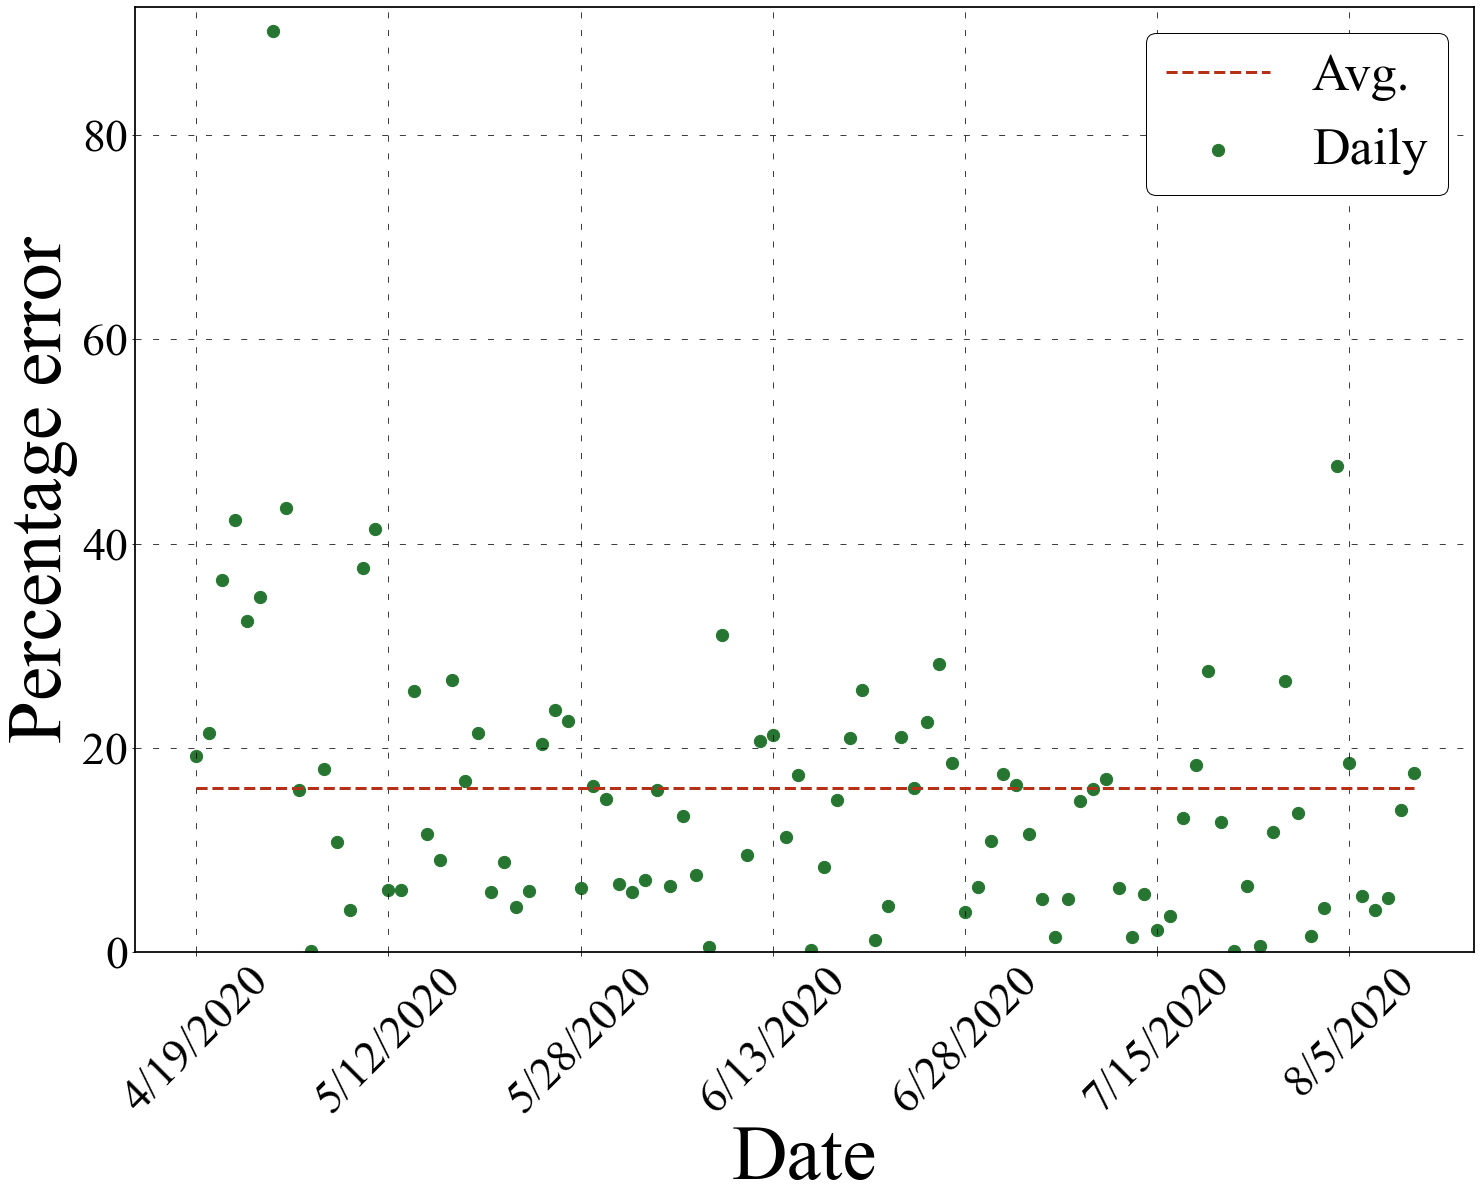

<Figure size 1728x1252.08 with 0 Axes>

In [193]:
plotGraph2(errors('US','affected'), 'US', 'Affected','13.054')

Series([], dtype: float64)
[25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.06427262146336, 25.

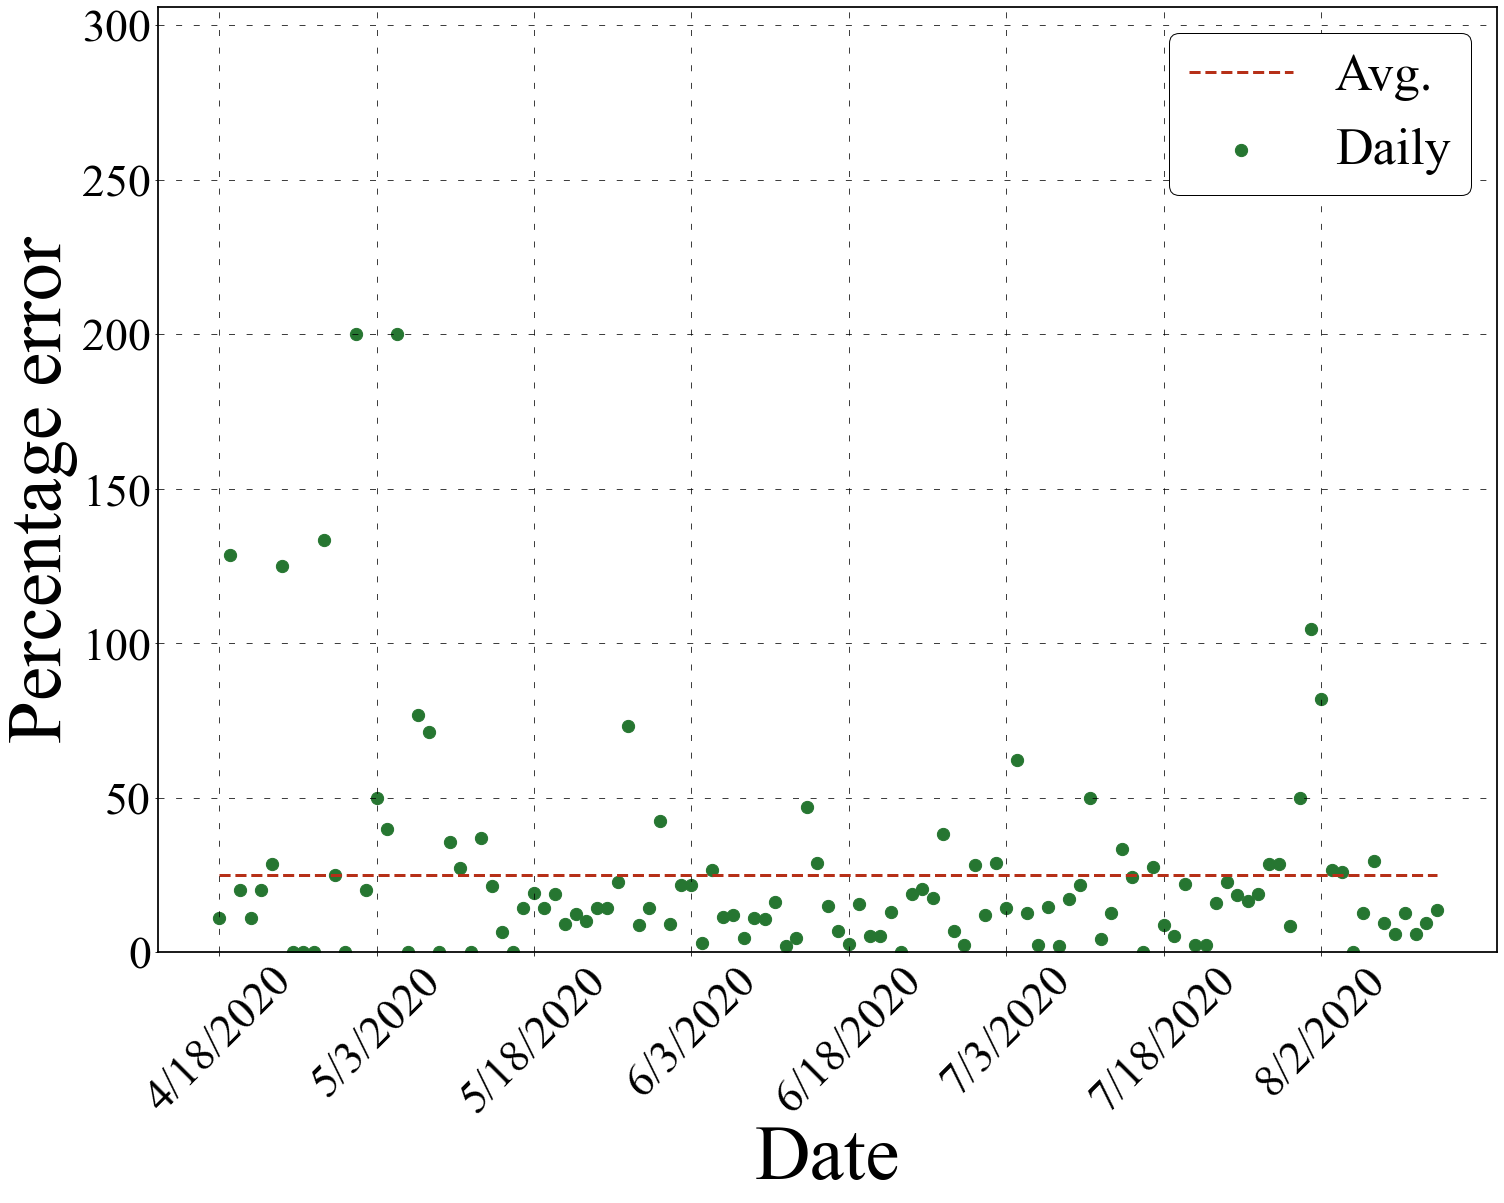

<Figure size 1728x1252.08 with 0 Axes>

In [48]:
plotGraph2(errors('BD','dead'), 'BD', 'deaths','13.054')

105.0
17.0
29.0
29.0
242.0
52.0
20.0
36.0
163.0
50.0
63.0
87.0
57.0
59.0
26.0
255.0
79.0
48.0
225.0
188.0
172.0
63.0
249.0
20.0
204.0
263.0
244.0
279.0
395.0
254.0
312.0
187.0
36.0
158.0
232.0
47.0
70.0
32.0
168.0
476.0
143.0
639.0
87.0
124.0
569.0
379.0
154.0
593.0
2.0
35.0
330.0
17.0
280.0
15.0
655.0
13.0
31.0
32.0
184.0
407.0
65.0
694.0
189.0
44.0
151.0
119.0
557.0
140.0
588.0
242.0
214.0
161.0
489.0
18.0
634.0
31.0
3.0
6.0
143.0
440.0
102.0
567.0
67.0
89.0
159.0
242.0
205.0
84.0
735.0
83.0
27.0
155.0
55.0
656.0
59.0
307.0
674.0
466.0
83.0
124.0
547.0
20.0
593.0
283.0
200.0
158.0
174.0
333.0
131.0
472.0
87.0
The mean of differences is :
209.4144144144144
counts:
22
length of values:
111
percentage:
80.18018018018019
Series([], dtype: float64)
[33.47920444963934, 33.47920444963934, 33.47920444963934, 33.47920444963934, 33.47920444963934, 33.47920444963934, 33.47920444963934, 33.47920444963934, 33.47920444963934, 33.47920444963934, 33.47920444963934, 33.47920444963934, 33.479204449639

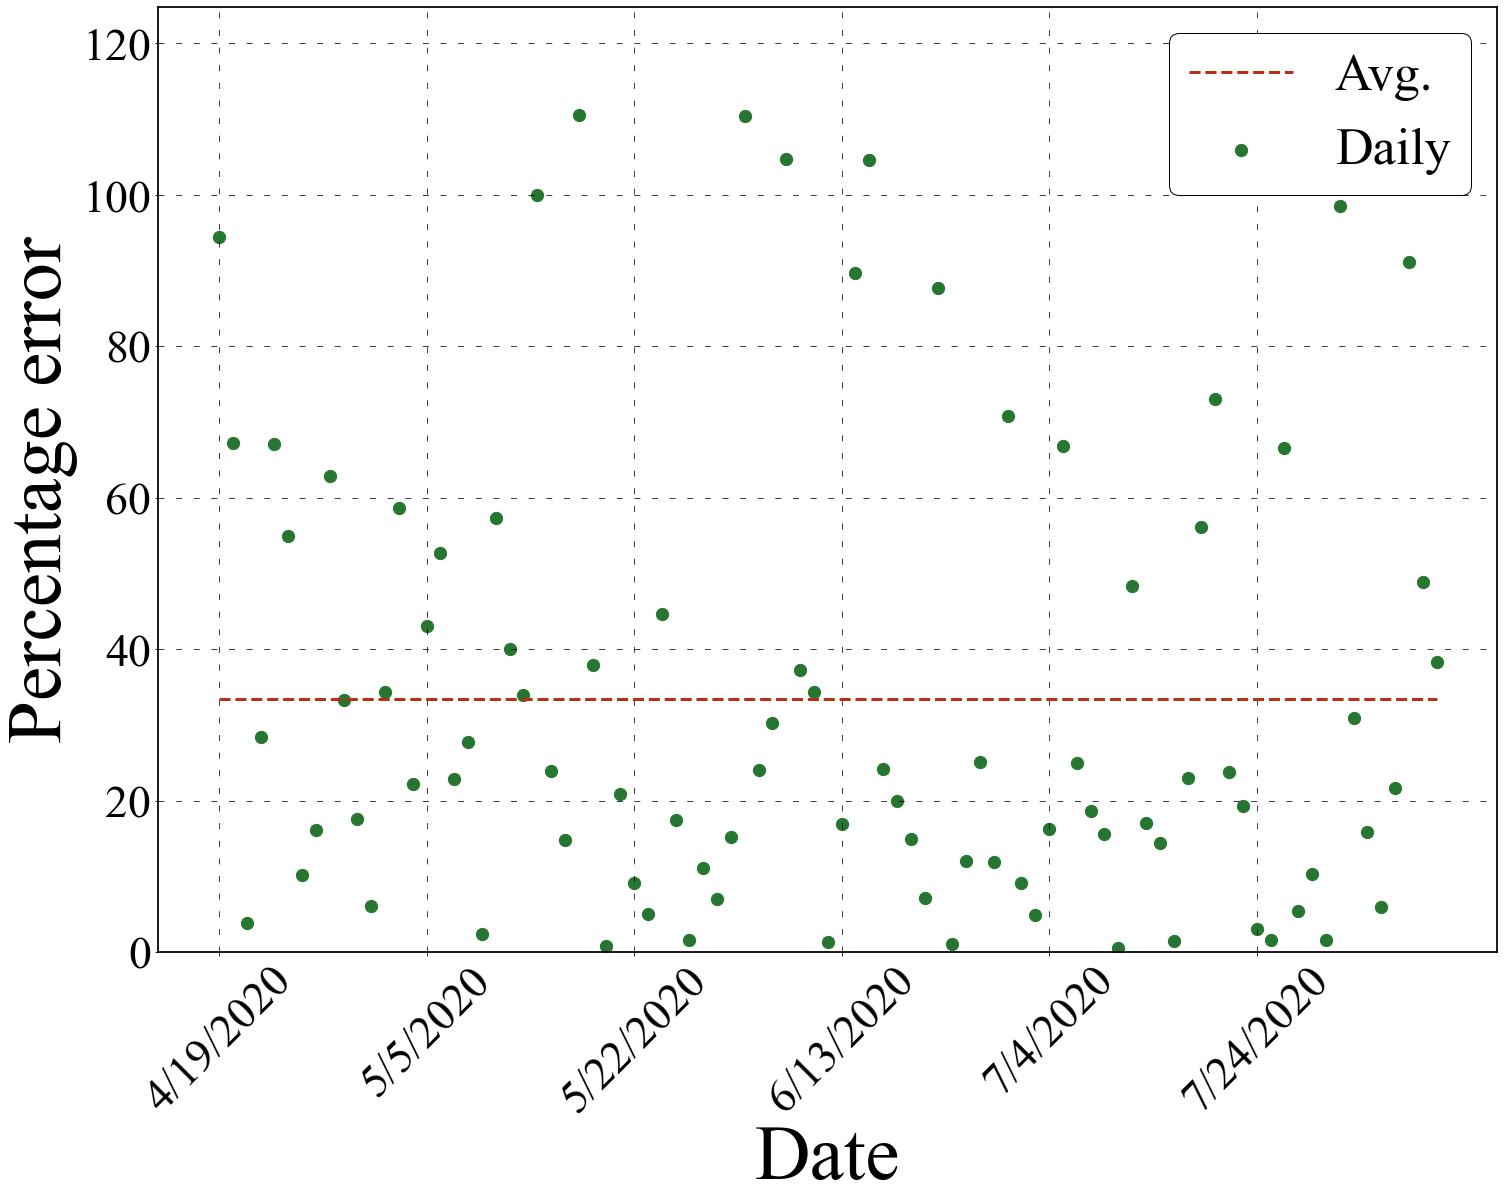

<Figure size 1728x1252.08 with 0 Axes>

In [194]:
plotGraph2(errors('BR','dead'), 'BR', 'deaths','13.054')

23.0
44.0
42.0
36.0
232.0
46.0
60.0
68.0
1.0
52.0
28.0
36.0
14.0
24.0
4.0
24.0
119.0
39.0
60.0
58.0
6.0
81.0
4.0
245.0
59.0
37.0
33.0
12.0
146.0
23.0
179.0
90.0
4.0
59.0
289.0
49.0
262.0
38.0
16.0
76.0
7.0
213.0
86.0
233.0
622.0
276.0
191.0
284.0
153.0
166.0
242.0
112.0
121.0
83.0
80.0
155.0
170.0
291.0
40.0
103.0
20.0
260.0
657.0
285.0
34.0
154.0
211.0
17.0
117.0
335.0
206.0
175.0
93.0
62.0
25.0
131.0
250.0
207.0
415.0
113.0
52.0
65.0
126.0
263.0
209.0
351.0
257.0
89.0
68.0
158.0
282.0
5.0
614.0
125.0
72.0
19.0
298.0
693.0
512.0
369.0
154.0
49.0
96.0
510.0
8.0
591.0
28.0
10.0
25.0
99.0
403.0
413.0
221.0
189.0
110.0
The mean of differences is :
153.44347826086957
counts:
24
length of values:
115
percentage:
79.13043478260869
Series([], dtype: float64)
[44.58781557605763, 44.58781557605763, 44.58781557605763, 44.58781557605763, 44.58781557605763, 44.58781557605763, 44.58781557605763, 44.58781557605763, 44.58781557605763, 44.58781557605763, 44.58781557605763, 44.58781557605763, 44.587815

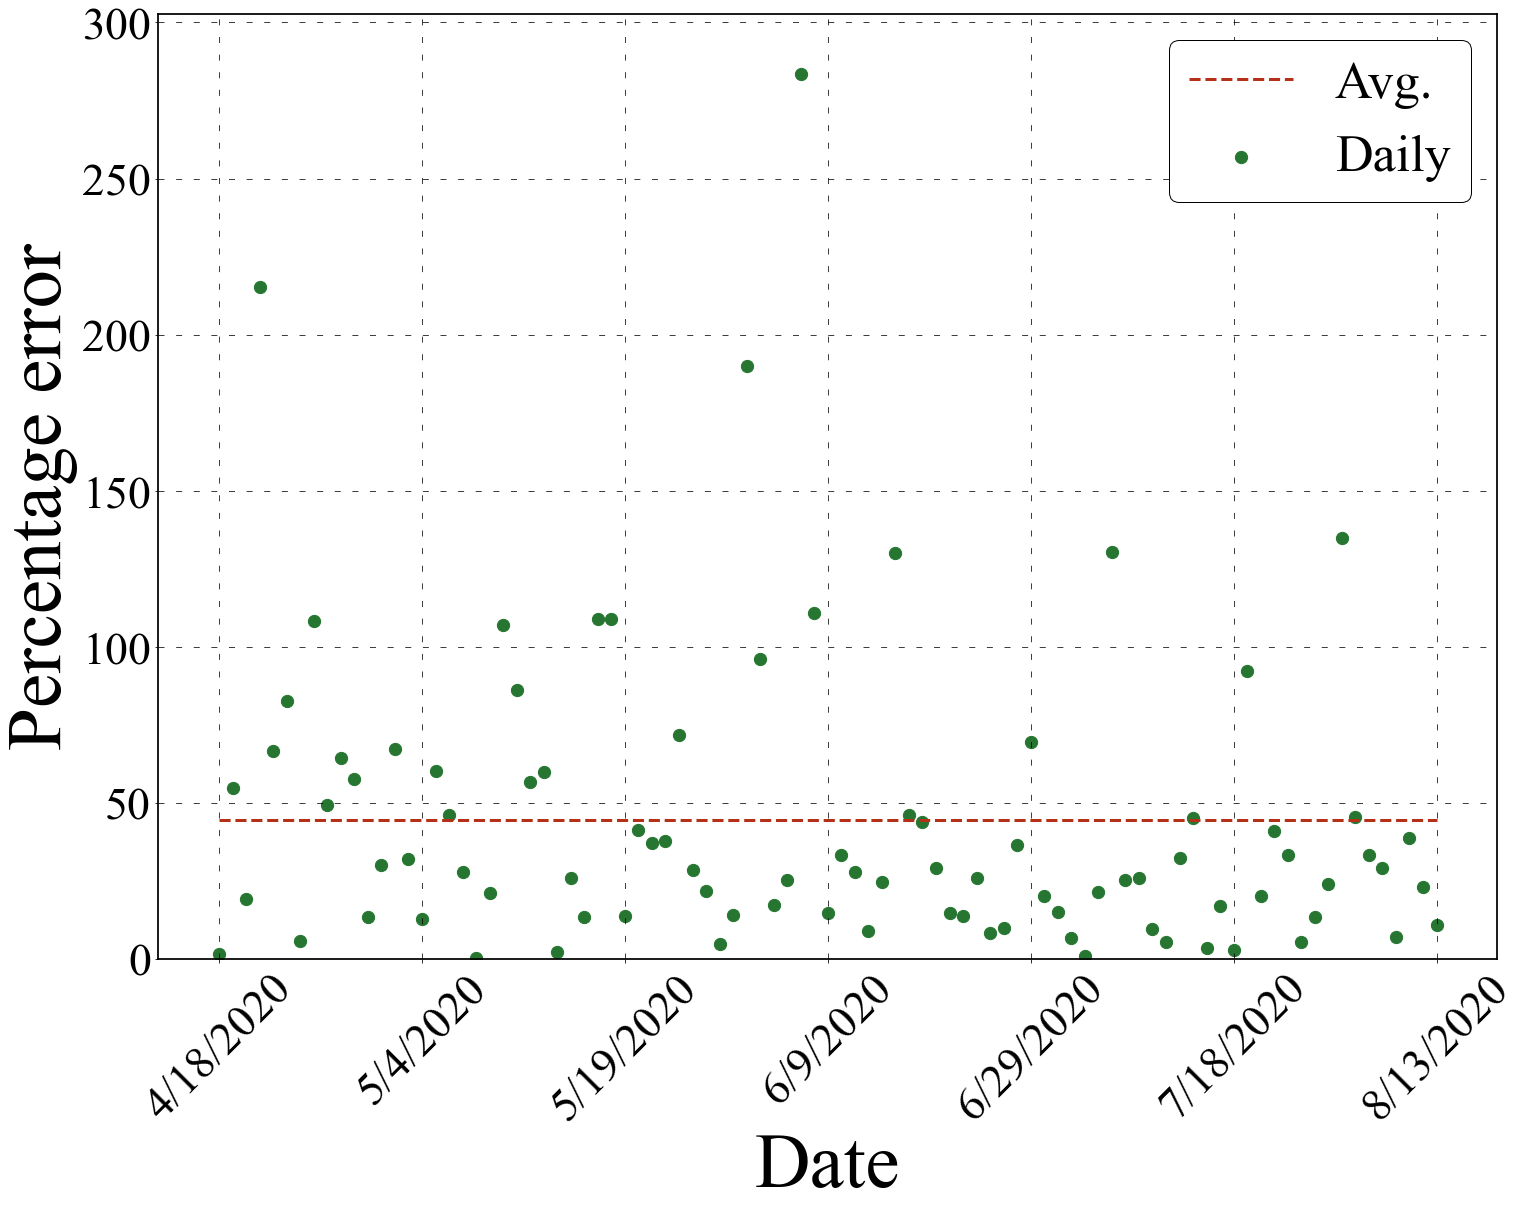

<Figure size 1728x1252.08 with 0 Axes>

In [214]:
plotGraph2(errors('MX','dead'), 'MX', 'deaths','13.054')

Series([], dtype: float64)
[20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.27908460033433, 20.

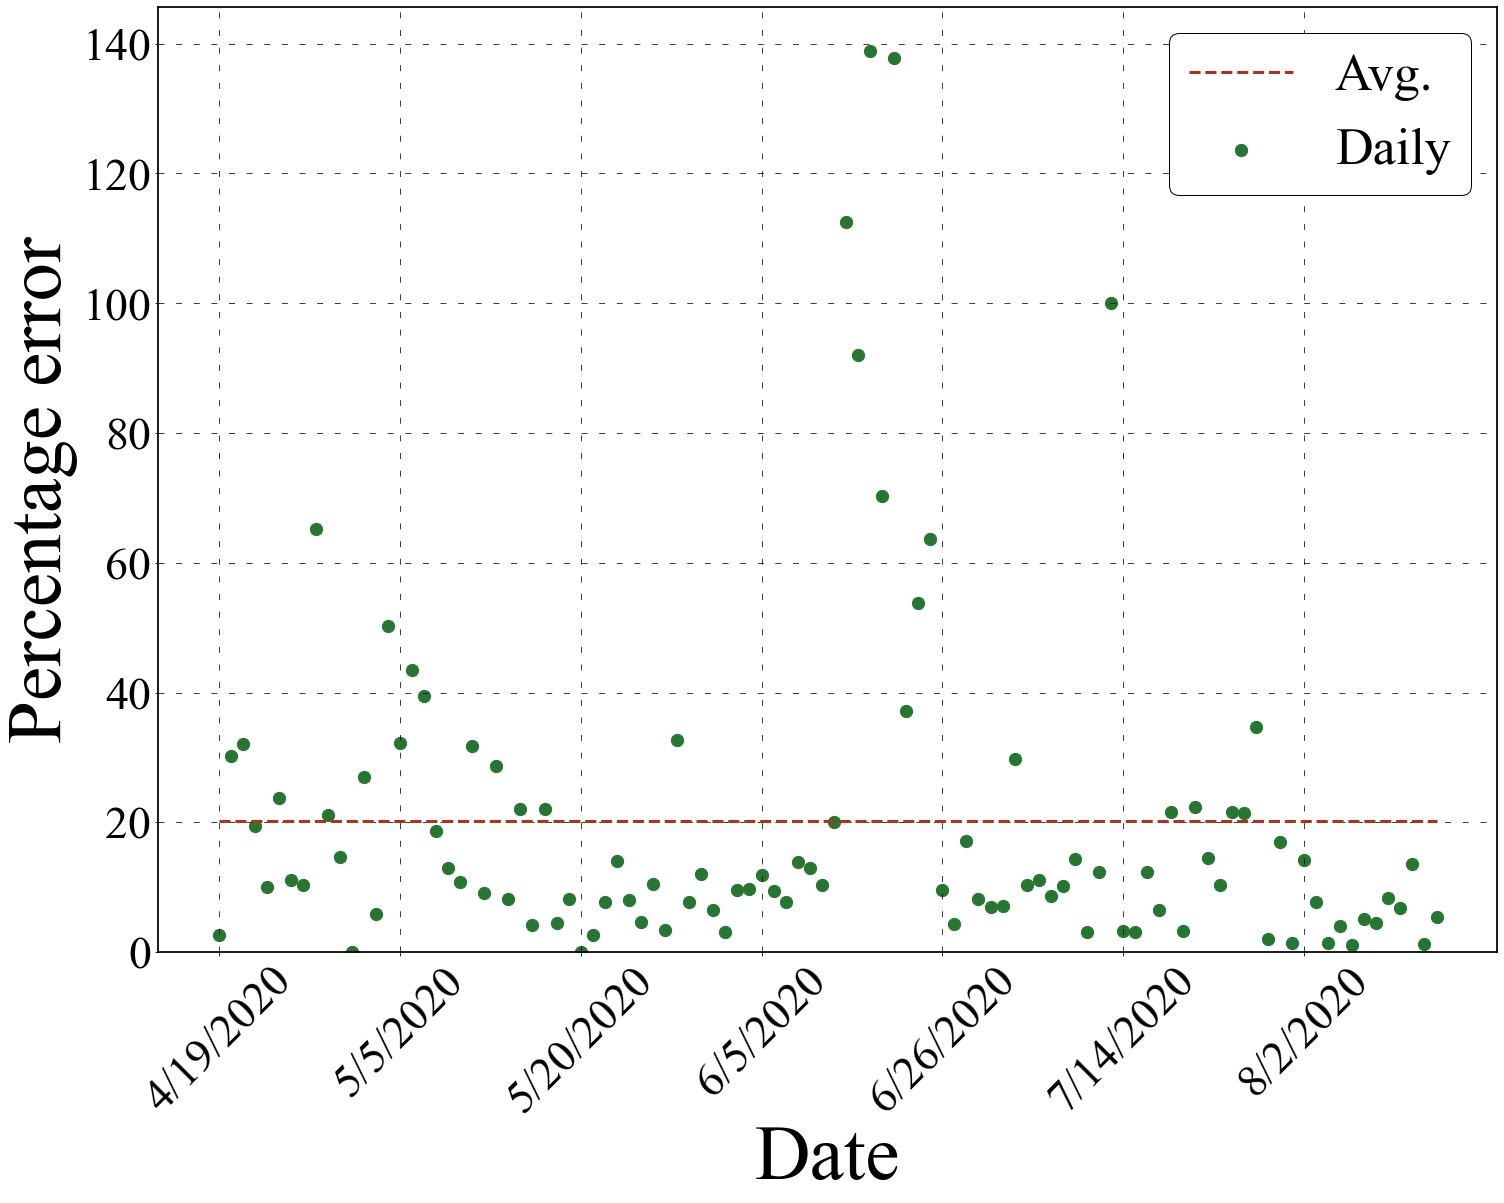

<Figure size 1728x1252.08 with 0 Axes>

In [213]:
plotGraph2(IN, 'IN', 'deaths','13.054')

16.0
14.0
4.0
3.0
6.0
4.0
3.0
17.0
16.0
3.0
8.0
9.0
9.0
8.0
2.0
18.0
27.0
11.0
15.0
10.0
13.0
7.0
3.0
6.0
3.0
2.0
21.0
23.0
13.0
16.0
18.0
7.0
2.0
2.0
15.0
8.0
25.0
23.0
1.0
7.0
13.0
7.0
6.0
18.0
17.0
6.0
11.0
4.0
12.0
3.0
2.0
4.0
7.0
3.0
3.0
4.0
36.0
6.0
2.0
5.0
33.0
33.0
5.0
1.0
3.0
2.0
12.0
1.0
25.0
16.0
19.0
18.0
15.0
6.0
7.0
6.0
6.0
15.0
3.0
40.0
47.0
68.0
79.0
46.0
6.0
9.0
24.0
20.0
1.0
15.0
5.0
21.0
8.0
12.0
10.0
2.0
6.0
20.0
21.0
4.0
23.0
39.0
30.0
29.0
19.0
8.0
7.0
3.0
27.0
11.0
18.0
24.0
31.0
26.0
5.0
4.0
14.0
The mean of differences is :
13.632478632478632
counts:
22
length of values:
117
percentage:
81.19658119658119
Series([], dtype: float64)
[14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808613, 14.425502899808

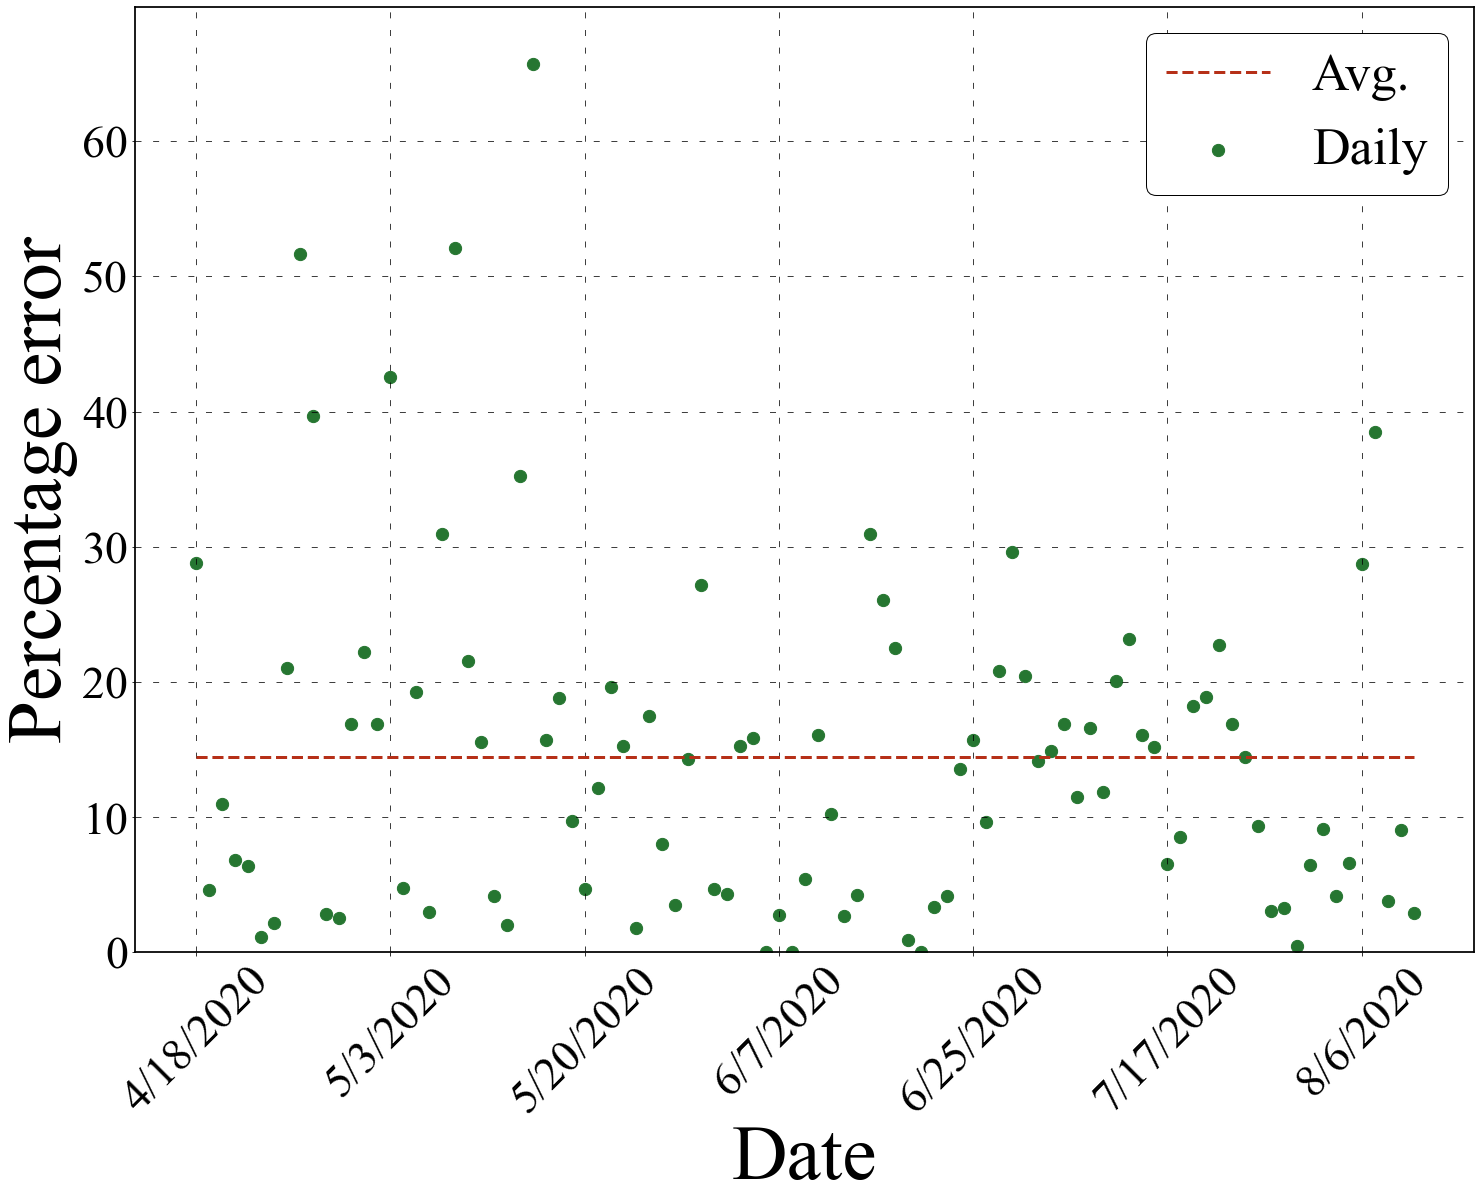

<Figure size 1728x1252.08 with 0 Axes>

In [197]:
plotGraph2(errors('IR','dead'), 'IR', 'deaths','13.054')

8.0
3.0
0.0
6.0
15.0
18.0
6.0
0.0
13.0
20.0
32.0
4.0
5.0
43.0
5.0
18.0
19.0
9.0
2.0
10.0
6.0
16.0
6.0
13.0
11.0
3.0
20.0
6.0
25.0
3.0
24.0
20.0
8.0
23.0
11.0
47.0
82.0
13.0
13.0
58.0
51.0
43.0
18.0
26.0
5.0
9.0
24.0
53.0
63.0
22.0
59.0
45.0
44.0
11.0
69.0
5.0
24.0
50.0
1.0
12.0
1.0
20.0
52.0
14.0
58.0
1.0
22.0
12.0
86.0
10.0
62.0
61.0
68.0
29.0
9.0
33.0
1.0
63.0
26.0
4.0
2.0
14.0
58.0
26.0
71.0
19.0
11.0
19.0
64.0
27.0
10.0
68.0
12.0
18.0
6.0
7.0
69.0
8.0
64.0
18.0
39.0
33.0
66.0
25.0
9.0
65.0
6.0
24.0
5.0
10.0
53.0
6.0
60.0
2.0
6.0
The mean of differences is :
25.304347826086957
counts:
30
length of values:
115
percentage:
73.91304347826086
Series([], dtype: float64)
[21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547, 21.22724071548547,

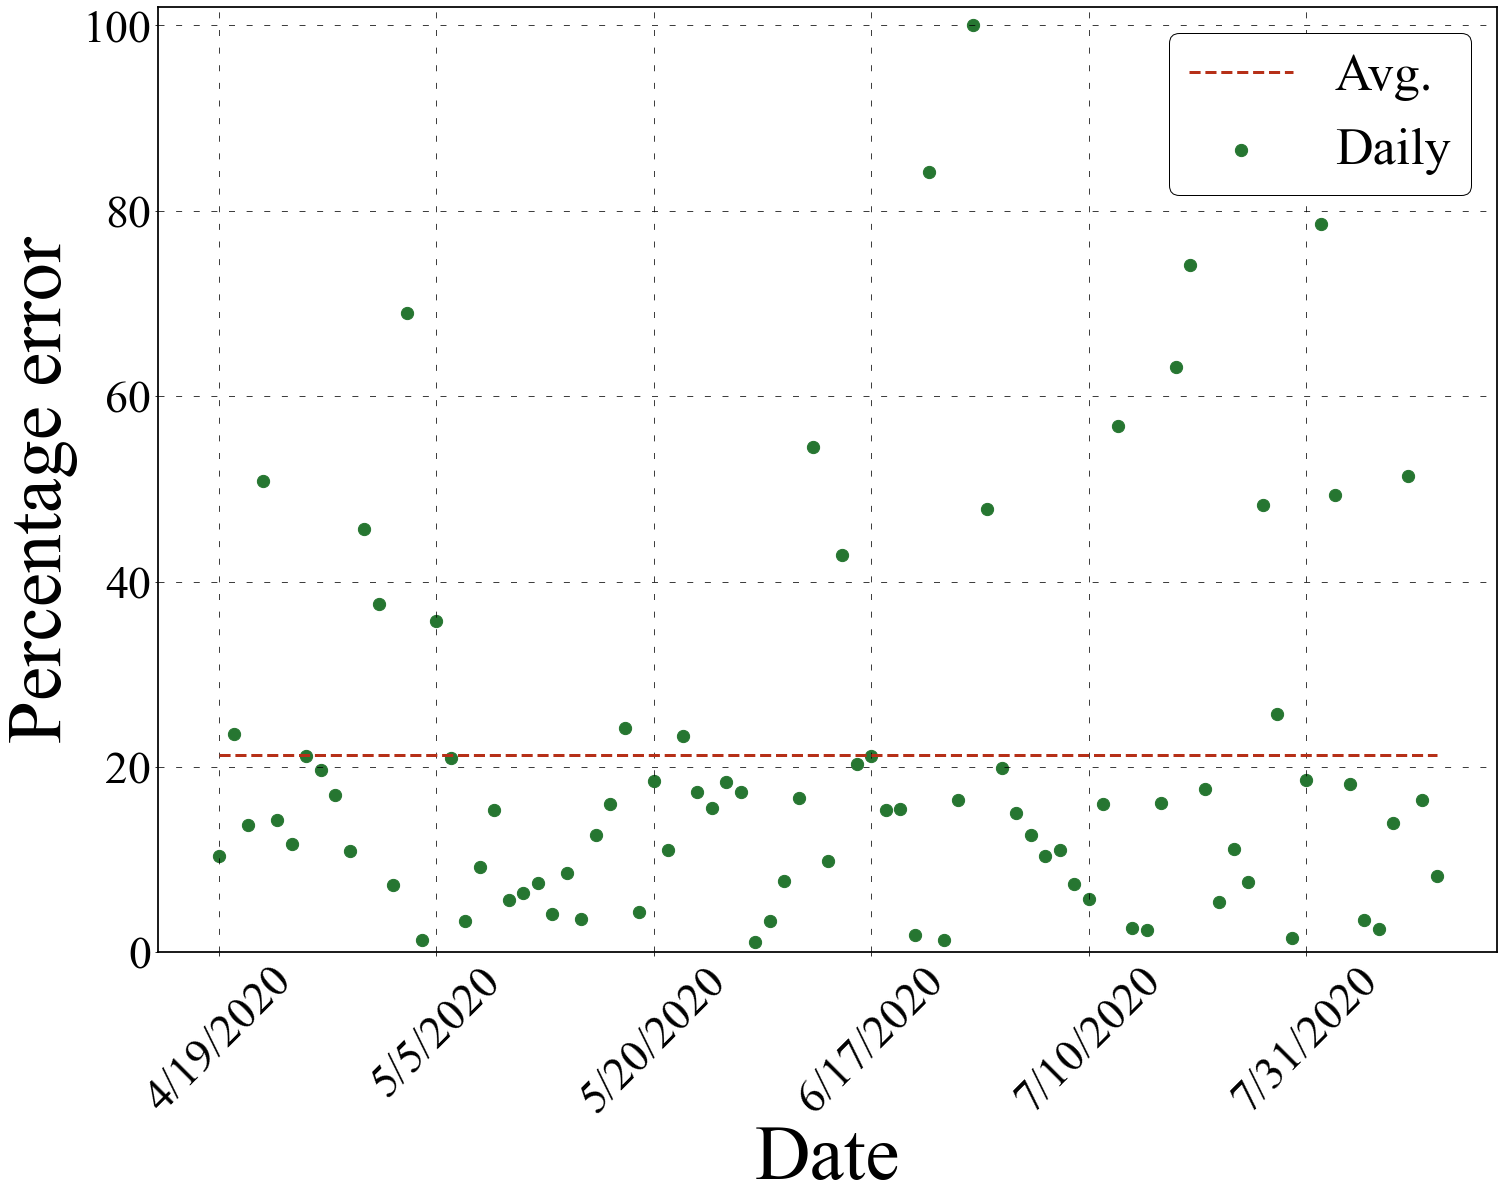

<Figure size 1728x1252.08 with 0 Axes>

In [198]:
plotGraph2(errors('RU','dead'), 'RU', 'deaths','13.054')

0.0
2.0
3.0
3.0
6.0
3.0
4.0
0.0
7.0
3.0
6.0
1.0
1.0
3.0
5.0
3.0
9.0
9.0
0.0
4.0
1.0
6.0
10.0
5.0
11.0
19.0
4.0
1.0
3.0
2.0
18.0
42.0
9.0
15.0
3.0
9.0
2.0
8.0
18.0
28.0
13.0
19.0
4.0
16.0
2.0
36.0
0.0
34.0
26.0
4.0
1.0
12.0
31.0
31.0
8.0
14.0
31.0
48.0
7.0
8.0
50.0
8.0
16.0
39.0
25.0
30.0
30.0
55.0
36.0
3.0
13.0
34.0
99.0
62.0
81.0
92.0
18.0
22.0
29.0
3.0
15.0
81.0
67.0
109.0
81.0
9.0
59.0
55.0
55.0
377.0
419.0
97.0
62.0
198.0
184.0
108.0
50.0
75.0
122.0
45.0
65.0
40.0
172.0
69.0
108.0
1.0
4.0
103.0
15.0
83.0
129.0
1.0
The mean of differences is :
39.589285714285715
counts:
21
length of values:
112
percentage:
81.25
Series([], dtype: float64)
[39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.64070636513564, 39.6407

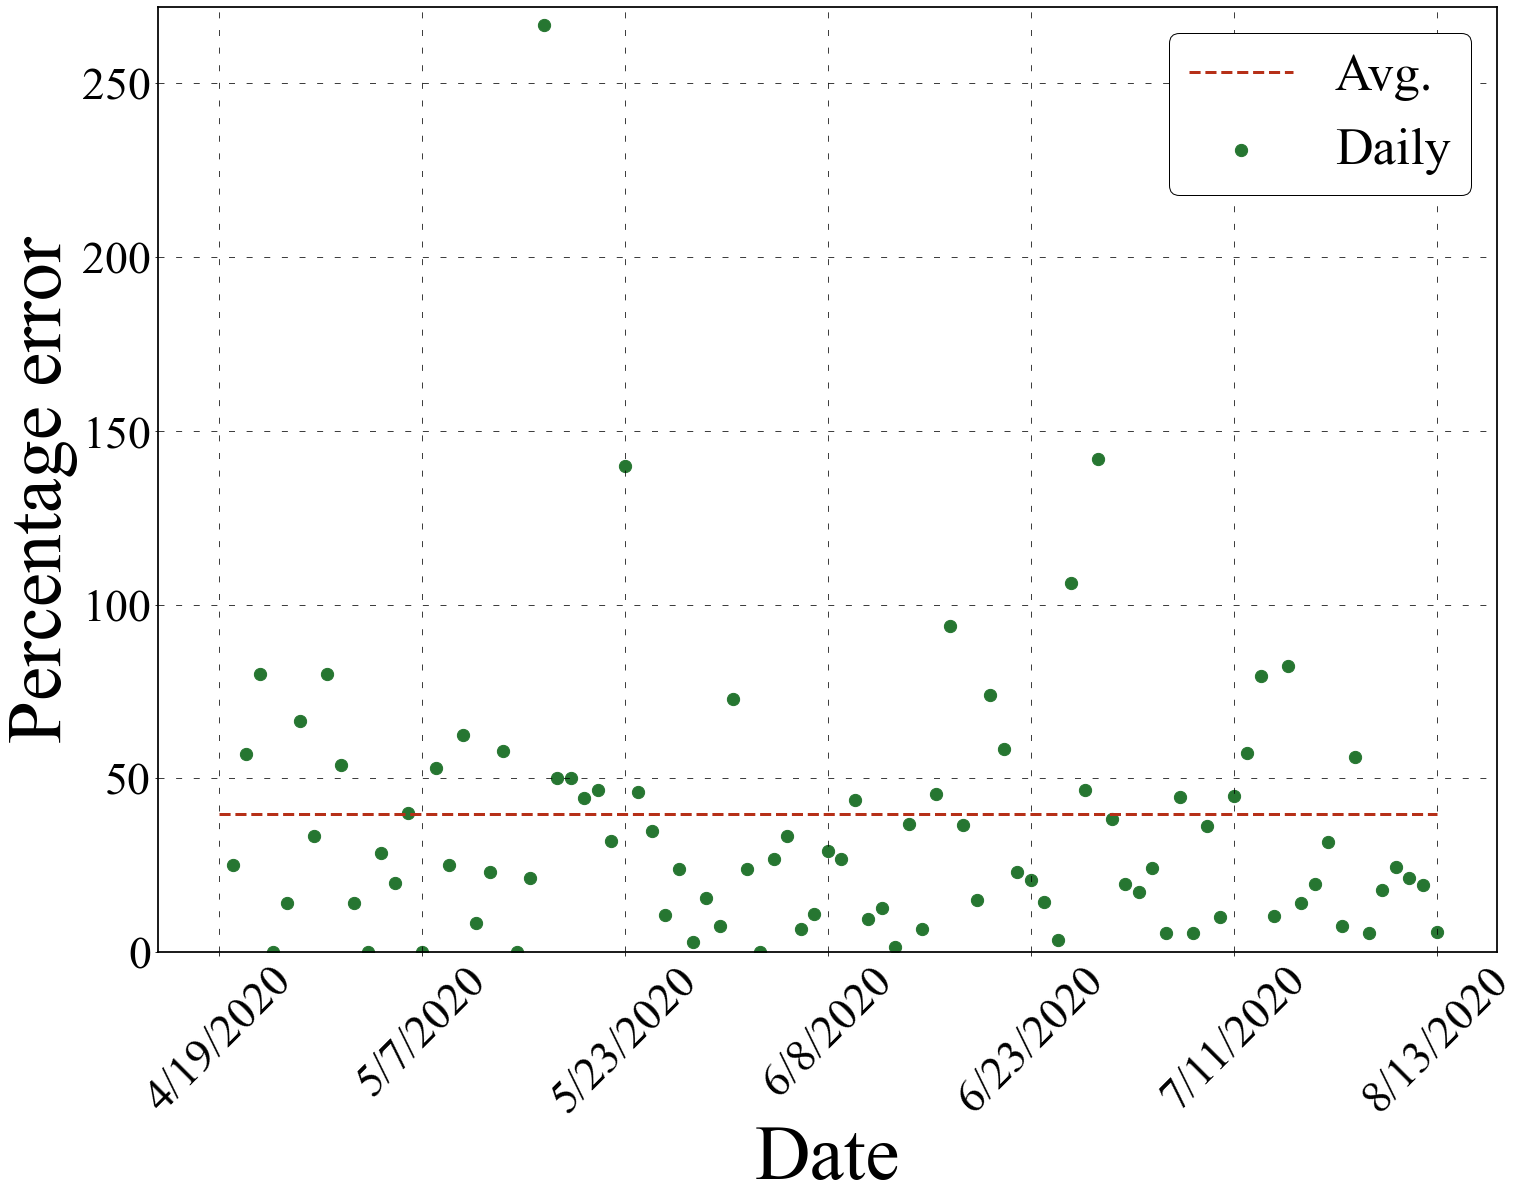

<Figure size 1728x1252.08 with 0 Axes>

In [199]:
plotGraph2(errors('ZA','dead'), 'ZA', 'deaths','13.054')

106.0
754.0
0.0
80.0
431.0
1031.0
76.0
1797.0
543.0
1954.0
306.0
419.0
114.0
1354.0
113.0
73.0
902.0
225.0
136.0
713.0
97.0
884.0
425.0
518.0
89.0
16.0
147.0
408.0
416.0
23.0
789.0
56.0
255.0
14.0
169.0
608.0
193.0
812.0
306.0
6.0
226.0
362.0
179.0
247.0
36.0
41.0
115.0
251.0
42.0
230.0
201.0
252.0
39.0
50.0
79.0
471.0
99.0
441.0
82.0
37.0
39.0
83.0
337.0
167.0
401.0
75.0
1674.0
1796.0
129.0
236.0
74.0
939.0
632.0
10.0
4.0
389.0
29.0
54.0
870.0
375.0
170.0
188.0
117.0
257.0
28.0
500.0
41.0
2.0
35.0
55.0
438.0
43.0
710.0
113.0
81.0
16.0
230.0
430.0
606.0
168.0
159.0
170.0
26.0
126.0
720.0
127.0
859.0
11.0
138.0
7.0
167.0
561.0
10.0
549.0
The mean of differences is :
324.640350877193
counts:
23
length of values:
114
percentage:
79.82456140350878
Series([], dtype: float64)
[46.12834507476855, 46.12834507476855, 46.12834507476855, 46.12834507476855, 46.12834507476855, 46.12834507476855, 46.12834507476855, 46.12834507476855, 46.12834507476855, 46.12834507476855, 46.12834507476855, 46.128345

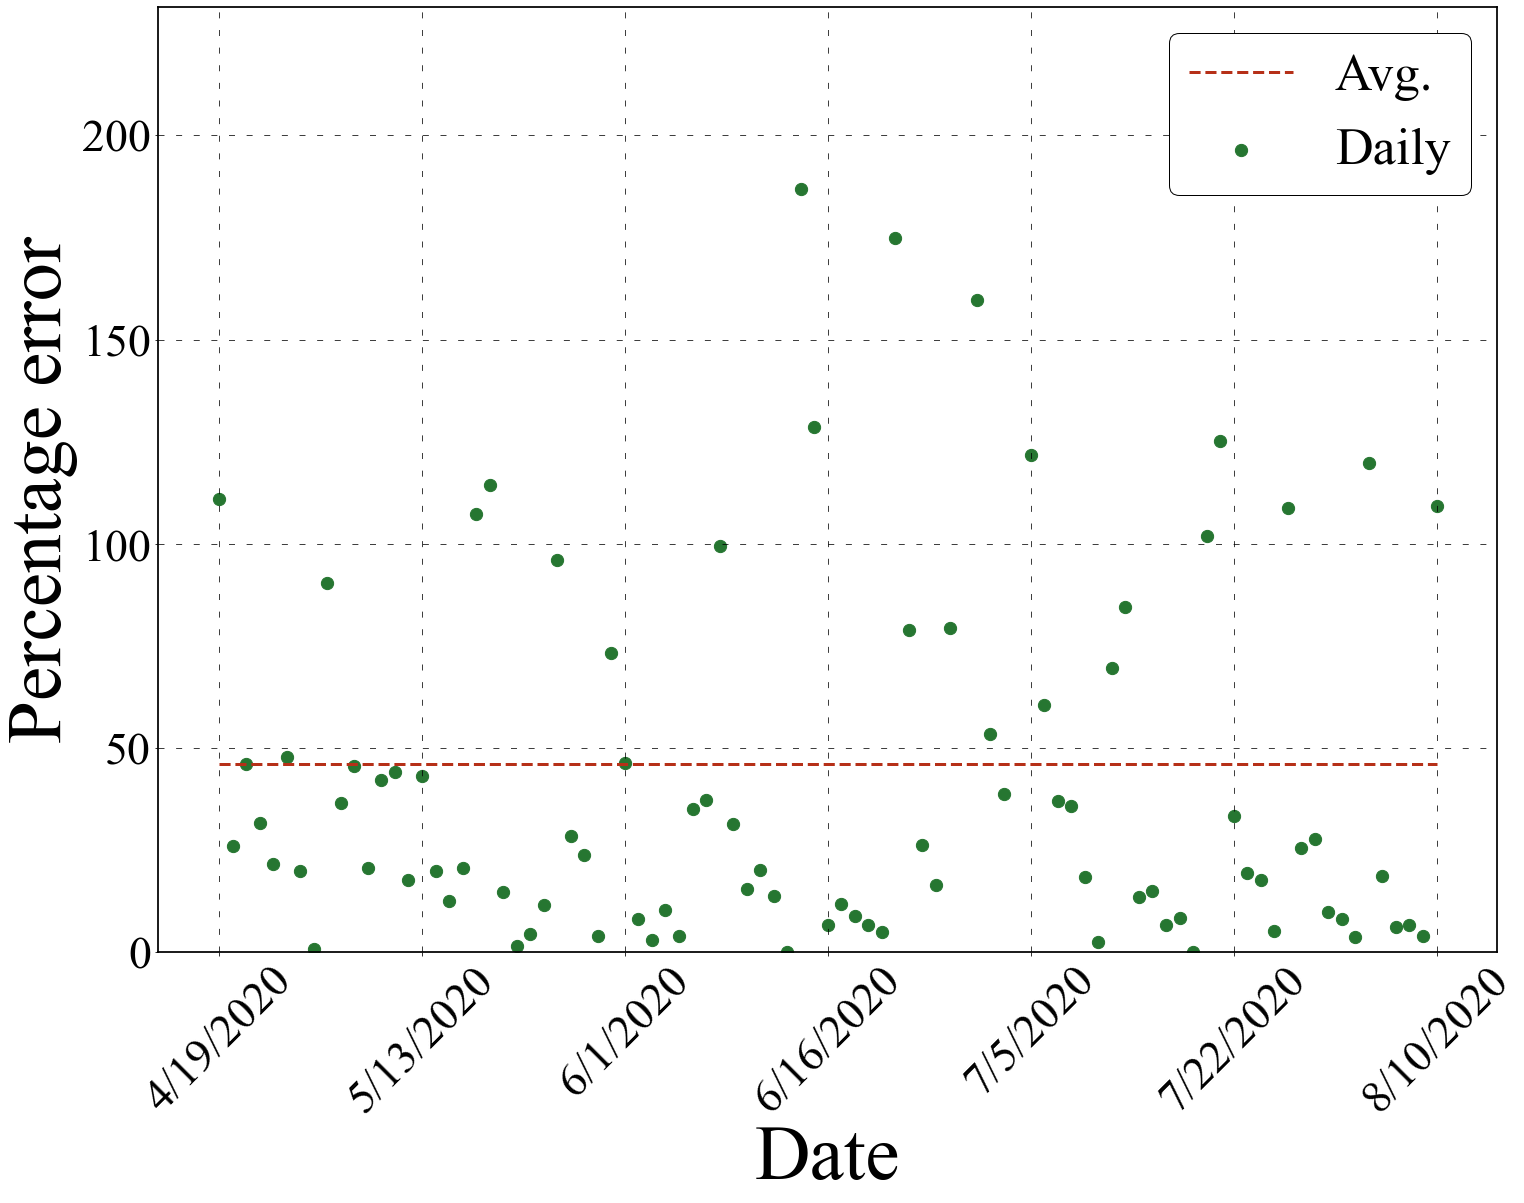

<Figure size 1728x1252.08 with 0 Axes>

In [200]:
plotGraph2(errors('US','dead'), 'US', 'deaths','13.054')

In [166]:
c = requests.get('https://restcountries.eu/rest/v2/')
    
d = c.json()
code = []

for i in d:
    code.append(i['alpha2Code'])

    
    
for j in code:
    try:
        errors(j, 'affected')
        errors(j, 'dead')
        
        
    except:
        print("mama tumi nai")
        print(j)

39.0
36.0
33.0
36.0
18.0
19.0
31.0
40.0
44.0
104.0
47.0
14.0
121.0
68.0
30.0
101.0
45.0
140.0
162.0
3.0
44.0
40.0
114.0
84.0
9.0
13.0
150.0
1.0
65.0
87.0
146.0
173.0
89.0
39.0
9.0
242.0
191.0
67.0
33.0
45.0
43.0
243.0
186.0
135.0
214.0
1.0
29.0
128.0
333.0
209.0
216.0
33.0
141.0
65.0
92.0
100.0
108.0
97.0
22.0
219.0
94.0
312.0
200.0
137.0
85.0
0.0
165.0
376.0
259.0
111.0
186.0
80.0
8.0
40.0
133.0
116.0
46.0
69.0
40.0
45.0
16.0
104.0
28.0
114.0
87.0
81.0
281.0
31.0
178.0
83.0
87.0
102.0
123.0
38.0
23.0
89.0
148.0
2.0
66.0
15.0
1.0
2.0
32.0
62.0
98.0
2.0
2.0
12.0
20.0
52.0
80.0
69.0
1.0
31.0
3.0
The mean of differences is :
87.4
counts:
22
length of values:
115
percentage:
80.8695652173913
0.0
1.0
2.0
1.0
3.0
1.0
4.0
6.0
1.0
2.0
0.0
0.0
9.0
8.0
0.0
4.0
7.0
1.0
3.0
1.0
3.0
3.0
0.0
1.0
13.0
2.0
14.0
3.0
1.0
4.0
3.0
6.0
1.0
10.0
0.0
6.0
1.0
3.0
8.0
5.0
0.0
3.0
19.0
18.0
3.0
9.0
12.0
18.0
3.0
6.0
0.0
1.0
15.0
15.0
13.0
6.0
0.0
29.0
40.0
19.0
9.0
5.0
3.0
1.0
15.0
28.0
12.0
2.0
6.0
1.0
15.0
5.

6.0
1.0
4.0
3.0
2.0
1.0
1.0
3.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
2.0
1.0
1.0
1.0
2.0
3.0
2.0
1.0
3.0
1.0
0.0
4.0
4.0
0.0
3.0
4.0
6.0
2.0
6.0
4.0
7.0
3.0
1.0
5.0
1.0
0.0
3.0
12.0
5.0
The mean of differences is :
2.0555555555555554
counts:
12
length of values:
54
percentage:
77.77777777777779
2.0
0.0
0.0
26.0
25.0
8.0
8.0
0.0
28.0
34.0
38.0
5.0
29.0
52.0
12.0
15.0
5.0
5.0
34.0
46.0
37.0
21.0
27.0
68.0
43.0
25.0
10.0
41.0
51.0
14.0
25.0
20.0
19.0
19.0
18.0
14.0
18.0
16.0
3.0
10.0
3.0
16.0
44.0
24.0
14.0
22.0
4.0
17.0
51.0
62.0
55.0
15.0
3.0
1.0
16.0
17.0
5.0
28.0
40.0
6.0
28.0
4.0
34.0
21.0
11.0
13.0
13.0
17.0
13.0
16.0
5.0
26.0
64.0
39.0
41.0
6.0
30.0
29.0
36.0
10.0
8.0
20.0
40.0
63.0
22.0
60.0
17.0
53.0
35.0
52.0
6.0
4.0
18.0
68.0
55.0
9.0
10.0
48.0
33.0
54.0
68.0
70.0
93.0
10.0
11.0
15.0
11.0
45.0
11.0
59.0
32.0
41.0
66.0
55.0
39.0
The mean of differences is :
26.704347826086956
counts:
23
length of values:
115
percentage:
80.0
3.0
12.0
0.0
2.0
7.0
4.

53.0
The mean of differences is :
53.0
counts:
0
length of values:
1
percentage:
100.0
mama tumi nai
BZ
7.0
20.0
38.0
58.0
60.0
7.0
27.0
4.0
7.0
12.0
15.0
12.0
6.0
3.0
10.0
16.0
10.0
10.0
66.0
59.0
6.0
11.0
8.0
9.0
15.0
28.0
62.0
73.0
1.0
9.0
63.0
79.0
35.0
46.0
13.0
26.0
74.0
7.0
8.0
54.0
51.0
84.0
72.0
41.0
74.0
87.0
43.0
52.0
The mean of differences is :
32.875
counts:
13
length of values:
48
percentage:
72.91666666666666
0.0
0.0
0.0
0.0
2.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
0.0
2.0
0.0
1.0
The mean of differences is :
0.6842105263157895
counts:
2
length of values:
19
percentage:
89.47368421052632
mama tumi nai
BM
0.0
0.0
1.0
0.0
2.0
1.0
4.0
2.0
0.0
2.0
2.0
1.0
8.0
6.0
3.0
10.0
8.0
1.0
3.0
0.0
1.0
3.0
4.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
1.0
0.0
1.0
1.0
1.0
1.0
12.0
The mean of differences is :
2.046511627906977
counts:
7
length of values:
43
percentage:
83.72093023255815
mama tumi nai
BT
1.0
17.0
10.0
23.0
83.0
10.0
60.0
52.0
23.0
246.0
278.0
34.0
37.0
111.

265.0
467.0
0.0
956.0
328.0
142.0
696.0
1462.0
2350.0
37.0
76.0
233.0
979.0
995.0
1125.0
195.0
221.0
28.0
34.0
229.0
71.0
0.0
18.0
6.0
64.0
35.0
69.0
121.0
47.0
3.0
0.0
85.0
38.0
1.0
191.0
42.0
72.0
88.0
54.0
161.0
26.0
11.0
138.0
11.0
54.0
50.0
150.0
175.0
102.0
139.0
17.0
40.0
3.0
12.0
87.0
2.0
35.0
80.0
18.0
51.0
11.0
132.0
24.0
9.0
29.0
56.0
210.0
83.0
66.0
322.0
370.0
76.0
164.0
36.0
96.0
14.0
1.0
103.0
11.0
6.0
162.0
32.0
438.0
270.0
23.0
108.0
36.0
99.0
23.0
477.0
235.0
218.0
291.0
109.0
362.0
36.0
363.0
282.0
86.0
166.0
284.0
362.0
3.0
40.0
481.0
312.0
20.0
162.0
271.0
26.0
467.0
350.0
22.0
163.0
The mean of differences is :
191.07894736842104
counts:
19
length of values:
114
percentage:
83.33333333333334
119.0
19.0
0.0
118.0
5.0
9.0
18.0
79.0
140.0
5.0
16.0
52.0
66.0
36.0
97.0
21.0
11.0
1.0
19.0
30.0
42.0
44.0
61.0
60.0
42.0
80.0
34.0
18.0
46.0
11.0
54.0
5.0
24.0
13.0
15.0
23.0
25.0
17.0
25.0
15.0
119.0
185.0
42.0
31.0
35.0
77.0
11.0
45.0
6.0
27.0
8.0
35.0
21.0
4.0
23.0
25.0
3

1.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
1.0
3.0
5.0
9.0
2.0
3.0
0.0
2.0
0.0
0.0
0.0
2.0
2.0
0.0
1.0
4.0
4.0
1.0
2.0
4.0
4.0
2.0
1.0
3.0
2.0
2.0
0.0
2.0
0.0
3.0
0.0
6.0
7.0
2.0
4.0
2.0
0.0
4.0
6.0
1.0
1.0
0.0
1.0
1.0
3.0
1.0
1.0
2.0
3.0
2.0
3.0
5.0
8.0
The mean of differences is :
2.111111111111111
counts:
13
length of values:
63
percentage:
79.36507936507937
mama tumi nai
CK
1.0
3.0
5.0
5.0
7.0
4.0
5.0
4.0
6.0
0.0
2.0
0.0
2.0
5.0
10.0
7.0
2.0
4.0
1.0
5.0
3.0
6.0
8.0
4.0
2.0
3.0
0.0
7.0
13.0
1.0
9.0
2.0
1.0
14.0
16.0
23.0
12.0
6.0
3.0
16.0
19.0
7.0
31.0
15.0
3.0
1.0
20.0
31.0
9.0
53.0
9.0
3.0
24.0
3.0
24.0
23.0
23.0
7.0
51.0
50.0
17.0
22.0
27.0
56.0
22.0
17.0
9.0
8.0
12.0
51.0
104.0
24.0
18.0
22.0
65.0
130.0
0.0
105.0
299.0
289.0
26.0
21.0
75.0
6.0
58.0
56.0
137.0
159.0
19.0
143.0
143.0
273.0
218.0
228.0
391.0
302.0
17.0
109.0
47.0
34.0
40.0
163.0
421.0
361.0
8.0
145.0
73.0
358.0
290.0
237.0
102.0
50.0
87.0
523.0
The mean of differences is :
63.59649122807018
counts:
22
length of values

17.0
5.0
0.0
4.0
6.0
7.0
71.0
121.0
196.0
5.0
146.0
145.0
115.0
188.0
44.0
13.0
14.0
37.0
397.0
392.0
164.0
175.0
3.0
252.0
162.0
46.0
15.0
23.0
9.0
2.0
66.0
77.0
55.0
23.0
34.0
17.0
3.0
56.0
32.0
0.0
26.0
61.0
8.0
27.0
18.0
78.0
62.0
24.0
11.0
8.0
4.0
43.0
11.0
2.0
16.0
18.0
6.0
45.0
13.0
68.0
48.0
24.0
14.0
2.0
8.0
57.0
28.0
12.0
25.0
12.0
53.0
76.0
0.0
51.0
39.0
21.0
6.0
11.0
1.0
26.0
43.0
4.0
31.0
8.0
10.0
31.0
9.0
35.0
13.0
5.0
11.0
11.0
3.0
10.0
2.0
9.0
10.0
1.0
13.0
4.0
9.0
14.0
7.0
The mean of differences is :
43.62135922330097
counts:
15
length of values:
103
percentage:
85.43689320388349
17.0
76.0
77.0
32.0
12.0
63.0
31.0
26.0
21.0
12.0
34.0
43.0
89.0
60.0
26.0
76.0
40.0
1.0
6.0
102.0
7.0
52.0
90.0
1.0
9.0
60.0
1.0
92.0
19.0
25.0
185.0
25.0
29.0
9.0
56.0
25.0
87.0
121.0
217.0
162.0
78.0
169.0
137.0
247.0
73.0
73.0
196.0
149.0
30.0
102.0
20.0
70.0
13.0
135.0
100.0
59.0
73.0
124.0
204.0
145.0
556.0
227.0
72.0
101.0
244.0
88.0
149.0
56.0
457.0
97.0
301.0
9.0
54.0
18.0
73.0
88.0


0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
2.0
0.0
0.0
3.0
2.0
1.0
1.0
0.0
3.0
4.0
1.0
0.0
0.0
1.0
1.0
1.0
0.0
The mean of differences is :
0.9655172413793104
counts:
5
length of values:
29
percentage:
82.75862068965517
0.0
0.0
4.0
4.0
1.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
2.0
2.0
1.0
3.0
3.0
0.0
0.0
0.0
1.0
0.0
4.0
4.0
2.0
2.0
1.0
13.0
1.0
4.0
15.0
10.0
22.0
15.0
12.0
28.0
18.0
78.0
45.0
8.0
19.0
10.0
34.0
20.0
52.0
The mean of differences is :
9.777777777777779
counts:
9
length of values:
45
percentage:
80.0
0.0
0.0
0.0
0.0
1.0
1.0
4.0
3.0
1.0
1.0
5.0
8.0
9.0
The mean of differences is :
2.5384615384615383
counts:
3
length of values:
13
percentage:
76.92307692307693
12.0
0.0
0.0
2.0
1.0
10.0
7.0
17.0
18.0
3.0
8.0
16.0
5.0
11.0
9.0
3.0
7.0
5.0
1.0
3.0
5.0
6.0
6.0
1.0
1.0
15.0
16.0
8.0
0.0
6.0
0.0
0.0
2.0
6.0
3.0
4.0
0.0
2.0
0.0
5.0
3.0
15.0
15.0
9.0
2.0
3.0
3.0
1.0
2.0
2.0
3.0
3.0
5.0
8.0
4.0
5.0
2.0
6.0
4.0
2.0
1.0
6.0
6.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
5.0
4.0
1.0
2.0
1.0
3.0
0.

0.0
0.0
1.0
1.0
1.0
1.0
2.0
2.0
1.0
0.0
1.0
0.0
2.0
2.0
0.0
5.0
5.0
0.0
5.0
3.0
2.0
2.0
1.0
1.0
2.0
1.0
0.0
4.0
0.0
0.0
2.0
2.0
0.0
1.0
2.0
0.0
2.0
1.0
2.0
0.0
3.0
3.0
1.0
0.0
1.0
2.0
6.0
8.0
2.0
0.0
0.0
1.0
4.0
2.0
1.0
1.0
0.0
0.0
1.0
2.0
3.0
4.0
1.0
1.0
4.0
3.0
1.0
The mean of differences is :
1.671641791044776
counts:
14
length of values:
67
percentage:
79.1044776119403
mama tumi nai
HM
0.0
0.0
0.0
The mean of differences is :
0.0
counts:
3
length of values:
3
percentage:
0.0
mama tumi nai
VA
1.0
0.0
10.0
12.0
8.0
16.0
34.0
9.0
7.0
28.0
3.0
62.0
78.0
161.0
78.0
31.0
99.0
33.0
138.0
27.0
83.0
14.0
47.0
112.0
79.0
37.0
24.0
71.0
5.0
92.0
24.0
34.0
27.0
27.0
127.0
230.0
234.0
52.0
5.0
2.0
27.0
99.0
93.0
12.0
49.0
362.0
60.0
116.0
154.0
140.0
80.0
83.0
158.0
165.0
203.0
79.0
529.0
585.0
124.0
0.0
41.0
167.0
167.0
385.0
62.0
339.0
4.0
36.0
154.0
138.0
191.0
217.0
300.0
41.0
213.0
144.0
263.0
139.0
23.0
18.0
441.0
99.0
47.0
170.0
6.0
266.0
42.0
23.0
43.0
143.0
222.0
41.0
373.0
254.0
235.0

5.0
2.0
1.0
17.0
15.0
24.0
28.0
54.0
6.0
7.0
14.0
2.0
11.0
27.0
35.0
36.0
14.0
3.0
16.0
12.0
37.0
44.0
24.0
8.0
61.0
17.0
77.0
6.0
93.0
56.0
40.0
66.0
221.0
145.0
53.0
71.0
35.0
94.0
110.0
46.0
169.0
90.0
262.0
109.0
334.0
246.0
16.0
153.0
328.0
359.0
115.0
166.0
85.0
79.0
153.0
279.0
169.0
91.0
172.0
235.0
224.0
162.0
18.0
374.0
237.0
383.0
15.0
71.0
391.0
209.0
457.0
231.0
128.0
22.0
209.0
329.0
630.0
315.0
571.0
678.0
114.0
422.0
83.0
207.0
88.0
171.0
258.0
26.0
261.0
147.0
303.0
240.0
345.0
124.0
377.0
403.0
94.0
194.0
221.0
5.0
383.0
1251.0
352.0
288.0
101.0
2.0
213.0
414.0
136.0
599.0
758.0
88.0
45.0
400.0
The mean of differences is :
175.52631578947367
counts:
24
length of values:
114
percentage:
78.94736842105263
0.0
2.0
2.0
1.0
0.0
1.0
0.0
0.0
1.0
1.0
3.0
2.0
1.0
1.0
1.0
1.0
1.0
1.0
2.0
2.0
2.0
0.0
1.0
3.0
1.0
2.0
2.0
3.0
0.0
2.0
2.0
4.0
0.0
0.0
10.0
1.0
6.0
1.0
19.0
5.0
4.0
2.0
12.0
3.0
8.0
14.0
5.0
13.0
15.0
1.0
22.0
14.0
19.0
1.0
20.0
17.0
5.0
28.0
15.0
21.0
5.0
13.0
21.0
3

8.0
7.0
0.0
8.0
10.0
1.0
9.0
1.0
3.0
1.0
2.0
3.0
15.0
5.0
20.0
2.0
22.0
11.0
14.0
5.0
5.0
13.0
7.0
1.0
2.0
26.0
8.0
32.0
26.0
15.0
14.0
28.0
21.0
41.0
10.0
61.0
24.0
20.0
16.0
69.0
15.0
13.0
51.0
1.0
10.0
8.0
41.0
62.0
12.0
12.0
16.0
31.0
62.0
15.0
4.0
0.0
51.0
29.0
96.0
13.0
156.0
201.0
96.0
99.0
76.0
29.0
129.0
19.0
139.0
56.0
131.0
39.0
21.0
142.0
80.0
128.0
2.0
95.0
169.0
26.0
195.0
101.0
190.0
308.0
36.0
40.0
32.0
299.0
85.0
185.0
21.0
240.0
159.0
129.0
292.0
585.0
588.0
234.0
62.0
244.0
65.0
4.0
37.0
146.0
61.0
66.0
133.0
189.0
28.0
100.0
107.0
5.0
182.0
29.0
The mean of differences is :
71.3859649122807
counts:
25
length of values:
114
percentage:
78.0701754385965
1.0
1.0
1.0
2.0
2.0
0.0
1.0
2.0
1.0
1.0
2.0
1.0
2.0
1.0
2.0
4.0
2.0
0.0
1.0
3.0
0.0
4.0
3.0
1.0
1.0
3.0
3.0
3.0
0.0
2.0
2.0
2.0
1.0
0.0
1.0
2.0
0.0
1.0
8.0
8.0
0.0
0.0
0.0
1.0
1.0
0.0
3.0
1.0
2.0
1.0
3.0
3.0
2.0
1.0
3.0
4.0
3.0
1.0
1.0
2.0
4.0
5.0
2.0
11.0
7.0
2.0
1.0
3.0
2.0
6.0
5.0
8.0
2.0
7.0
8.0
7.0
2.0
3.0
9.0
2.0

1.0
0.0
0.0
0.0
1.0
0.0
3.0
1.0
4.0
2.0
0.0
3.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
0.0
2.0
1.0
1.0
2.0
0.0
1.0
2.0
3.0
0.0
0.0
2.0
0.0
1.0
3.0
0.0
3.0
5.0
6.0
3.0
2.0
0.0
0.0
0.0
1.0
2.0
6.0
2.0
3.0
6.0
1.0
4.0
3.0
1.0
3.0
0.0
5.0
6.0
4.0
5.0
4.0
2.0
3.0
6.0
0.0
3.0
8.0
0.0
11.0
8.0
1.0
1.0
2.0
0.0
3.0
5.0
3.0
2.0
2.0
3.0
1.0
0.0
4.0
3.0
3.0
0.0
2.0
0.0
7.0
3.0
3.0
3.0
1.0
0.0
1.0
2.0
1.0
3.0
1.0
2.0
1.0
0.0
4.0
2.0
0.0
3.0
0.0
0.0
1.0
The mean of differences is :
2.0925925925925926
counts:
19
length of values:
108
percentage:
82.4074074074074
2.0
0.0
0.0
0.0
3.0
0.0
1.0
11.0
12.0
5.0
28.0
9.0
8.0
10.0
37.0
24.0
3.0
14.0
41.0
11.0
9.0
3.0
25.0
29.0
18.0
18.0
2.0
18.0
47.0
42.0
36.0
44.0
14.0
31.0
33.0
25.0
16.0
2.0
20.0
17.0
4.0
25.0
8.0
2.0
9.0
34.0
36.0
15.0
20.0
33.0
49.0
40.0
21.0
21.0
51.0
20.0
13.0
16.0
13.0
11.0
9.0
107.0
3.0
96.0
87.0
121.0
108.0
152.0
74.0
146.0
76.0
50.0
1.0
222.0
106.0
4.0
182.0
96.0
291.0
219.0
395.0
141.0
235.0
304.0
34.0
19.0
201.0
218.0
311.0
285.0
150.0
123.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
2.0
2.0
1.0
0.0
1.0
0.0
1.0
3.0
2.0
0.0
The mean of differences is :
0.7407407407407407
counts:
5
length of values:
27
percentage:
81.48148148148148
The mean of differences is :
nan
counts:
0
length of values:
0
percentage:
mama tumi nai
MC
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
55.0
19.0
36.0
3.0
3.0
6.0
6.0
5.0
12.0
5.0
4.0
3.0
1.0
2.0
1.0
1.0
1.0
5.0
5.0
1.0
2.0
2.0
4.0
3.0
1.0
10.0
5.0
17.0
24.0
24.0
0.0
1.0
0.0
2.0
The mean of differences is :
6.113636363636363
counts:
7
length of values:
44
percentage:
84.0909090909091
mama tumi nai
MN
3.0
0.0
1.0
1.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
6.0
3.0
14.0
14.0
1.0
2.0
6.0
0.0
14.0
0.0
5.0
18.0
8.0
27.0
19.0
12.0
7.0
10.0
4.0
1.0
6.0
13.0
6.0
86.0
88.0
9.0
612.0
571.0
9.0
77.0
102.0
6.0
1.0
14.0
30.0
42.0
38.0
11.0
10.0
68.0
65.0
17.0
17.0
10.0
19.0
0.0
30.0
9.0
48.0
26.0
13.0
21.0
The mean of differences is :
35.21875
counts:
8
length of values:
64
percentage:
87.5
0.0
0.

mama tumi nai
NF
mama tumi nai
KP
mama tumi nai
MP
57.0
7.0
0.0
112.0
84.0
1.0
32.0
42.0
11.0
11.0
22.0
17.0
19.0
12.0
19.0
6.0
10.0
3.0
2.0
7.0
23.0
21.0
2.0
7.0
3.0
2.0
5.0
6.0
4.0
2.0
4.0
14.0
5.0
9.0
2.0
7.0
1.0
8.0
1.0
4.0
12.0
3.0
3.0
13.0
5.0
9.0
9.0
7.0
2.0
1.0
3.0
4.0
6.0
5.0
13.0
3.0
19.0
16.0
2.0
2.0
13.0
3.0
15.0
5.0
28.0
30.0
5.0
2.0
10.0
0.0
11.0
13.0
14.0
1.0
2.0
5.0
8.0
12.0
6.0
6.0
1.0
1.0
14.0
7.0
6.0
6.0
7.0
3.0
13.0
13.0
20.0
19.0
12.0
13.0
9.0
3.0
4.0
14.0
4.0
19.0
2.0
51.0
38.0
19.0
12.0
24.0
35.0
9.0
7.0
21.0
35.0
36.0
The mean of differences is :
12.5625
counts:
17
length of values:
112
percentage:
84.82142857142857
2.0
0.0
0.0
4.0
2.0
2.0
3.0
2.0
3.0
0.0
2.0
2.0
2.0
2.0
0.0
0.0
0.0
0.0
4.0
1.0
3.0
2.0
2.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
2.0
0.0
3.0
3.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
The mean of differences is :
1.1428571428571428
counts:
19
length of values:
42
percentage:
54.761904761904766
25.0
12.0
0.0
8.0
4.0
28.0
41.0
22.0
42.0
31.0
61.0
69.0
25.0
63.0
49.0
1

mama tumi nai
PN
182.0
282.0
0.0
50.0
29.0
39.0
0.0
259.0
163.0
31.0
106.0
185.0
9.0
42.0
48.0
5.0
112.0
116.0
2.0
12.0
34.0
60.0
15.0
265.0
312.0
128.0
10.0
160.0
31.0
84.0
27.0
88.0
67.0
72.0
164.0
7.0
138.0
44.0
47.0
22.0
86.0
201.0
164.0
149.0
62.0
69.0
1.0
214.0
1.0
24.0
199.0
118.0
77.0
17.0
64.0
65.0
21.0
11.0
99.0
192.0
13.0
3.0
7.0
15.0
4.0
6.0
4.0
22.0
43.0
126.0
54.0
8.0
143.0
11.0
112.0
55.0
83.0
26.0
52.0
20.0
15.0
3.0
40.0
65.0
71.0
32.0
3.0
69.0
20.0
14.0
19.0
79.0
120.0
19.0
38.0
40.0
126.0
141.0
106.0
165.0
10.0
103.0
42.0
1.0
110.0
27.0
105.0
40.0
86.0
83.0
34.0
219.0
5.0
68.0
164.0
96.0
The mean of differences is :
72.98275862068965
counts:
24
length of values:
116
percentage:
79.3103448275862
2.0
8.0
0.0
4.0
3.0
12.0
10.0
28.0
25.0
7.0
6.0
8.0
13.0
6.0
1.0
6.0
2.0
1.0
5.0
1.0
12.0
6.0
4.0
17.0
6.0
0.0
2.0
16.0
2.0
1.0
1.0
2.0
4.0
0.0
1.0
0.0
6.0
13.0
6.0
3.0
3.0
7.0
7.0
8.0
5.0
21.0
18.0
4.0
12.0
5.0
8.0
6.0
14.0
2.0
8.0
5.0
1.0
7.0
2.0
16.0
12.0
6.0
2.0
7.0
13.0
5.

The mean of differences is :
nan
counts:
0
length of values:
0
percentage:
mama tumi nai
ST
44.0
59.0
0.0
6.0
17.0
14.0
25.0
26.0
66.0
23.0
59.0
26.0
7.0
18.0
190.0
93.0
50.0
92.0
106.0
92.0
3.0
208.0
54.0
55.0
6.0
134.0
268.0
533.0
104.0
143.0
84.0
182.0
159.0
110.0
200.0
207.0
304.0
116.0
171.0
63.0
37.0
259.0
4.0
12.0
302.0
196.0
616.0
530.0
76.0
324.0
81.0
429.0
16.0
188.0
555.0
867.0
274.0
240.0
652.0
162.0
456.0
360.0
562.0
14.0
254.0
16.0
249.0
566.0
11.0
62.0
46.0
444.0
985.0
19.0
810.0
65.0
548.0
627.0
815.0
356.0
147.0
24.0
165.0
215.0
73.0
160.0
72.0
151.0
48.0
61.0
75.0
47.0
145.0
93.0
140.0
177.0
233.0
25.0
96.0
138.0
130.0
57.0
113.0
216.0
99.0
105.0
5.0
34.0
165.0
98.0
41.0
171.0
264.0
48.0
87.0
The mean of differences is :
183.65217391304347
counts:
20
length of values:
115
percentage:
82.6086956521739
0.0
1.0
0.0
1.0
2.0
1.0
3.0
6.0
2.0
3.0
3.0
0.0
2.0
0.0
1.0
1.0
2.0
0.0
1.0
0.0
0.0
3.0
2.0
0.0
0.0
1.0
1.0
1.0
0.0
2.0
1.0
1.0
2.0
1.0
2.0
6.0
3.0
2.0
2.0
1.0
5.0
1.0
1.

mama tumi nai
GS
10.0
1.0
0.0
10.0
5.0
4.0
4.0
5.0
5.0
5.0
3.0
7.0
5.0
5.0
1.0
2.0
8.0
6.0
16.0
1.0
8.0
1.0
3.0
2.0
8.0
6.0
2.0
2.0
19.0
20.0
8.0
3.0
2.0
6.0
21.0
18.0
19.0
12.0
8.0
3.0
11.0
10.0
0.0
12.0
6.0
19.0
0.0
12.0
5.0
11.0
8.0
14.0
2.0
2.0
9.0
16.0
10.0
18.0
19.0
31.0
29.0
5.0
23.0
11.0
12.0
11.0
20.0
1.0
7.0
4.0
9.0
0.0
2.0
15.0
2.0
19.0
14.0
4.0
10.0
9.0
18.0
29.0
6.0
22.0
1.0
21.0
5.0
8.0
19.0
18.0
4.0
18.0
72.0
55.0
33.0
3.0
20.0
30.0
18.0
5.0
1.0
7.0
11.0
1.0
10.0
23.0
23.0
7.0
8.0
6.0
20.0
2.0
47.0
The mean of differences is :
11.212389380530974
counts:
24
length of values:
113
percentage:
78.76106194690266
0.0
1.0
0.0
2.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
The mean of differences is :
0.35185185185185186
counts:
18
length of values:
54
percentage:
66.66666666666666
0.0
27.0
27.0
9.0
5.0
4.0
The mean of diffe

7.0
151.0
152.0
The mean of differences is :
103.33333333333333
counts:
0
length of values:
3
percentage:
100.0
4.0
1.0
The mean of differences is :
2.5
counts:
0
length of values:
2
percentage:
100.0
1.0
13.0
0.0
4.0
2.0
2.0
0.0
6.0
2.0
2.0
2.0
1.0
0.0
3.0
15.0
17.0
0.0
2.0
5.0
4.0
1.0
1.0
4.0
1.0
6.0
4.0
0.0
1.0
1.0
2.0
0.0
1.0
1.0
6.0
2.0
0.0
10.0
3.0
3.0
0.0
0.0
16.0
16.0
1.0
6.0
1.0
5.0
2.0
0.0
1.0
4.0
5.0
1.0
4.0
0.0
2.0
2.0
3.0
2.0
5.0
7.0
0.0
4.0
5.0
4.0
0.0
0.0
3.0
3.0
9.0
13.0
2.0
4.0
2.0
1.0
1.0
4.0
3.0
1.0
1.0
12.0
15.0
6.0
3.0
5.0
5.0
0.0
4.0
3.0
2.0
2.0
6.0
5.0
13.0
12.0
0.0
The mean of differences is :
3.7916666666666665
counts:
13
length of values:
96
percentage:
86.45833333333334
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
The mean of differences is :
0.2222222222222222
counts:
2
length of values:
9
percentage:
77.77777777777779
0.0
0.0
0.0
The mean of differences is :
0.0
counts:
3
length of values:
3
percentage:
0.0
mama tumi nai
TL
1.0
0.0
0.0
0.0
4.0
5.0
9.0
3.0
0.0
6.0
1.

5602.0
12571.0
0.0
14252.0
15321.0
15339.0
550.0
32576.0
9200.0
34026.0
4383.0
3350.0
6727.0
32950.0
3577.0
3166.0
1641.0
276.0
4168.0
1514.0
1285.0
5911.0
1089.0
2874.0
465.0
6338.0
2318.0
54.0
6059.0
2614.0
1291.0
3025.0
2009.0
1504.0
2115.0
2619.0
445.0
348.0
4314.0
1689.0
120.0
4139.0
1181.0
387.0
1102.0
1441.0
3580.0
2039.0
379.0
5052.0
5448.0
15432.0
4351.0
2513.0
144.0
6008.0
436.0
3737.0
1854.0
2203.0
2147.0
2631.0
6369.0
4841.0
3708.0
381.0
5633.0
5283.0
2658.0
3752.0
2741.0
3180.0
5889.0
1636.0
187.0
6821.0
3916.0
4246.0
15068.0
1420.0
4646.0
3380.0
5275.0
2335.0
903.0
9303.0
1144.0
10982.0
5697.0
7860.0
1851.0
5097.0
7784.0
7161.0
3032.0
5052.0
8225.0
10537.0
1383.0
5324.0
9116.0
3157.0
596.0
8617.0
10895.0
2143.0
12172.0
4730.0
6882.0
1519.0
1999.0
9239.0
2601.0
2728.0
The mean of differences is :
5061.166666666667
counts:
18
length of values:
114
percentage:
84.21052631578947
106.0
754.0
0.0
80.0
431.0
1031.0
76.0
1797.0
543.0
1954.0
306.0
419.0
114.0
1354.0
113.0
73.0
902